# Top CHL / AHL players by scoring floor / ceiling

Most players don’t arrive to the NHL untill their early 20s, which leaves teams having to imagine what a player will be 4-5 years away at the time of the draft. This project aims to model a player’s development through time given their scoring data, and estiamte the possible leagues and performance a player should expect in subsequent seasons.

Given the current scoring information we have of a U23 player, we simulate hypothetical seasons untill they reach 23 and evaluate their most likely path taken, and their maximum NHL scoring path. 

In [1]:
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import os

import generate_player_seasons as g
import player_report as pr

player_seasons = pd.read_csv('../data/player_season_stats.csv')
player_projections = pd.read_csv('../data/nhl_prospects_player_projections.csv')
player_values = pd.read_csv('../data/nhl_prospects_expected_values.csv')

idx = player_seasons.groupby(['playerid'])['season_age'].transform(max) == player_seasons['season_age']

chl_players = player_seasons[(idx) 
                             & (player_seasons.league.isin(['WHL', 'OHL', 'QMJHL']))
                             & (player_seasons.season_age <= 22)
                             & (player_seasons.season_age >= 19)].playerid.values

ahl_players = player_seasons[(idx) 
                             & (player_seasons.league.isin(['AHL']))
                             & (player_seasons.season_age <= 22)
                             & (player_seasons.season_age >= 19)].playerid.values

top_ahl_ceiling  = player_values[player_values.playerid.isin(ahl_players)].sort_values('nhl_expected_value', ascending=False).head(15)
top_ahl_floor  = player_values[player_values.playerid.isin(ahl_players)].sort_values('nhl_likelihood', ascending=False).head(15)

top_chl_ceiling  = player_values[player_values.playerid.isin(chl_players)].sort_values('nhl_expected_value', ascending=False).head(15)
top_chl_floor  = player_values[player_values.playerid.isin(chl_players)].sort_values('nhl_likelihood', ascending=False).head(15)

[13:31:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


# Simon Holmström


    APPLE projects Simon Holmström to have a 94.0% chance to make the NHL by age 23. 
    Simon Holmström's simulated development path over the 5 seasons since being drafted 
    has a expected NHL Value of ~212.0 points.

    Simon Holmström's "Most Likely NHL Development Path" or projected floor is ~307.6 points
    Simon Holmström's "Maximum NHL Value Development Path" or projected ceiling is ~308.0 points
            

**date_of_birth**: 2001-05-24&ensp;**nation**: Sweden&ensp;**height**: 185.0&ensp;**weight**: 83.0&ensp;**shoots**: L

**rights**: New York Islanders&ensp;**draft_year**: 2019.0&ensp;**draft_year**: 2019.0&ensp;**draft_round**: 1.0&ensp;**draft_team**: New York Islanders

### Player Stats

|    | year      | league    |   season_age |   gp |   g |   a |   tp |   gpg |   apg |   ppg |
|---:|:----------|:----------|-------------:|-----:|----:|----:|-----:|------:|------:|------:|
|  0 | 2017-2018 | SuperElit |           17 |   28 |  11 |  19 |   30 |  0.39 |  0.68 |  1.07 |
|  1 | 2018-2019 | SuperElit |           18 |   21 |   7 |  13 |   20 |  0.33 |  0.62 |  0.95 |
|  2 | 2019-2020 | AHL       |           19 |   46 |   8 |   7 |   15 |  0.17 |  0.15 |  0.33 |

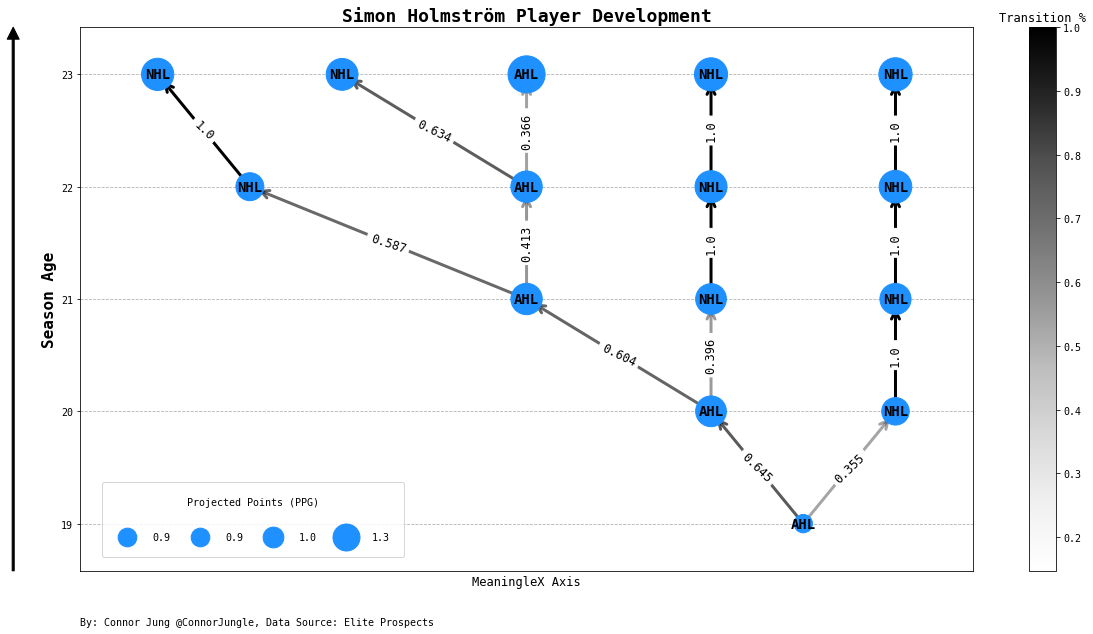

### Most Likely Player Development Path

|    | league   |   season_age |   probability |   gp |   egoals |   eassists |   epoints |   gpg |   apg |   ppg |
|---:|:---------|-------------:|--------------:|-----:|---------:|-----------:|----------:|------:|------:|------:|
|  1 | NHL      |           20 |          0.35 |   82 |       21 |         37 |        59 |  0.27 |  0.46 |  0.73 |
|  0 | NHL      |           21 |          1    |   82 |       28 |         48 |        76 |  0.34 |  0.59 |  0.93 |
|  0 | NHL      |           22 |          1    |   82 |       30 |         53 |        83 |  0.38 |  0.65 |  1.02 |
|  0 | NHL      |           23 |          1    |   82 |       32 |         55 |        87 |  0.39 |  0.68 |  1.07 |

### Maximum NHL Value Development Path

|    | league   |   season_age |   probability |   gp |   egoals |   eassists |   epoints |   gpg |   apg |   ppg |
|---:|:---------|-------------:|--------------:|-----:|---------:|-----------:|----------:|------:|------:|------:|
|  1 | NHL      |           20 |          0.35 |   82 |       21 |         37 |        59 |  0.27 |  0.46 |  0.73 |
|  0 | NHL      |           21 |          1    |   82 |       28 |         48 |        76 |  0.34 |  0.59 |  0.93 |
|  0 | NHL      |           22 |          1    |   82 |       30 |         53 |        83 |  0.38 |  0.65 |  1.02 |
|  0 | NHL      |           23 |          1    |   82 |       32 |         55 |        87 |  0.39 |  0.68 |  1.07 |

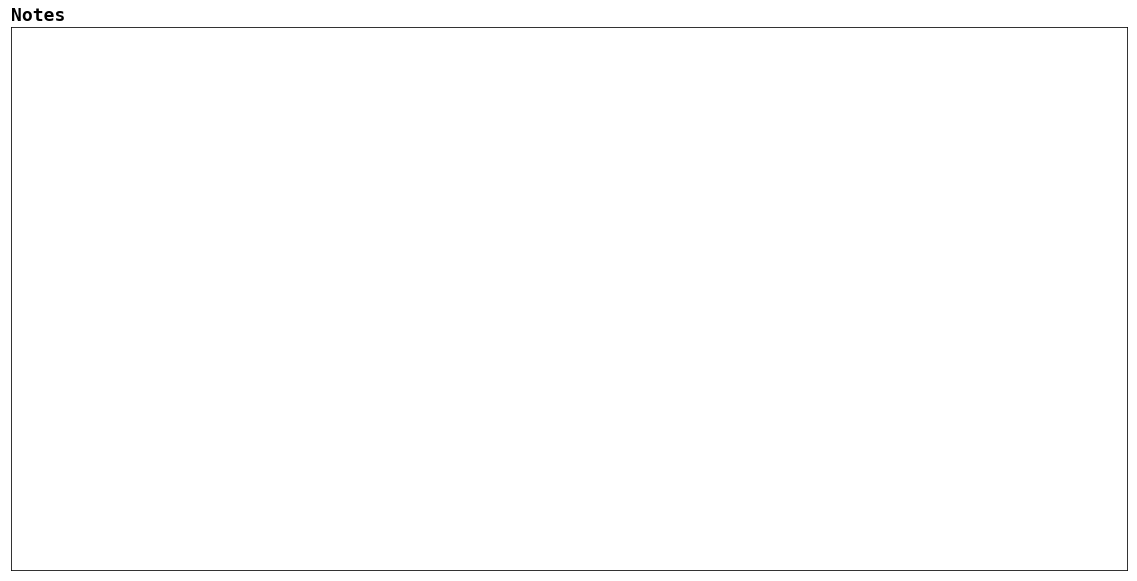

[13:32:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


# Tobias Björnfot


    APPLE projects Tobias Björnfot to have a 90.0% chance to make the NHL by age 23. 
    Tobias Björnfot's simulated development path over the 5 seasons since being drafted 
    has a expected NHL Value of ~133.4 points.

    Tobias Björnfot's "Most Likely NHL Development Path" or projected floor is ~177.1 points
    Tobias Björnfot's "Maximum NHL Value Development Path" or projected ceiling is ~177.0 points
            

**date_of_birth**: 2001-04-06&ensp;**nation**: Sweden&ensp;**height**: 184.0&ensp;**weight**: 92.0&ensp;**shoots**: L

**rights**: Los Angeles Kings&ensp;**draft_year**: 2019.0&ensp;**draft_year**: 2019.0&ensp;**draft_round**: 1.0&ensp;**draft_team**: Los Angeles Kings

### Player Stats

|    | year      | league    |   season_age |   gp |   g |   a |   tp |   gpg |   apg |   ppg |
|---:|:----------|:----------|-------------:|-----:|----:|----:|-----:|------:|------:|------:|
|  0 | 2017-2018 | SuperElit |           17 |   42 |   6 |  16 |   22 |  0.14 |  0.38 |  0.52 |
|  1 | 2018-2019 | SuperElit |           18 |   39 |  11 |  11 |   22 |  0.28 |  0.28 |  0.56 |
|  2 | 2019-2020 | AHL       |           19 |   44 |   6 |  13 |   19 |  0.14 |  0.3  |  0.43 |

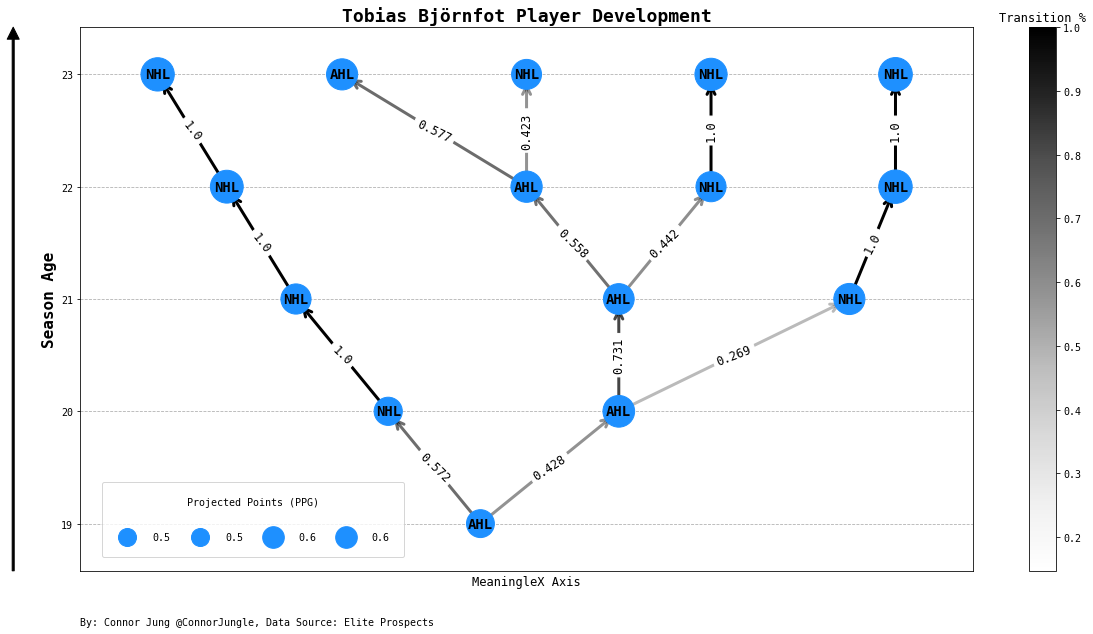

### Most Likely Player Development Path

|    | league   |   season_age |   probability |   gp |   egoals |   eassists |   epoints |   gpg |   apg |   ppg |
|---:|:---------|-------------:|--------------:|-----:|---------:|-----------:|----------:|------:|------:|------:|
|  0 | NHL      |           20 |          0.57 |   82 |       11 |         24 |        36 |  0.14 |  0.3  |  0.44 |
|  0 | NHL      |           21 |          1    |   82 |       13 |         28 |        41 |  0.16 |  0.35 |  0.51 |
|  0 | NHL      |           22 |          1    |   82 |       15 |         33 |        49 |  0.19 |  0.41 |  0.6  |
|  0 | NHL      |           23 |          1    |   82 |       15 |         34 |        50 |  0.19 |  0.42 |  0.62 |

### Maximum NHL Value Development Path

|    | league   |   season_age |   probability |   gp |   egoals |   eassists |   epoints |   gpg |   apg |   ppg |
|---:|:---------|-------------:|--------------:|-----:|---------:|-----------:|----------:|------:|------:|------:|
|  0 | NHL      |           20 |          0.57 |   82 |       11 |         24 |        36 |  0.14 |  0.3  |  0.44 |
|  0 | NHL      |           21 |          1    |   82 |       13 |         28 |        41 |  0.16 |  0.35 |  0.51 |
|  0 | NHL      |           22 |          1    |   82 |       15 |         33 |        49 |  0.19 |  0.41 |  0.6  |
|  0 | NHL      |           23 |          1    |   82 |       15 |         34 |        50 |  0.19 |  0.42 |  0.62 |

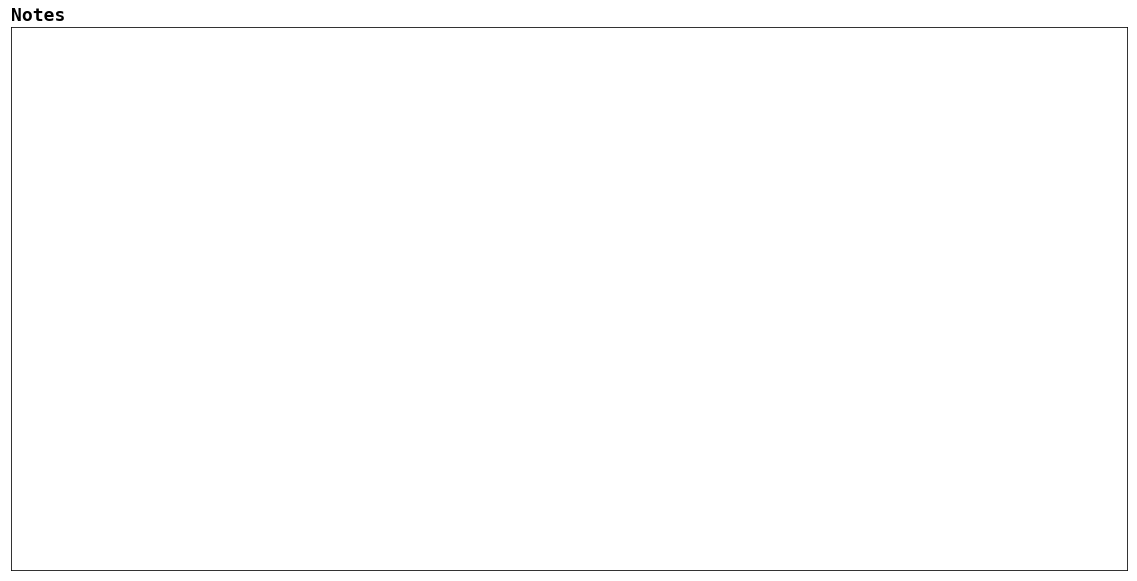

[13:36:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


# Oliver Wahlstrom


    APPLE projects Oliver Wahlstrom to have a 83.0% chance to make the NHL by age 23. 
    Oliver Wahlstrom's simulated development path over the 5 seasons since being drafted 
    has a expected NHL Value of ~97.0 points.

    Oliver Wahlstrom's "Most Likely NHL Development Path" or projected floor is ~108.1 points
    Oliver Wahlstrom's "Maximum NHL Value Development Path" or projected ceiling is ~156.0 points
            

**date_of_birth**: 2000-06-13&ensp;**nation**: USA                                                                                             /  Sweden&ensp;**height**: 180.0&ensp;**weight**: 85.0&ensp;**shoots**: R

**rights**: New York Islanders&ensp;**draft_year**: 2018.0&ensp;**draft_year**: 2018.0&ensp;**draft_round**: 1.0&ensp;**draft_team**: New York Islanders

### Player Stats

|    | year      | league   |   season_age |   gp |   g |   a |   tp |   gpg |   apg |   ppg |
|---:|:----------|:---------|-------------:|-----:|----:|----:|-----:|------:|------:|------:|
|  0 | 2016-2017 | USHL     |           17 |   29 |   9 |   4 |   13 |  0.31 |  0.14 |  0.45 |
|  1 | 2017-2018 | USHL     |           18 |   26 |  22 |  23 |   45 |  0.85 |  0.88 |  1.73 |
|  2 | 2018-2019 | NCAA     |           19 |   36 |   8 |  11 |   19 |  0.22 |  0.31 |  0.53 |
|  3 | 2019-2020 | AHL      |           20 |   45 |  10 |  12 |   22 |  0.22 |  0.27 |  0.49 |

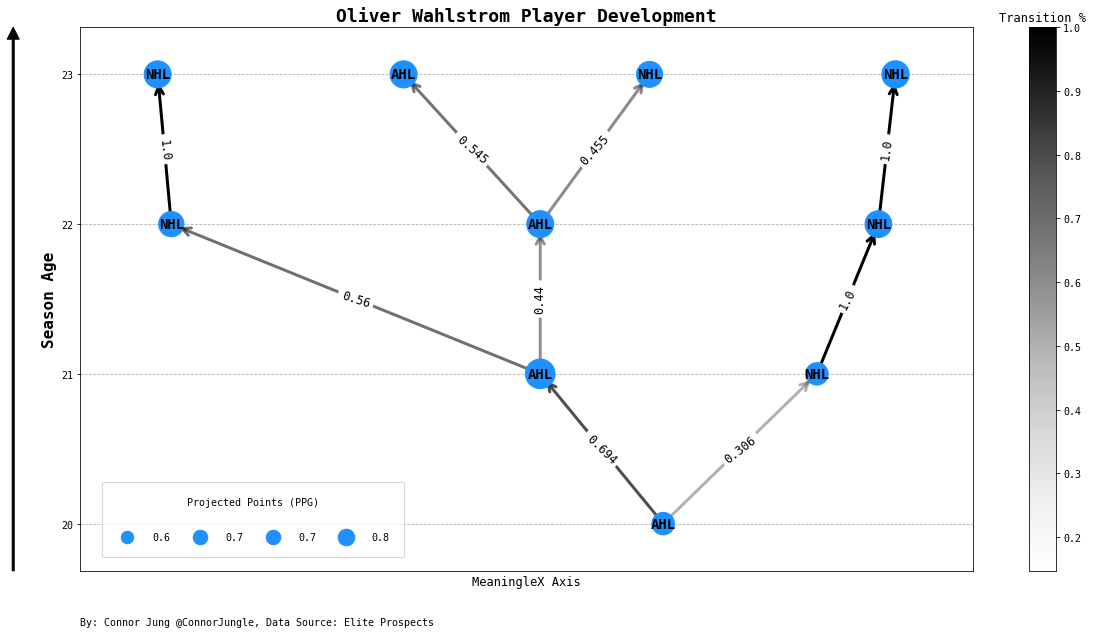

### Most Likely Player Development Path

|    | league   |   season_age |   probability |   gp |   egoals |   eassists |   epoints |   gpg |   apg |   ppg |
|---:|:---------|-------------:|--------------:|-----:|---------:|-----------:|----------:|------:|------:|------:|
|  0 | AHL      |           21 |          0.69 |   76 |       30 |         33 |        64 |  0.4  |  0.45 |  0.84 |
|  0 | NHL      |           22 |          0.56 |   82 |       23 |         26 |        50 |  0.29 |  0.33 |  0.62 |
|  0 | NHL      |           23 |          1    |   82 |       27 |         30 |        57 |  0.33 |  0.37 |  0.7  |

### Maximum NHL Value Development Path

|    | league   |   season_age |   probability |   gp |   egoals |   eassists |   epoints |   gpg |   apg |   ppg |
|---:|:---------|-------------:|--------------:|-----:|---------:|-----------:|----------:|------:|------:|------:|
|  1 | NHL      |           21 |          0.31 |   82 |       18 |         21 |        39 |  0.23 |  0.26 |  0.49 |
|  0 | NHL      |           22 |          1    |   82 |       26 |         29 |        56 |  0.33 |  0.37 |  0.69 |
|  0 | NHL      |           23 |          1    |   82 |       27 |         31 |        58 |  0.34 |  0.38 |  0.72 |

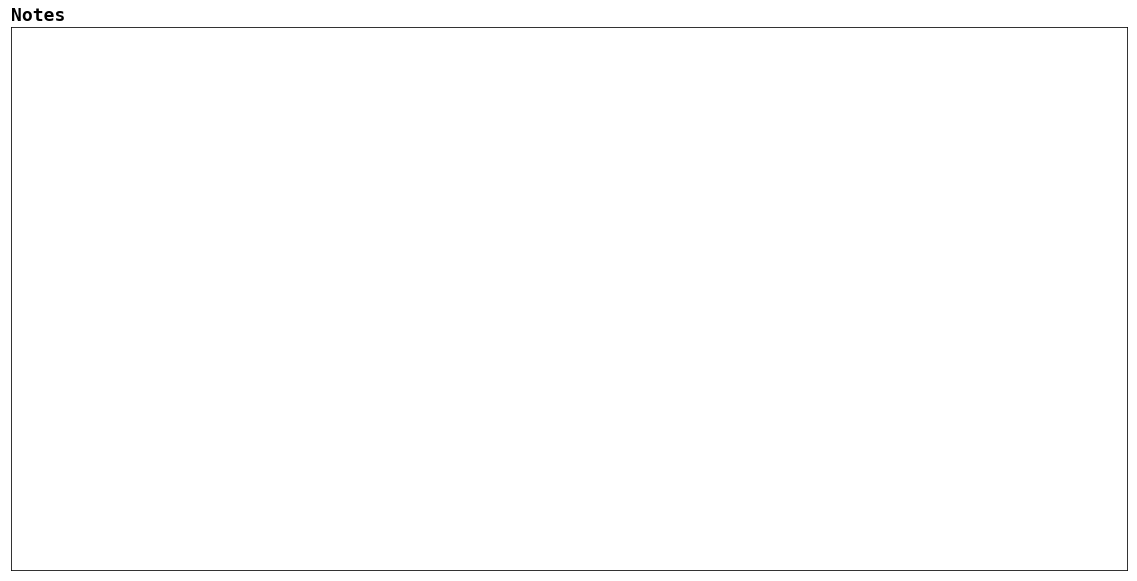

[13:38:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


# Vitali Kravtsov


    APPLE projects Vitali Kravtsov to have a 77.0% chance to make the NHL by age 23. 
    Vitali Kravtsov's simulated development path over the 5 seasons since being drafted 
    has a expected NHL Value of ~62.8 points.

    Vitali Kravtsov's "Most Likely NHL Development Path" or projected floor is ~57.9 points
    Vitali Kravtsov's "Maximum NHL Value Development Path" or projected ceiling is ~118.0 points
            

**date_of_birth**: 1999-12-23&ensp;**nation**: Russia&ensp;**height**: 192.0&ensp;**weight**: 83.0&ensp;**shoots**: L

**rights**: New York Rangers&ensp;**draft_year**: 2018.0&ensp;**draft_year**: 2018.0&ensp;**draft_round**: 1.0&ensp;**draft_team**: New York Rangers

### Player Stats

|    | year      | league   |   season_age |   gp |   g |   a |   tp |   gpg |   apg |   ppg |
|---:|:----------|:---------|-------------:|-----:|----:|----:|-----:|------:|------:|------:|
|  0 | 2016-2017 | MHL      |           18 |   41 |  13 |  23 |   36 |  0.32 |  0.56 |  0.88 |
|  1 | 2017-2018 | KHL      |           19 |   35 |   4 |   3 |    7 |  0.11 |  0.09 |  0.2  |
|  2 | 2018-2019 | KHL      |           20 |   50 |   8 |  13 |   21 |  0.16 |  0.26 |  0.42 |
|  3 | 2019-2020 | AHL      |           21 |   39 |   6 |   9 |   15 |  0.15 |  0.23 |  0.38 |

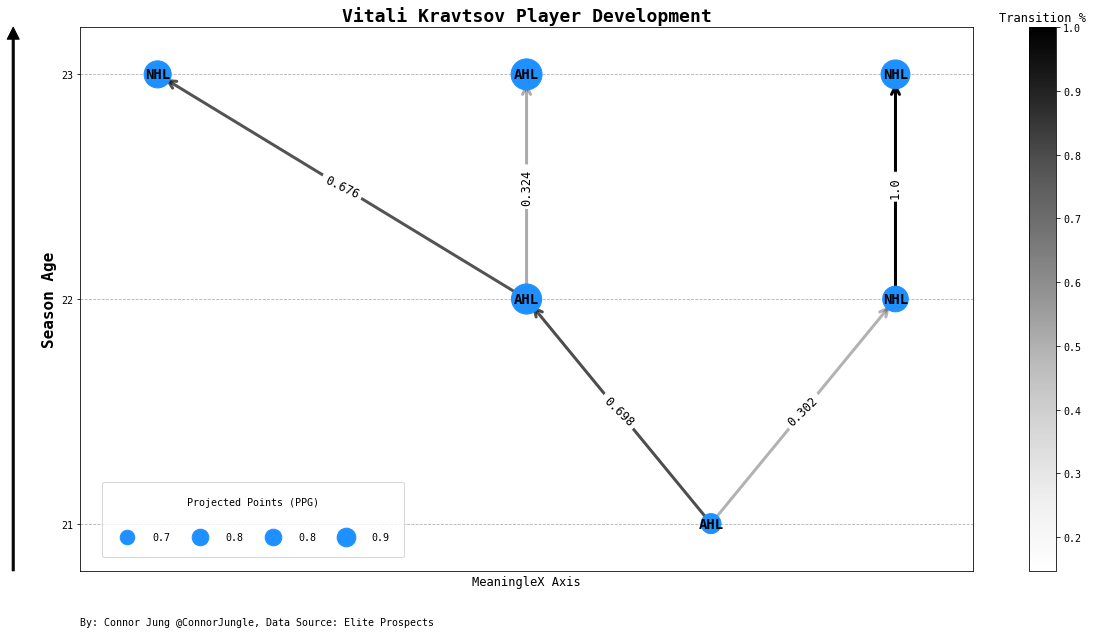

### Most Likely Player Development Path

|    | league   |   season_age |   probability |   gp |   egoals |   eassists |   epoints |   gpg |   apg |   ppg |
|---:|:---------|-------------:|--------------:|-----:|---------:|-----------:|----------:|------:|------:|------:|
|  0 | AHL      |           22 |          0.7  |   76 |       25 |         40 |        66 |  0.34 |  0.53 |  0.87 |
|  0 | NHL      |           23 |          0.68 |   82 |       22 |         35 |        57 |  0.28 |  0.43 |  0.71 |

### Maximum NHL Value Development Path

|    | league   |   season_age |   probability |   gp |   egoals |   eassists |   epoints |   gpg |   apg |   ppg |
|---:|:---------|-------------:|--------------:|-----:|---------:|-----------:|----------:|------:|------:|------:|
|  1 | NHL      |           22 |           0.3 |   82 |       20 |         31 |        51 |  0.25 |  0.39 |  0.63 |
|  0 | NHL      |           23 |           1   |   82 |       25 |         40 |        65 |  0.31 |  0.49 |  0.8  |

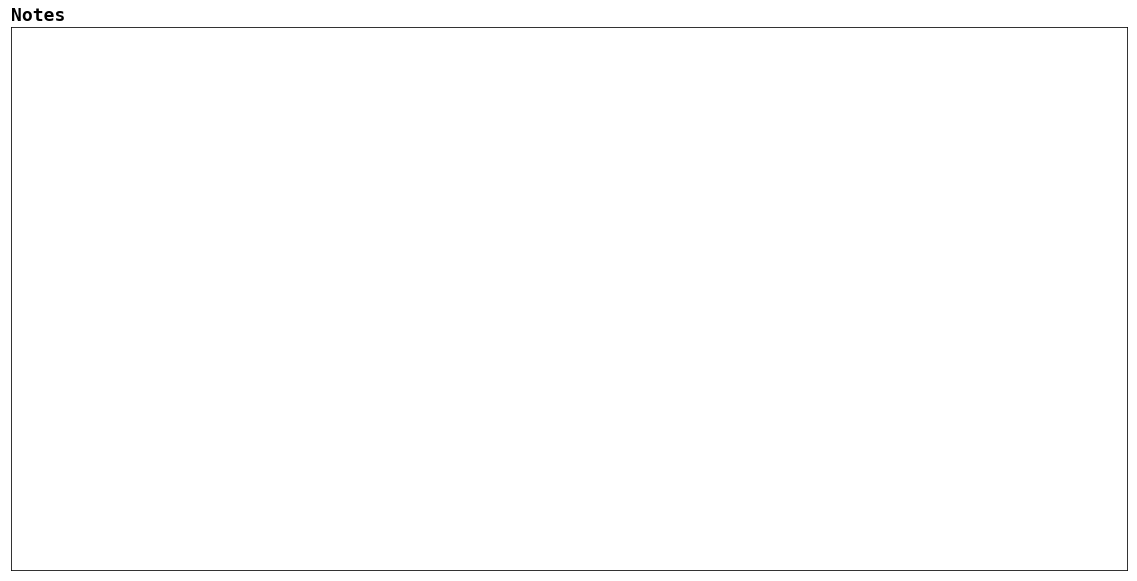

[13:39:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


# Josh Norris


    APPLE projects Josh Norris to have a 72.0% chance to make the NHL by age 23. 
    Josh Norris's simulated development path over the 5 seasons since being drafted 
    has a expected NHL Value of ~55.8 points.

    Josh Norris's "Most Likely NHL Development Path" or projected floor is ~86.9 points
    Josh Norris's "Maximum NHL Value Development Path" or projected ceiling is ~87.0 points
            

**date_of_birth**: 1999-05-05&ensp;**nation**: USA                                                                                             /  Canada&ensp;**height**: 188.0&ensp;**weight**: 87.0&ensp;**shoots**: L

**rights**: Ottawa Senators&ensp;**draft_year**: 2017.0&ensp;**draft_year**: 2017.0&ensp;**draft_round**: 1.0&ensp;**draft_team**: San Jose Sharks

### Player Stats

|    | year      | league   |   season_age |   gp |   g |   a |   tp |   gpg |   apg |   ppg |
|---:|:----------|:---------|-------------:|-----:|----:|----:|-----:|------:|------:|------:|
|  0 | 2015-2016 | USHL     |           17 |   24 |   2 |   5 |    7 |  0.08 |  0.21 |  0.29 |
|  1 | 2016-2017 | USHL     |           18 |   25 |  12 |  14 |   26 |  0.48 |  0.56 |  1.04 |
|  2 | 2017-2018 | NCAA     |           19 |   37 |   8 |  15 |   23 |  0.22 |  0.41 |  0.62 |
|  3 | 2018-2019 | NCAA     |           20 |   17 |  10 |   9 |   19 |  0.59 |  0.53 |  1.12 |
|  4 | 2019-2020 | AHL      |           21 |   56 |  31 |  30 |   61 |  0.55 |  0.54 |  1.09 |

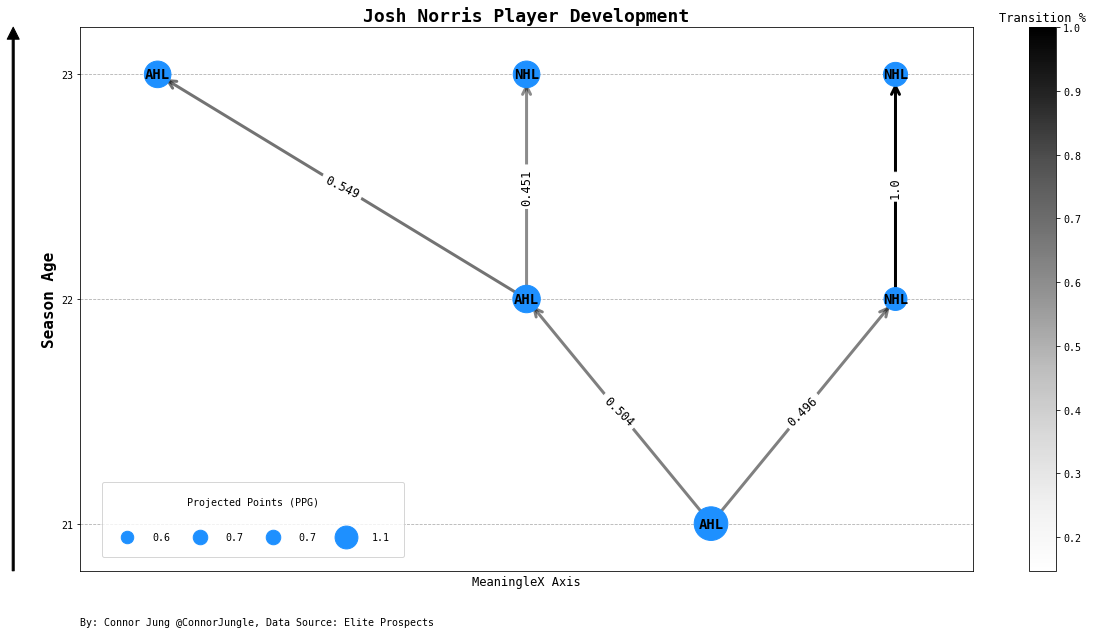

### Most Likely Player Development Path

|    | league   |   season_age |   probability |   gp |   egoals |   eassists |   epoints |   gpg |   apg |   ppg |
|---:|:---------|-------------:|--------------:|-----:|---------:|-----------:|----------:|------:|------:|------:|
|  1 | NHL      |           22 |           0.5 |   82 |       19 |         22 |        41 |  0.23 |  0.27 |  0.51 |
|  0 | NHL      |           23 |           1   |   82 |       21 |         24 |        45 |  0.26 |  0.3  |  0.56 |

### Maximum NHL Value Development Path

|    | league   |   season_age |   probability |   gp |   egoals |   eassists |   epoints |   gpg |   apg |   ppg |
|---:|:---------|-------------:|--------------:|-----:|---------:|-----------:|----------:|------:|------:|------:|
|  1 | NHL      |           22 |           0.5 |   82 |       19 |         22 |        41 |  0.23 |  0.27 |  0.51 |
|  0 | NHL      |           23 |           1   |   82 |       21 |         24 |        45 |  0.26 |  0.3  |  0.56 |

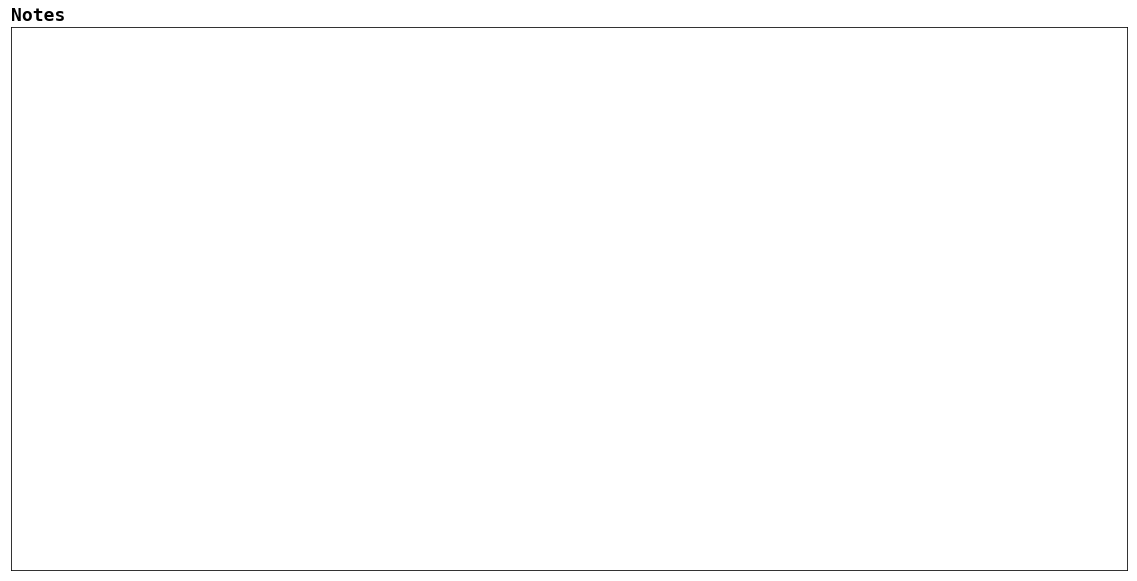

[13:41:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


# Joe Veleno


    APPLE projects Joe Veleno to have a 74.0% chance to make the NHL by age 23. 
    Joe Veleno's simulated development path over the 5 seasons since being drafted 
    has a expected NHL Value of ~70.2 points.

    Joe Veleno's "Most Likely NHL Development Path" or projected floor is ~102.8 points
    Joe Veleno's "Maximum NHL Value Development Path" or projected ceiling is ~145.0 points
            

**date_of_birth**: 2000-01-13&ensp;**nation**: Canada&ensp;**height**: 186.0&ensp;**weight**: 88.0&ensp;**shoots**: L

**rights**: Detroit Red Wings&ensp;**draft_year**: 2018.0&ensp;**draft_year**: 2018.0&ensp;**draft_round**: 1.0&ensp;**draft_team**: Detroit Red Wings

### Player Stats

|    | year      | league   |   season_age |   gp |   g |   a |   tp |   gpg |   apg |   ppg |
|---:|:----------|:---------|-------------:|-----:|----:|----:|-----:|------:|------:|------:|
|  0 | 2015-2016 | QMJHL    |           16 |   62 |  13 |  30 |   43 |  0.21 |  0.48 |  0.69 |
|  1 | 2016-2017 | QMJHL    |           17 |   45 |  13 |  27 |   40 |  0.29 |  0.6  |  0.89 |
|  2 | 2017-2018 | QMJHL    |           18 |   64 |  22 |  57 |   79 |  0.34 |  0.89 |  1.23 |
|  3 | 2018-2019 | QMJHL    |           19 |   59 |  42 |  62 |  104 |  0.71 |  1.05 |  1.76 |
|  4 | 2019-2020 | AHL      |           20 |   54 |  11 |  12 |   23 |  0.2  |  0.22 |  0.43 |

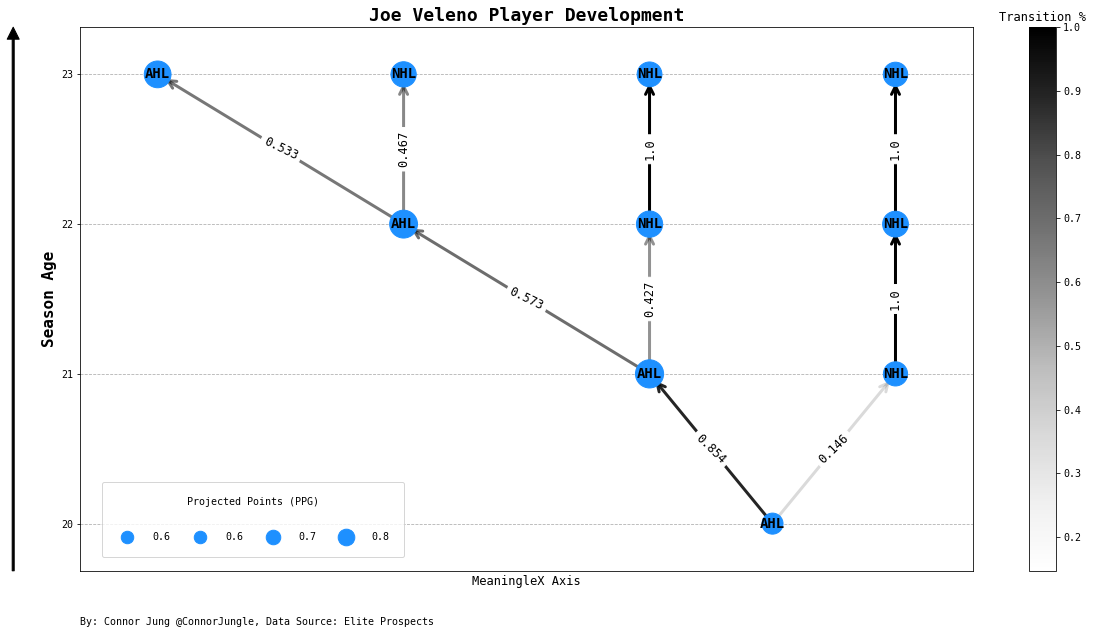

### Most Likely Player Development Path

|    | league   |   season_age |   probability |   gp |   egoals |   eassists |   epoints |   gpg |   apg |   ppg |
|---:|:---------|-------------:|--------------:|-----:|---------:|-----------:|----------:|------:|------:|------:|
|  0 | AHL      |           21 |          0.85 |   76 |       18 |         39 |        58 |  0.25 |  0.52 |  0.76 |
|  1 | NHL      |           22 |          0.43 |   82 |       17 |         36 |        54 |  0.22 |  0.45 |  0.66 |
|  0 | NHL      |           23 |          1    |   82 |       15 |         32 |        48 |  0.19 |  0.4  |  0.59 |

### Maximum NHL Value Development Path

|    | league   |   season_age |   probability |   gp |   egoals |   eassists |   epoints |   gpg |   apg |   ppg |
|---:|:---------|-------------:|--------------:|-----:|---------:|-----------:|----------:|------:|------:|------:|
|  1 | NHL      |           21 |          0.15 |   82 |       14 |         31 |        46 |  0.18 |  0.38 |  0.56 |
|  0 | NHL      |           22 |          1    |   82 |       17 |         35 |        52 |  0.21 |  0.43 |  0.64 |
|  0 | NHL      |           23 |          1    |   82 |       15 |         31 |        46 |  0.19 |  0.38 |  0.57 |

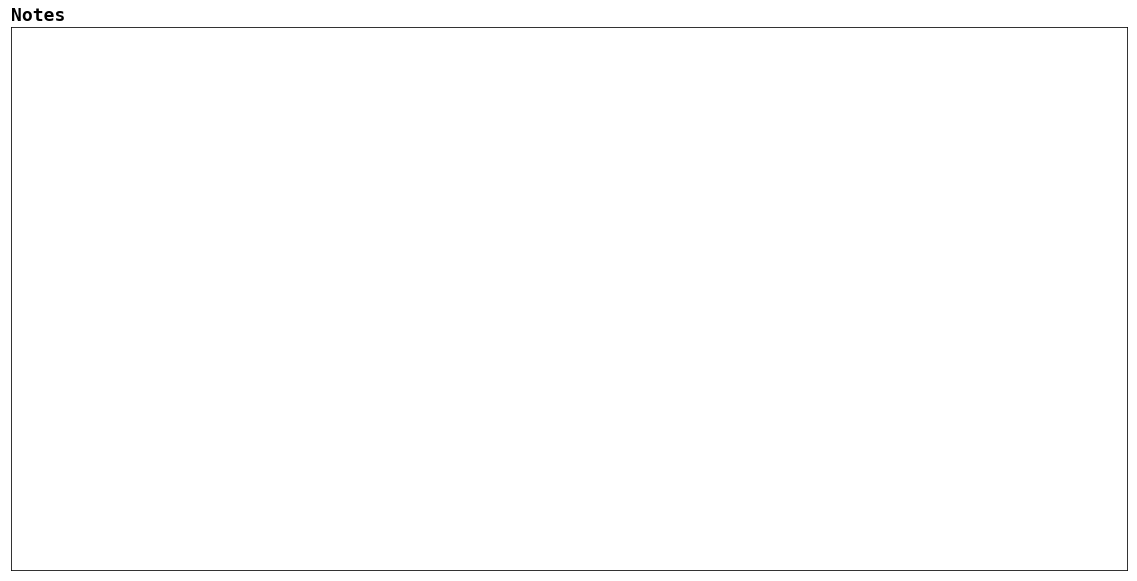

[13:42:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


# Gabriel Vilardi


    APPLE projects Gabriel Vilardi to have a 74.0% chance to make the NHL by age 23. 
    Gabriel Vilardi's simulated development path over the 5 seasons since being drafted 
    has a expected NHL Value of ~68.6 points.

    Gabriel Vilardi's "Most Likely NHL Development Path" or projected floor is ~109.6 points
    Gabriel Vilardi's "Maximum NHL Value Development Path" or projected ceiling is ~110.0 points
            

**date_of_birth**: 1999-08-16&ensp;**nation**: Canada&ensp;**height**: 191.0&ensp;**weight**: 91.0&ensp;**shoots**: R

**rights**: Los Angeles Kings&ensp;**draft_year**: 2017.0&ensp;**draft_year**: 2017.0&ensp;**draft_round**: 1.0&ensp;**draft_team**: Los Angeles Kings

### Player Stats

|    | year      | league   |   season_age |   gp |   g |   a |   tp |   gpg |   apg |   ppg |
|---:|:----------|:---------|-------------:|-----:|----:|----:|-----:|------:|------:|------:|
|  0 | 2015-2016 | OHL      |           17 |   62 |  17 |  21 |   38 |  0.27 |  0.34 |  0.61 |
|  1 | 2016-2017 | OHL      |           18 |   49 |  29 |  32 |   61 |  0.59 |  0.65 |  1.24 |
|  2 | 2017-2018 | OHL      |           19 |   32 |  22 |  36 |   58 |  0.69 |  1.12 |  1.81 |
|  3 | 2019-2020 | AHL      |           21 |   32 |   9 |  16 |   25 |  0.28 |  0.5  |  0.78 |

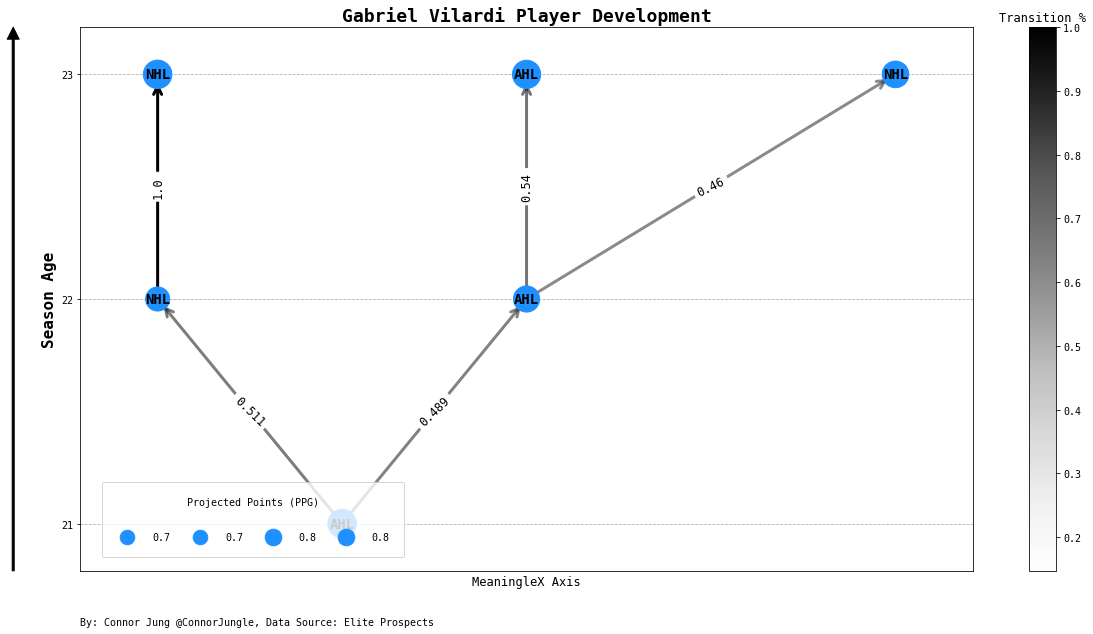

### Most Likely Player Development Path

|    | league   |   season_age |   probability |   gp |   egoals |   eassists |   epoints |   gpg |   apg |   ppg |
|---:|:---------|-------------:|--------------:|-----:|---------:|-----------:|----------:|------:|------:|------:|
|  0 | NHL      |           22 |          0.51 |   82 |       18 |         26 |        45 |  0.23 |  0.33 |  0.56 |
|  0 | NHL      |           23 |          1    |   82 |       26 |         37 |        63 |  0.32 |  0.46 |  0.78 |

### Maximum NHL Value Development Path

|    | league   |   season_age |   probability |   gp |   egoals |   eassists |   epoints |   gpg |   apg |   ppg |
|---:|:---------|-------------:|--------------:|-----:|---------:|-----------:|----------:|------:|------:|------:|
|  0 | NHL      |           22 |          0.51 |   82 |       18 |         26 |        45 |  0.23 |  0.33 |  0.56 |
|  0 | NHL      |           23 |          1    |   82 |       26 |         37 |        63 |  0.32 |  0.46 |  0.78 |

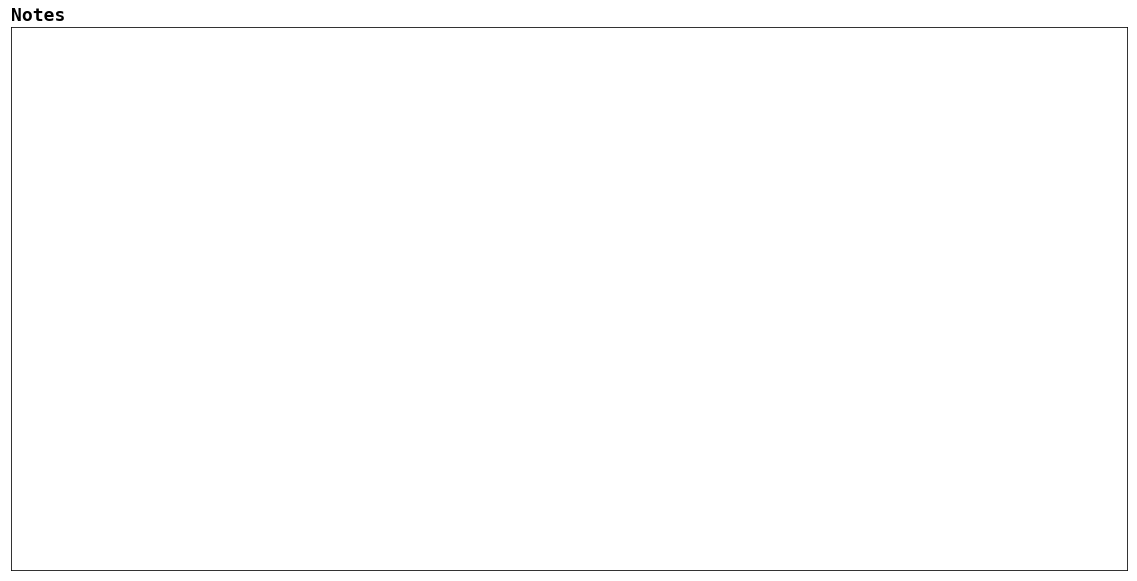

[13:43:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


# Owen Tippett


    APPLE projects Owen Tippett to have a 85.0% chance to make the NHL by age 23. 
    Owen Tippett's simulated development path over the 5 seasons since being drafted 
    has a expected NHL Value of ~70.9 points.

    Owen Tippett's "Most Likely NHL Development Path" or projected floor is ~91.9 points
    Owen Tippett's "Maximum NHL Value Development Path" or projected ceiling is ~92.0 points
            

**date_of_birth**: 1999-02-16&ensp;**nation**: Canada&ensp;**height**: 185.0&ensp;**weight**: 91.0&ensp;**shoots**: R

**rights**: Florida Panthers&ensp;**draft_year**: 2017.0&ensp;**draft_year**: 2017.0&ensp;**draft_round**: 1.0&ensp;**draft_team**: Florida Panthers

### Player Stats

|    | year      | league   |   season_age |   gp |   g |   a |   tp |   gpg |   apg |   ppg |
|---:|:----------|:---------|-------------:|-----:|----:|----:|-----:|------:|------:|------:|
|  0 | 2015-2016 | OHL      |           17 |   48 |  15 |   5 |   20 |  0.31 |  0.1  |  0.42 |
|  1 | 2016-2017 | OHL      |           18 |   60 |  44 |  31 |   75 |  0.73 |  0.52 |  1.25 |
|  2 | 2017-2018 | OHL      |           19 |   51 |  36 |  39 |   75 |  0.71 |  0.76 |  1.47 |
|  3 | 2018-2019 | OHL      |           20 |   54 |  33 |  41 |   74 |  0.61 |  0.76 |  1.37 |
|  4 | 2019-2020 | AHL      |           21 |   46 |  19 |  21 |   40 |  0.41 |  0.46 |  0.87 |

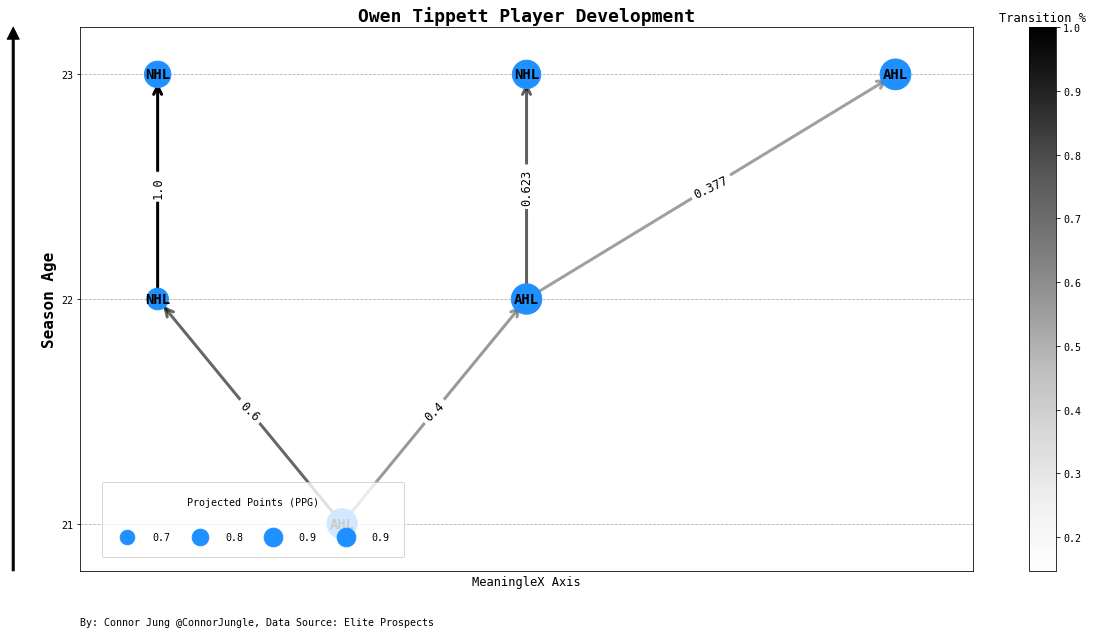

### Most Likely Player Development Path

|    | league   |   season_age |   probability |   gp |   egoals |   eassists |   epoints |   gpg |   apg |   ppg |
|---:|:---------|-------------:|--------------:|-----:|---------:|-----------:|----------:|------:|------:|------:|
|  0 | NHL      |           22 |           0.6 |   82 |       17 |         19 |        36 |  0.22 |  0.23 |  0.45 |
|  0 | NHL      |           23 |           1   |   82 |       26 |         28 |        55 |  0.32 |  0.35 |  0.67 |

### Maximum NHL Value Development Path

|    | league   |   season_age |   probability |   gp |   egoals |   eassists |   epoints |   gpg |   apg |   ppg |
|---:|:---------|-------------:|--------------:|-----:|---------:|-----------:|----------:|------:|------:|------:|
|  0 | NHL      |           22 |           0.6 |   82 |       17 |         19 |        36 |  0.22 |  0.23 |  0.45 |
|  0 | NHL      |           23 |           1   |   82 |       26 |         28 |        55 |  0.32 |  0.35 |  0.67 |

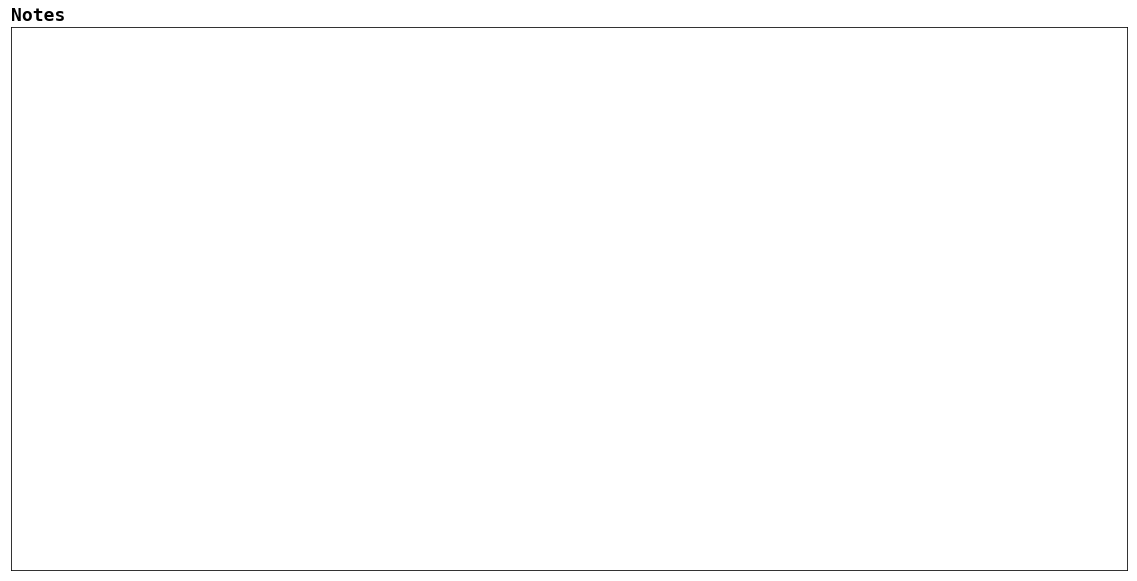

[13:43:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


# Michael Rasmussen


    APPLE projects Michael Rasmussen to have a 75.0% chance to make the NHL by age 23. 
    Michael Rasmussen's simulated development path over the 5 seasons since being drafted 
    has a expected NHL Value of ~47.2 points.

    Michael Rasmussen's "Most Likely NHL Development Path" or projected floor is ~76.3 points
    Michael Rasmussen's "Maximum NHL Value Development Path" or projected ceiling is ~76.0 points
            

**date_of_birth**: 1999-04-17&ensp;**nation**: Canada&ensp;**height**: 197.0&ensp;**weight**: 100.0&ensp;**shoots**: L

**rights**: Detroit Red Wings&ensp;**draft_year**: 2017.0&ensp;**draft_year**: 2017.0&ensp;**draft_round**: 1.0&ensp;**draft_team**: Detroit Red Wings

### Player Stats

|    | year      | league   |   season_age |   gp |   g |   a |   tp |   gpg |   apg |   ppg |
|---:|:----------|:---------|-------------:|-----:|----:|----:|-----:|------:|------:|------:|
|  0 | 2015-2016 | WHL      |           17 |   63 |  18 |  25 |   43 |  0.29 |  0.4  |  0.68 |
|  1 | 2016-2017 | WHL      |           18 |   50 |  32 |  23 |   55 |  0.64 |  0.46 |  1.1  |
|  2 | 2017-2018 | WHL      |           19 |   47 |  31 |  28 |   59 |  0.66 |  0.6  |  1.26 |
|  3 | 2018-2019 | NHL      |           20 |   62 |   8 |  10 |   18 |  0.13 |  0.16 |  0.29 |
|  4 | 2019-2020 | AHL      |           21 |   35 |   7 |  15 |   22 |  0.2  |  0.43 |  0.63 |

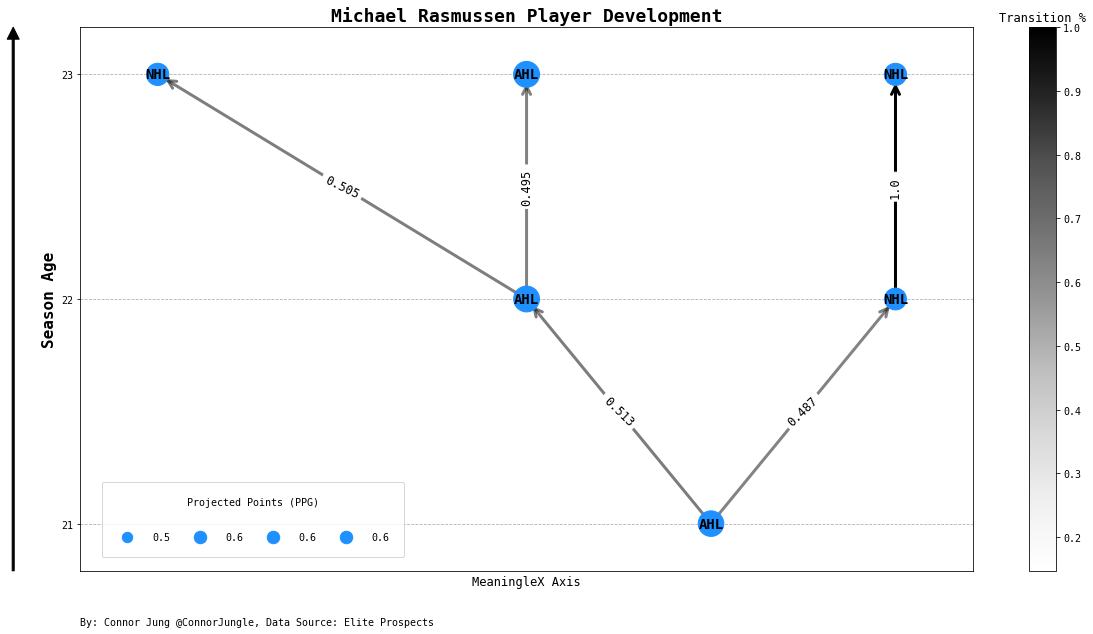

### Most Likely Player Development Path

|    | league   |   season_age |   probability |   gp |   egoals |   eassists |   epoints |   gpg |   apg |   ppg |
|---:|:---------|-------------:|--------------:|-----:|---------:|-----------:|----------:|------:|------:|------:|
|  1 | NHL      |           22 |          0.49 |   82 |       16 |         20 |        37 |  0.2  |  0.25 |  0.46 |
|  0 | NHL      |           23 |          1    |   82 |       17 |         21 |        38 |  0.21 |  0.26 |  0.47 |

### Maximum NHL Value Development Path

|    | league   |   season_age |   probability |   gp |   egoals |   eassists |   epoints |   gpg |   apg |   ppg |
|---:|:---------|-------------:|--------------:|-----:|---------:|-----------:|----------:|------:|------:|------:|
|  1 | NHL      |           22 |          0.49 |   82 |       16 |         20 |        37 |  0.2  |  0.25 |  0.46 |
|  0 | NHL      |           23 |          1    |   82 |       17 |         21 |        38 |  0.21 |  0.26 |  0.47 |

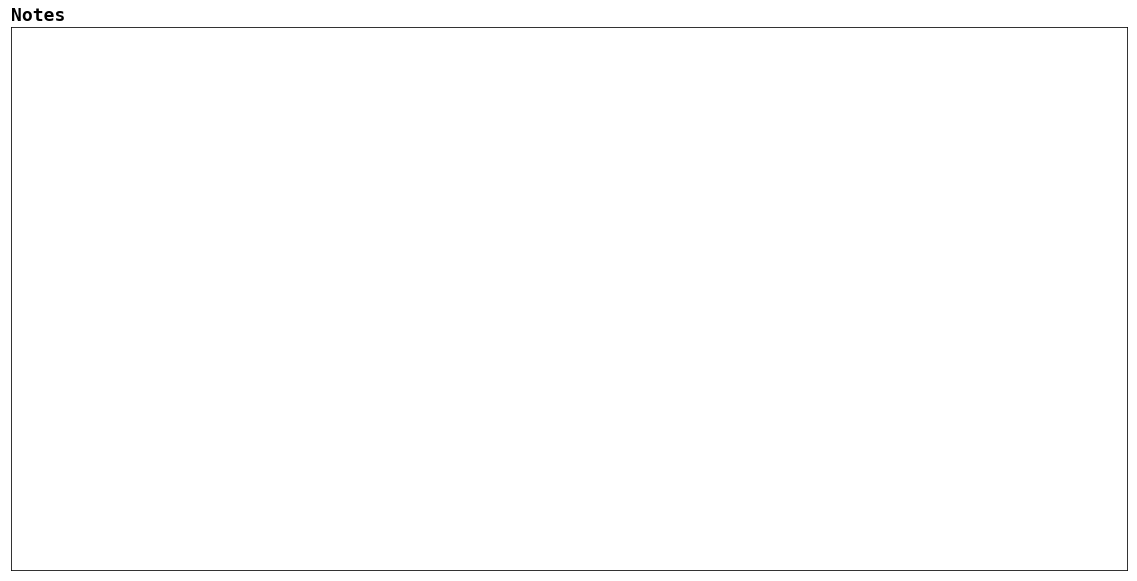

[13:44:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


# Maxime Comtois


    APPLE projects Maxime Comtois to have a 49.0% chance to make the NHL by age 23. 
    Maxime Comtois's simulated development path over the 5 seasons since being drafted 
    has a expected NHL Value of ~39.0 points.

    Maxime Comtois's "Most Likely NHL Development Path" or projected floor is ~101.9 points
    Maxime Comtois's "Maximum NHL Value Development Path" or projected ceiling is ~102.0 points
            

**date_of_birth**: 1999-01-08&ensp;**nation**: Canada&ensp;**height**: 189.0&ensp;**weight**: 94.0&ensp;**shoots**: L

**rights**: Anaheim Ducks&ensp;**draft_year**: 2017.0&ensp;**draft_year**: 2017.0&ensp;**draft_round**: 2.0&ensp;**draft_team**: Anaheim Ducks

### Player Stats

|    | year      | league   |   season_age |   gp |   g |   a |   tp |   gpg |   apg |   ppg |
|---:|:----------|:---------|-------------:|-----:|----:|----:|-----:|------:|------:|------:|
|  0 | 2015-2016 | QMJHL    |           17 |   62 |  26 |  34 |   60 |  0.42 |  0.55 |  0.97 |
|  1 | 2016-2017 | QMJHL    |           18 |   64 |  22 |  29 |   51 |  0.34 |  0.45 |  0.8  |
|  2 | 2017-2018 | QMJHL    |           19 |   54 |  44 |  41 |   85 |  0.81 |  0.76 |  1.57 |
|  3 | 2018-2019 | QMJHL    |           20 |   25 |  31 |  17 |   48 |  1.24 |  0.68 |  1.92 |
|  4 | 2019-2020 | AHL      |           21 |   31 |   9 |  15 |   24 |  0.29 |  0.48 |  0.77 |

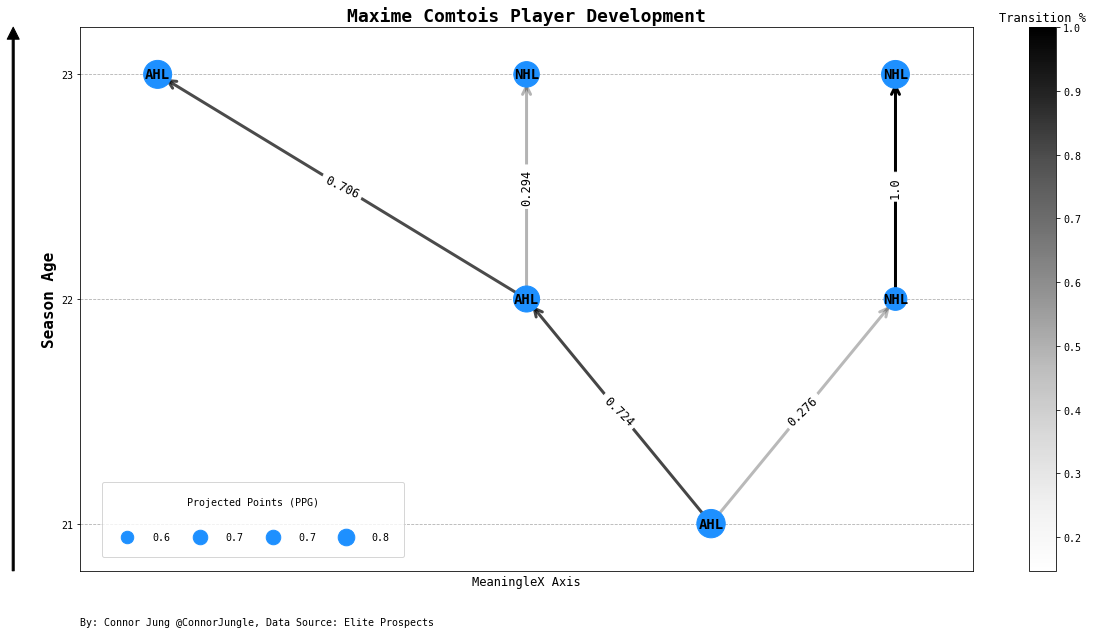

### Most Likely Player Development Path

|    | league   |   season_age |   probability |   gp |   egoals |   eassists |   epoints |   gpg |   apg |   ppg |
|---:|:---------|-------------:|--------------:|-----:|---------:|-----------:|----------:|------:|------:|------:|
|  1 | NHL      |           22 |          0.28 |   82 |       17 |         23 |        40 |  0.22 |  0.28 |  0.5  |
|  0 | NHL      |           23 |          1    |   82 |       26 |         34 |        61 |  0.32 |  0.42 |  0.75 |

### Maximum NHL Value Development Path

|    | league   |   season_age |   probability |   gp |   egoals |   eassists |   epoints |   gpg |   apg |   ppg |
|---:|:---------|-------------:|--------------:|-----:|---------:|-----------:|----------:|------:|------:|------:|
|  1 | NHL      |           22 |          0.28 |   82 |       17 |         23 |        40 |  0.22 |  0.28 |  0.5  |
|  0 | NHL      |           23 |          1    |   82 |       26 |         34 |        61 |  0.32 |  0.42 |  0.75 |

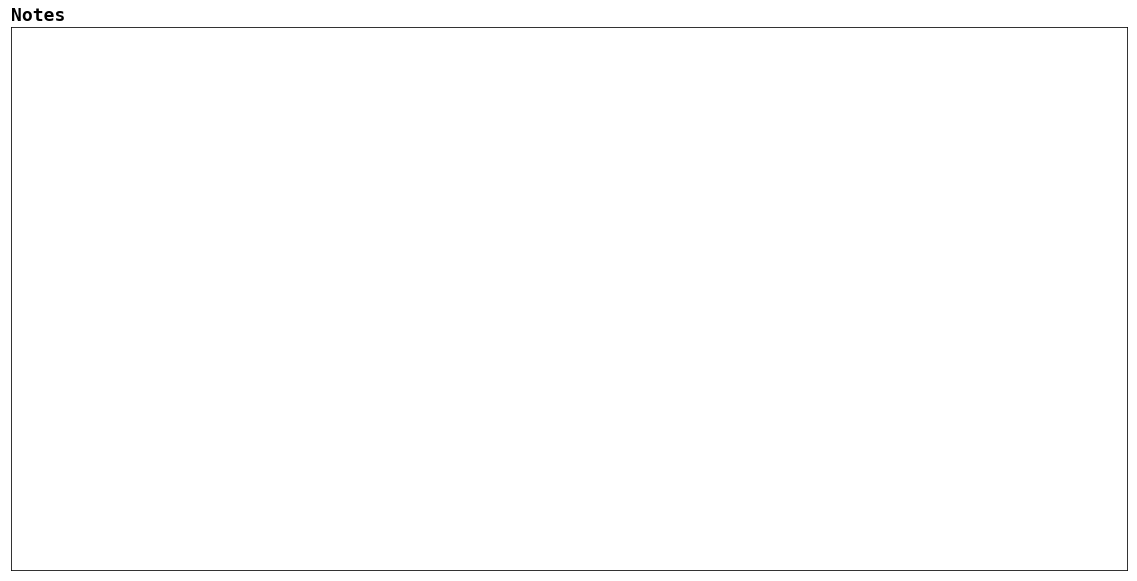

[13:44:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


# Morgan Frost


    APPLE projects Morgan Frost to have a 72.0% chance to make the NHL by age 23. 
    Morgan Frost's simulated development path over the 5 seasons since being drafted 
    has a expected NHL Value of ~75.9 points.

    Morgan Frost's "Most Likely NHL Development Path" or projected floor is ~119.9 points
    Morgan Frost's "Maximum NHL Value Development Path" or projected ceiling is ~120.0 points
            

**date_of_birth**: 1999-05-14&ensp;**nation**: Canada&ensp;**height**: 180.0&ensp;**weight**: 77.0&ensp;**shoots**: L

**rights**: Philadelphia Flyers&ensp;**draft_year**: 2017.0&ensp;**draft_year**: 2017.0&ensp;**draft_round**: 1.0&ensp;**draft_team**: Philadelphia Flyers

### Player Stats

|    | year      | league   |   season_age |   gp |   g |   a |   tp |   gpg |   apg |   ppg |
|---:|:----------|:---------|-------------:|-----:|----:|----:|-----:|------:|------:|------:|
|  0 | 2015-2016 | OHL      |           17 |   65 |   7 |  20 |   27 |  0.11 |  0.31 |  0.42 |
|  1 | 2016-2017 | OHL      |           18 |   67 |  20 |  42 |   62 |  0.3  |  0.63 |  0.93 |
|  2 | 2017-2018 | OHL      |           19 |   67 |  42 |  70 |  112 |  0.63 |  1.04 |  1.67 |
|  3 | 2018-2019 | OHL      |           20 |   58 |  37 |  72 |  109 |  0.64 |  1.24 |  1.88 |
|  4 | 2019-2020 | AHL      |           21 |   41 |  13 |  16 |   29 |  0.32 |  0.39 |  0.71 |

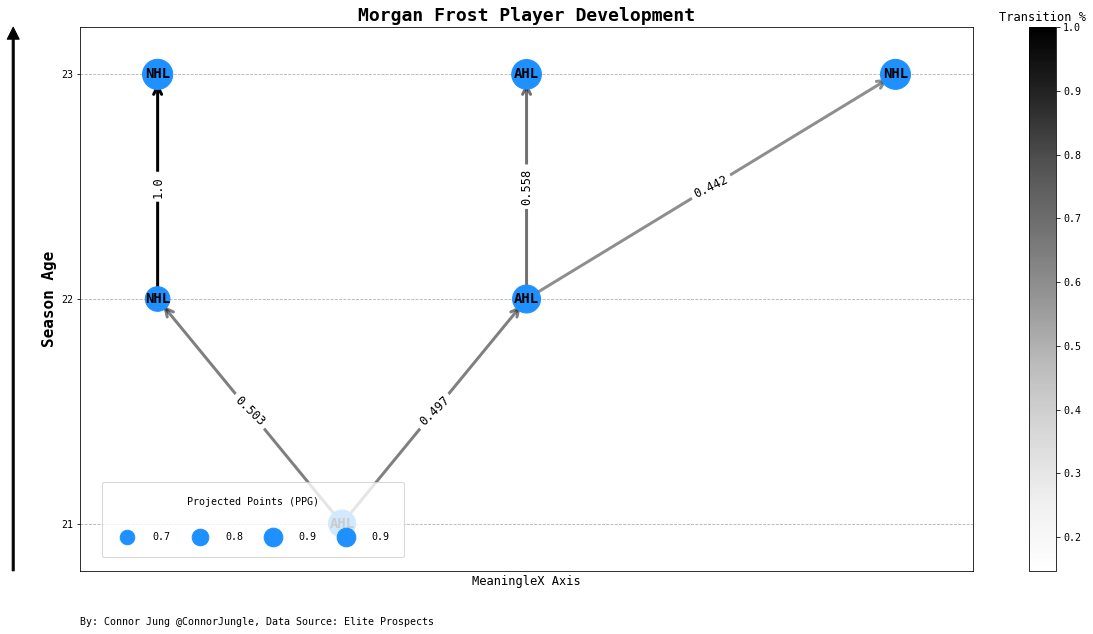

### Most Likely Player Development Path

|    | league   |   season_age |   probability |   gp |   egoals |   eassists |   epoints |   gpg |   apg |   ppg |
|---:|:---------|-------------:|--------------:|-----:|---------:|-----------:|----------:|------:|------:|------:|
|  0 | NHL      |           22 |           0.5 |   82 |       16 |         31 |        47 |   0.2 |  0.39 |  0.58 |
|  0 | NHL      |           23 |           1   |   82 |       24 |         47 |        71 |   0.3 |  0.58 |  0.88 |

### Maximum NHL Value Development Path

|    | league   |   season_age |   probability |   gp |   egoals |   eassists |   epoints |   gpg |   apg |   ppg |
|---:|:---------|-------------:|--------------:|-----:|---------:|-----------:|----------:|------:|------:|------:|
|  0 | NHL      |           22 |           0.5 |   82 |       16 |         31 |        47 |   0.2 |  0.39 |  0.58 |
|  0 | NHL      |           23 |           1   |   82 |       24 |         47 |        71 |   0.3 |  0.58 |  0.88 |

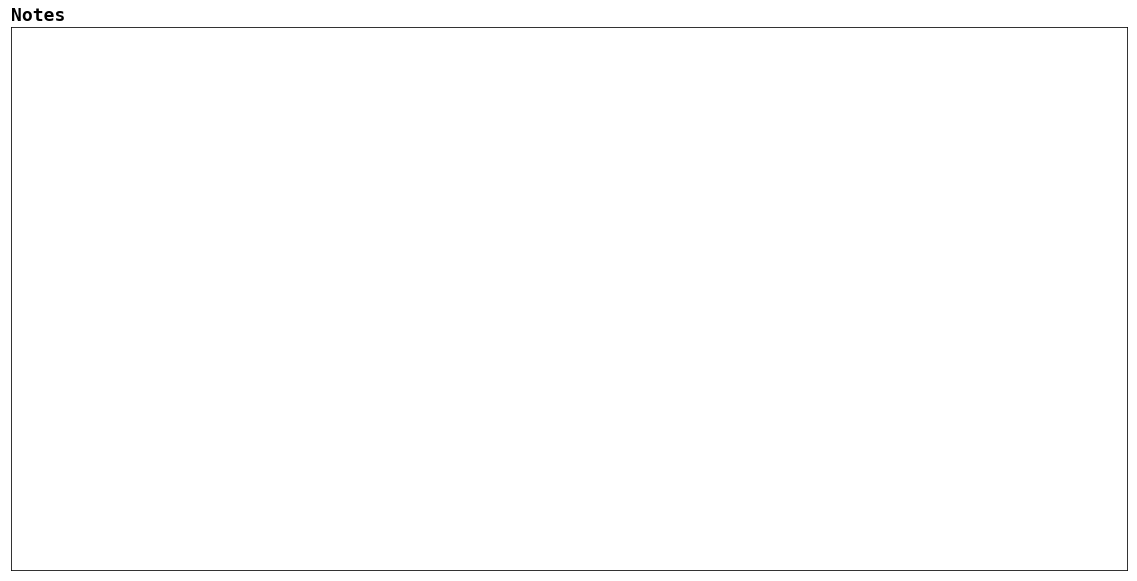

[13:45:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


# Bode Wilde


    APPLE projects Bode Wilde to have a 55.00000000000001% chance to make the NHL by age 23. 
    Bode Wilde's simulated development path over the 5 seasons since being drafted 
    has a expected NHL Value of ~23.8 points.

    Bode Wilde's "Most Likely NHL Development Path" or projected floor is ~54.9 points
    Bode Wilde's "Maximum NHL Value Development Path" or projected ceiling is ~94.0 points
            

**date_of_birth**: 2000-01-24&ensp;**nation**: USA                                                                                             /  Canada&ensp;**height**: 191.0&ensp;**weight**: 87.0&ensp;**shoots**: R

**rights**: New York Islanders&ensp;**draft_year**: 2018.0&ensp;**draft_year**: 2018.0&ensp;**draft_round**: 2.0&ensp;**draft_team**: New York Islanders

### Player Stats

|    | year      | league   |   season_age |   gp |   g |   a |   tp |   gpg |   apg |   ppg |
|---:|:----------|:---------|-------------:|-----:|----:|----:|-----:|------:|------:|------:|
|  0 | 2016-2017 | USHL     |           17 |   34 |   3 |   3 |    6 |  0.09 |  0.09 |  0.18 |
|  1 | 2017-2018 | USHL     |           18 |   25 |   3 |  13 |   16 |  0.12 |  0.52 |  0.64 |
|  2 | 2018-2019 | OHL      |           19 |   62 |  19 |  51 |   70 |  0.31 |  0.82 |  1.13 |
|  3 | 2019-2020 | AHL      |           20 |   20 |   0 |   2 |    2 |  0    |  0.1  |  0.1  |

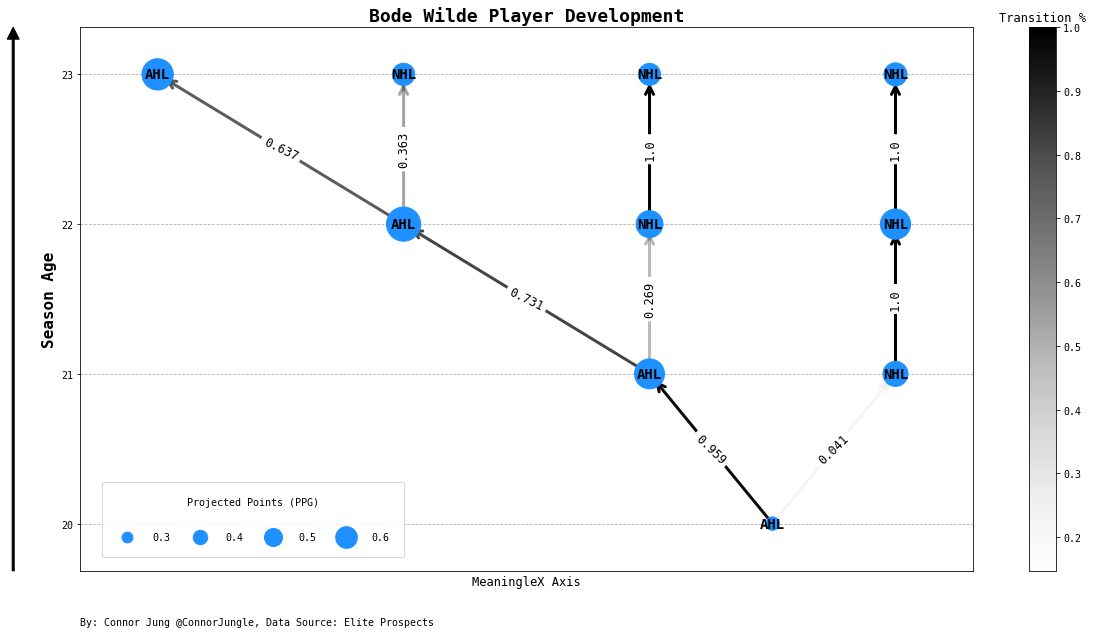

### Most Likely Player Development Path

|    | league   |   season_age |   probability |   gp |   egoals |   eassists |   epoints |   gpg |   apg |   ppg |
|---:|:---------|-------------:|--------------:|-----:|---------:|-----------:|----------:|------:|------:|------:|
|  0 | AHL      |           21 |          0.96 |   76 |        8 |         29 |        37 |  0.11 |  0.38 |  0.5  |
|  1 | NHL      |           22 |          0.27 |   82 |        7 |         25 |        32 |  0.09 |  0.31 |  0.4  |
|  0 | NHL      |           23 |          1    |   82 |        5 |         16 |        22 |  0.06 |  0.21 |  0.27 |

### Maximum NHL Value Development Path

|    | league   |   season_age |   probability |   gp |   egoals |   eassists |   epoints |   gpg |   apg |   ppg |
|---:|:---------|-------------:|--------------:|-----:|---------:|-----------:|----------:|------:|------:|------:|
|  1 | NHL      |           21 |          0.04 |   82 |        6 |         21 |        28 |  0.08 |  0.27 |  0.35 |
|  0 | NHL      |           22 |          1    |   82 |        9 |         31 |        41 |  0.12 |  0.39 |  0.51 |
|  0 | NHL      |           23 |          1    |   82 |        5 |         18 |        24 |  0.07 |  0.23 |  0.29 |

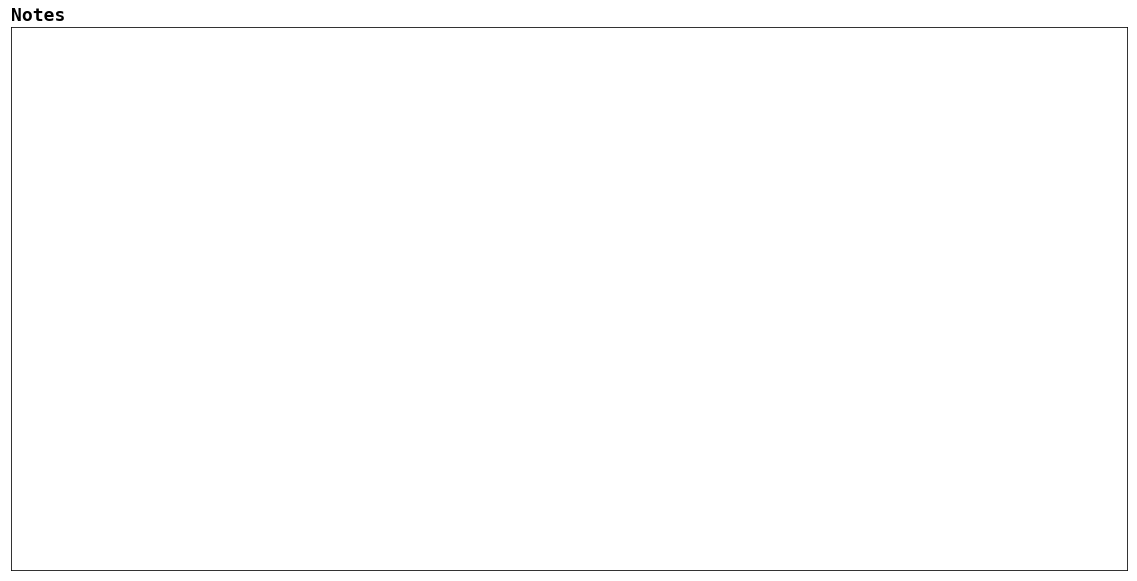

[13:46:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


# Kristian Vesalainen


    APPLE projects Kristian Vesalainen to have a 70.0% chance to make the NHL by age 23. 
    Kristian Vesalainen's simulated development path over the 5 seasons since being drafted 
    has a expected NHL Value of ~48.6 points.

    Kristian Vesalainen's "Most Likely NHL Development Path" or projected floor is ~42.2 points
    Kristian Vesalainen's "Maximum NHL Value Development Path" or projected ceiling is ~107.0 points
            

**date_of_birth**: 1999-06-01&ensp;**nation**: Finland&ensp;**height**: 192.0&ensp;**weight**: 94.0&ensp;**shoots**: L

**rights**: Winnipeg Jets&ensp;**draft_year**: 2017.0&ensp;**draft_year**: 2017.0&ensp;**draft_round**: 1.0&ensp;**draft_team**: Winnipeg Jets

### Player Stats

|    | year      | league         |   season_age |   gp |   g |   a |   tp |   gpg |   apg |   ppg |
|---:|:----------|:---------------|-------------:|-----:|----:|----:|-----:|------:|------:|------:|
|  0 | 2014-2015 | Jr. A SM-liiga |           16 |   17 |   1 |   1 |    2 |  0.06 |  0.06 |  0.12 |
|  1 | 2015-2016 | SuperElit      |           17 |   37 |  15 |  19 |   34 |  0.41 |  0.51 |  0.92 |
|  2 | 2016-2017 | SHL            |           18 |   26 |   1 |   5 |    6 |  0.04 |  0.19 |  0.23 |
|  3 | 2017-2018 | Liiga          |           19 |   49 |  22 |  21 |   43 |  0.45 |  0.43 |  0.88 |
|  4 | 2018-2019 | KHL            |           20 |   31 |   6 |  11 |   17 |  0.19 |  0.35 |  0.55 |
|  5 | 2019-2020 | AHL            |           21 |   60 |  12 |  18 |   30 |  0.2  |  0.3  |  0.5  |

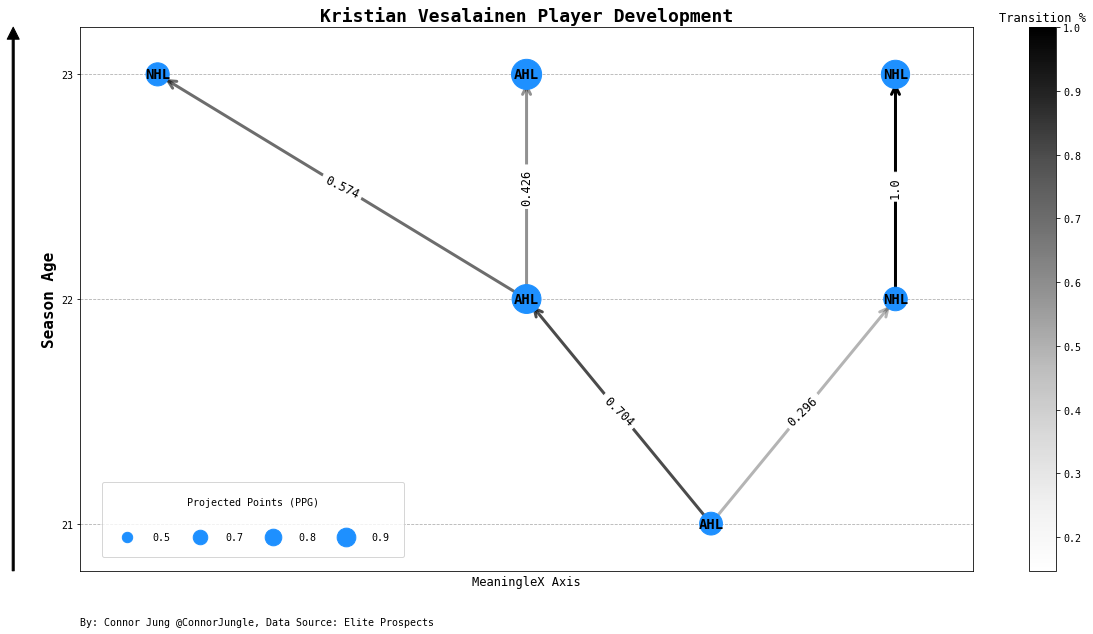

### Most Likely Player Development Path

|    | league   |   season_age |   probability |   gp |   egoals |   eassists |   epoints |   gpg |   apg |   ppg |
|---:|:---------|-------------:|--------------:|-----:|---------:|-----------:|----------:|------:|------:|------:|
|  0 | AHL      |           22 |          0.7  |   76 |       25 |         35 |        61 |  0.34 |  0.47 |  0.8  |
|  0 | NHL      |           23 |          0.57 |   82 |       17 |         24 |        42 |  0.22 |  0.3  |  0.51 |

### Maximum NHL Value Development Path

|    | league   |   season_age |   probability |   gp |   egoals |   eassists |   epoints |   gpg |   apg |   ppg |
|---:|:---------|-------------:|--------------:|-----:|---------:|-----------:|----------:|------:|------:|------:|
|  1 | NHL      |           22 |           0.3 |   82 |       18 |         25 |        43 |  0.22 |  0.31 |  0.53 |
|  0 | NHL      |           23 |           1   |   82 |       26 |         36 |        62 |  0.32 |  0.44 |  0.77 |

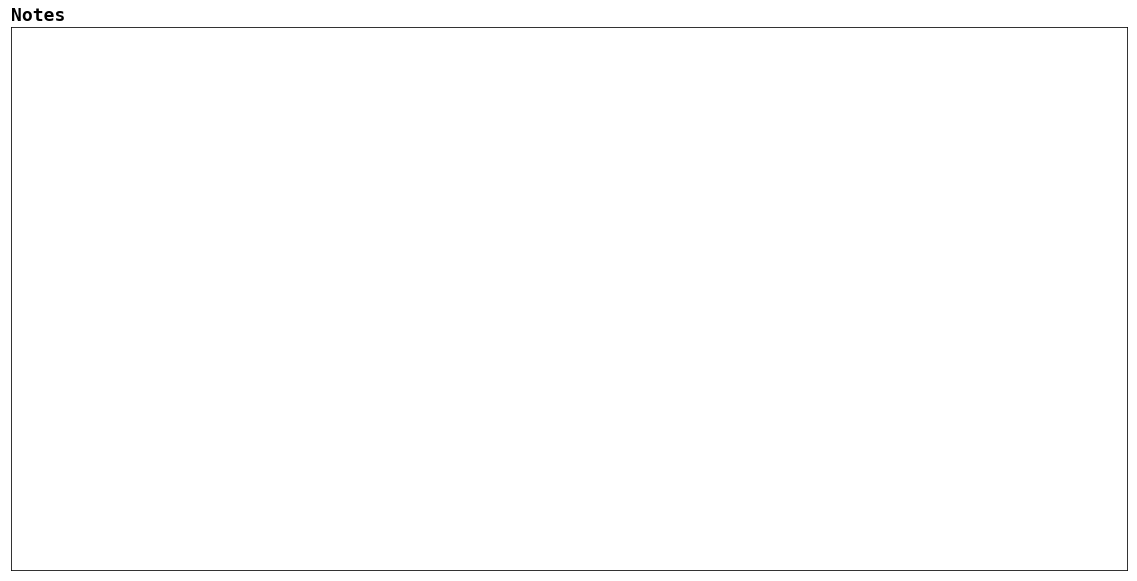

[13:47:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


# Shane Bowers


    APPLE projects Shane Bowers to have a 75.0% chance to make the NHL by age 23. 
    Shane Bowers's simulated development path over the 5 seasons since being drafted 
    has a expected NHL Value of ~67.6 points.

    Shane Bowers's "Most Likely NHL Development Path" or projected floor is ~113.0 points
    Shane Bowers's "Maximum NHL Value Development Path" or projected ceiling is ~113.0 points
            

**date_of_birth**: 1999-07-30&ensp;**nation**: Canada&ensp;**height**: 189.0&ensp;**weight**: 85.0&ensp;**shoots**: L

**rights**: Colorado Avalanche&ensp;**draft_year**: 2017.0&ensp;**draft_year**: 2017.0&ensp;**draft_round**: 1.0&ensp;**draft_team**: Ottawa Senators

### Player Stats

|    | year      | league   |   season_age |   gp |   g |   a |   tp |   gpg |   apg |   ppg |
|---:|:----------|:---------|-------------:|-----:|----:|----:|-----:|------:|------:|------:|
|  0 | 2015-2016 | USHL     |           17 |   56 |  15 |  18 |   33 |  0.27 |  0.32 |  0.59 |
|  1 | 2016-2017 | USHL     |           18 |   60 |  22 |  29 |   51 |  0.37 |  0.48 |  0.85 |
|  2 | 2017-2018 | NCAA     |           19 |   40 |  17 |  15 |   32 |  0.42 |  0.38 |  0.8  |
|  3 | 2018-2019 | NCAA     |           20 |   37 |  11 |  10 |   21 |  0.3  |  0.27 |  0.57 |
|  4 | 2019-2020 | AHL      |           21 |   48 |  10 |  17 |   27 |  0.21 |  0.35 |  0.56 |

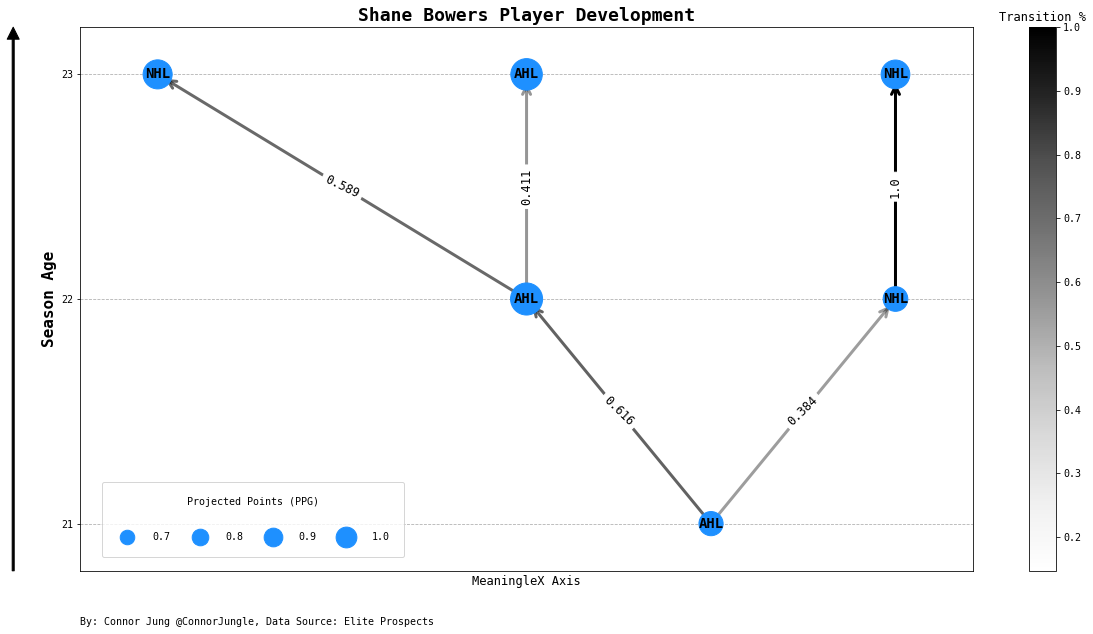

### Most Likely Player Development Path

|    | league   |   season_age |   probability |   gp |   egoals |   eassists |   epoints |   gpg |   apg |   ppg |
|---:|:---------|-------------:|--------------:|-----:|---------:|-----------:|----------:|------:|------:|------:|
|  1 | NHL      |           22 |          0.38 |   82 |       21 |         26 |        48 |  0.27 |  0.32 |  0.59 |
|  0 | NHL      |           23 |          1    |   82 |       29 |         35 |        64 |  0.36 |  0.43 |  0.79 |

### Maximum NHL Value Development Path

|    | league   |   season_age |   probability |   gp |   egoals |   eassists |   epoints |   gpg |   apg |   ppg |
|---:|:---------|-------------:|--------------:|-----:|---------:|-----------:|----------:|------:|------:|------:|
|  1 | NHL      |           22 |          0.38 |   82 |       21 |         26 |        48 |  0.27 |  0.32 |  0.59 |
|  0 | NHL      |           23 |          1    |   82 |       29 |         35 |        64 |  0.36 |  0.43 |  0.79 |

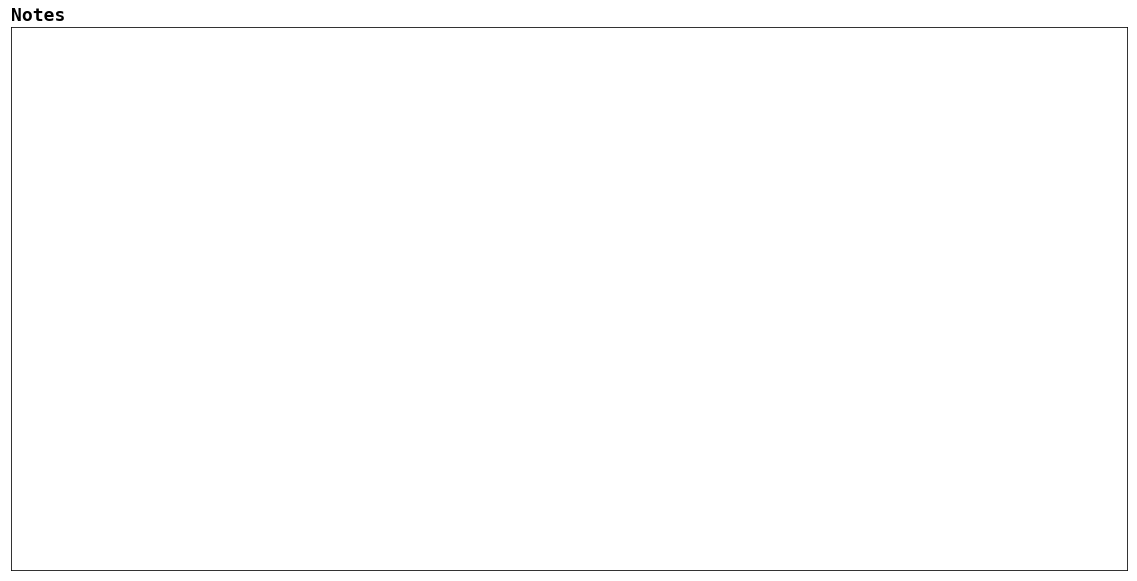

[13:48:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


# Evan Bouchard


    APPLE projects Evan Bouchard to have a 82.0% chance to make the NHL by age 23. 
    Evan Bouchard's simulated development path over the 5 seasons since being drafted 
    has a expected NHL Value of ~35.6 points.

    Evan Bouchard's "Most Likely NHL Development Path" or projected floor is ~63.1 points
    Evan Bouchard's "Maximum NHL Value Development Path" or projected ceiling is ~63.0 points
            

**date_of_birth**: 1999-10-20&ensp;**nation**: Canada&ensp;**height**: 191.0&ensp;**weight**: 88.0&ensp;**shoots**: R

**rights**: Edmonton Oilers&ensp;**draft_year**: 2018.0&ensp;**draft_year**: 2018.0&ensp;**draft_round**: 1.0&ensp;**draft_team**: Edmonton Oilers

### Player Stats

|    | year      | league   |   season_age |   gp |   g |   a |   tp |   gpg |   apg |   ppg |
|---:|:----------|:---------|-------------:|-----:|----:|----:|-----:|------:|------:|------:|
|  0 | 2015-2016 | OHL      |           17 |   43 |   2 |  15 |   17 |  0.05 |  0.35 |  0.4  |
|  1 | 2016-2017 | OHL      |           18 |   68 |  11 |  33 |   44 |  0.16 |  0.49 |  0.65 |
|  2 | 2017-2018 | OHL      |           19 |   67 |  25 |  62 |   87 |  0.37 |  0.93 |  1.3  |
|  3 | 2018-2019 | OHL      |           20 |   45 |  16 |  37 |   53 |  0.36 |  0.82 |  1.18 |
|  4 | 2019-2020 | AHL      |           21 |   54 |   7 |  29 |   36 |  0.13 |  0.54 |  0.67 |

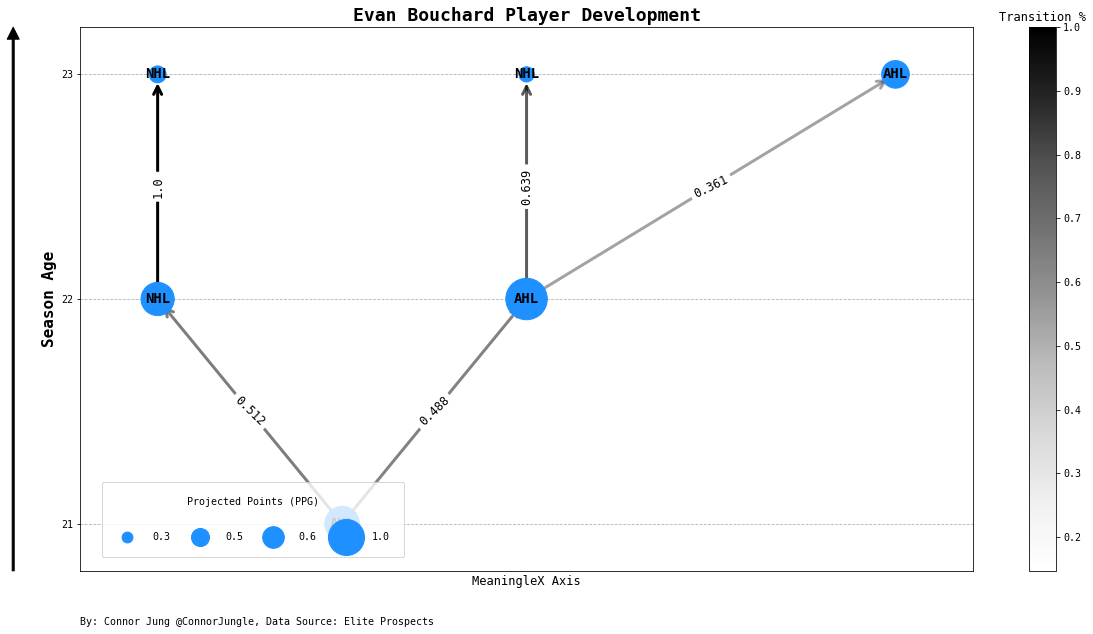

### Most Likely Player Development Path

|    | league   |   season_age |   probability |   gp |   egoals |   eassists |   epoints |   gpg |   apg |   ppg |
|---:|:---------|-------------:|--------------:|-----:|---------:|-----------:|----------:|------:|------:|------:|
|  0 | NHL      |           22 |          0.51 |   82 |       12 |         37 |        50 |  0.15 |  0.46 |  0.61 |
|  0 | NHL      |           23 |          1    |   82 |        3 |          9 |        12 |  0.04 |  0.12 |  0.16 |

### Maximum NHL Value Development Path

|    | league   |   season_age |   probability |   gp |   egoals |   eassists |   epoints |   gpg |   apg |   ppg |
|---:|:---------|-------------:|--------------:|-----:|---------:|-----------:|----------:|------:|------:|------:|
|  0 | NHL      |           22 |          0.51 |   82 |       12 |         37 |        50 |  0.15 |  0.46 |  0.61 |
|  0 | NHL      |           23 |          1    |   82 |        3 |          9 |        12 |  0.04 |  0.12 |  0.16 |

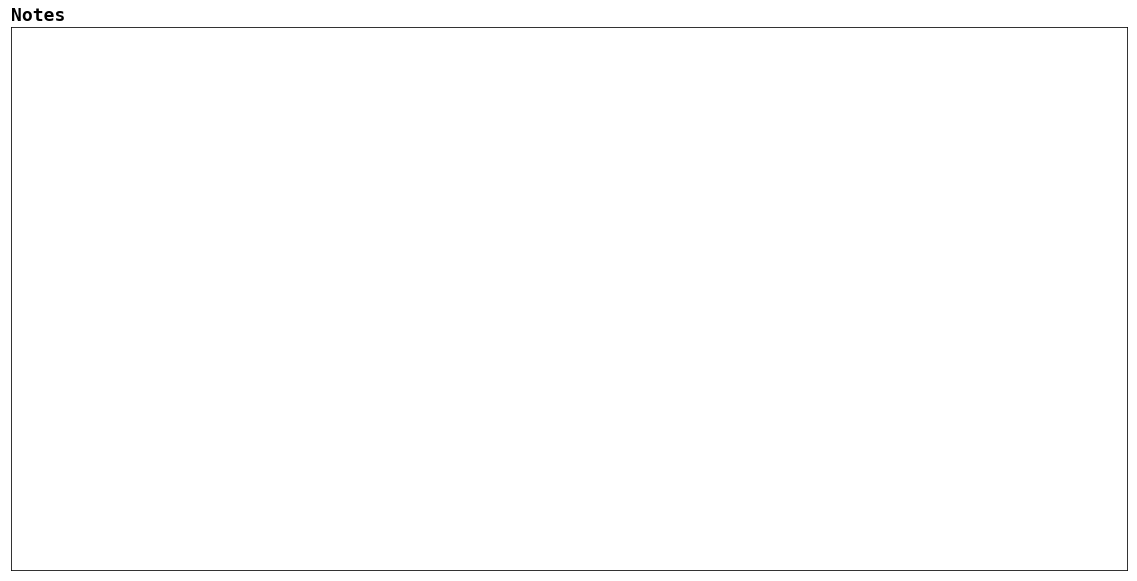

[13:49:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


# Jakob Pelletier


    APPLE projects Jakob Pelletier to have a 87.0% chance to make the NHL by age 23. 
    Jakob Pelletier's simulated development path over the 5 seasons since being drafted 
    has a expected NHL Value of ~179.7 points.

    Jakob Pelletier's "Most Likely NHL Development Path" or projected floor is ~298.7 points
    Jakob Pelletier's "Maximum NHL Value Development Path" or projected ceiling is ~299.0 points
            

**date_of_birth**: 2001-03-07&ensp;**nation**: Canada&ensp;**height**: 175.0&ensp;**weight**: 73.0&ensp;**shoots**: L

**rights**: Calgary Flames&ensp;**draft_year**: 2019.0&ensp;**draft_year**: 2019.0&ensp;**draft_round**: 1.0&ensp;**draft_team**: Calgary Flames

### Player Stats

|    | year      | league   |   season_age |   gp |   g |   a |   tp |   gpg |   apg |   ppg |
|---:|:----------|:---------|-------------:|-----:|----:|----:|-----:|------:|------:|------:|
|  0 | 2017-2018 | QMJHL    |           17 |   60 |  23 |  38 |   61 |  0.38 |  0.63 |  1.02 |
|  1 | 2018-2019 | QMJHL    |           18 |   65 |  39 |  50 |   89 |  0.6  |  0.77 |  1.37 |
|  2 | 2019-2020 | QMJHL    |           19 |   57 |  32 |  50 |   82 |  0.56 |  0.88 |  1.44 |

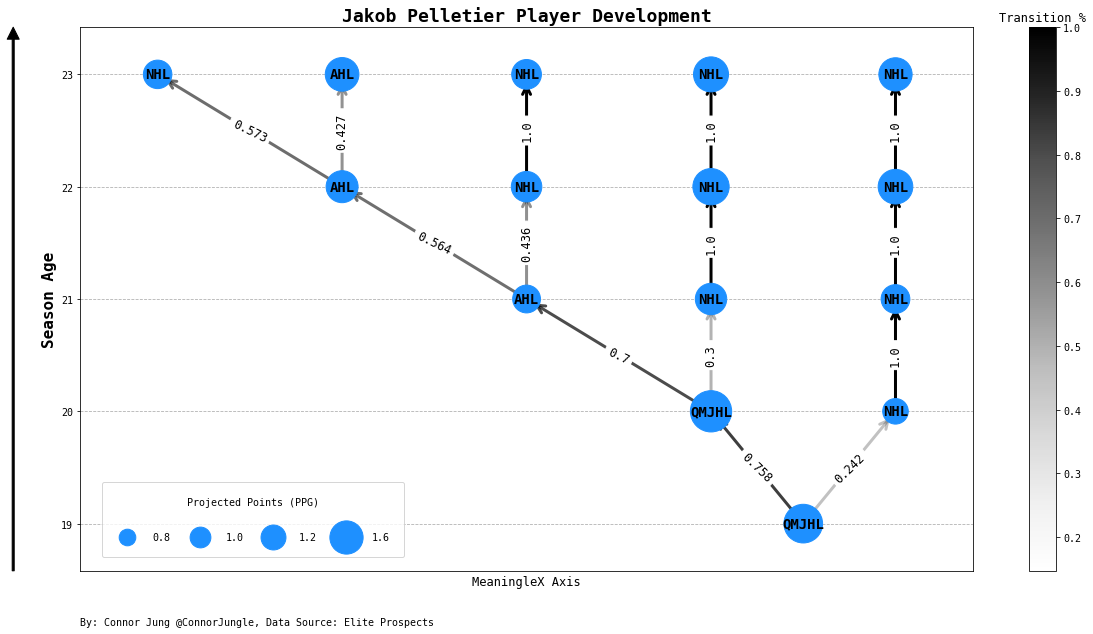

### Most Likely Player Development Path

|    | league   |   season_age |   probability |   gp |   egoals |   eassists |   epoints |   gpg |   apg |   ppg |
|---:|:---------|-------------:|--------------:|-----:|---------:|-----------:|----------:|------:|------:|------:|
|  1 | NHL      |           20 |          0.24 |   82 |       20 |         31 |        51 |  0.25 |  0.38 |  0.63 |
|  0 | NHL      |           21 |          1    |   82 |       25 |         39 |        65 |  0.31 |  0.48 |  0.8  |
|  0 | NHL      |           22 |          1    |   82 |       36 |         57 |        94 |  0.45 |  0.7  |  1.15 |
|  0 | NHL      |           23 |          1    |   82 |       34 |         53 |        87 |  0.42 |  0.65 |  1.06 |

### Maximum NHL Value Development Path

|    | league   |   season_age |   probability |   gp |   egoals |   eassists |   epoints |   gpg |   apg |   ppg |
|---:|:---------|-------------:|--------------:|-----:|---------:|-----------:|----------:|------:|------:|------:|
|  1 | NHL      |           20 |          0.24 |   82 |       20 |         31 |        51 |  0.25 |  0.38 |  0.63 |
|  0 | NHL      |           21 |          1    |   82 |       25 |         39 |        65 |  0.31 |  0.48 |  0.8  |
|  0 | NHL      |           22 |          1    |   82 |       36 |         57 |        94 |  0.45 |  0.7  |  1.15 |
|  0 | NHL      |           23 |          1    |   82 |       34 |         53 |        87 |  0.42 |  0.65 |  1.06 |

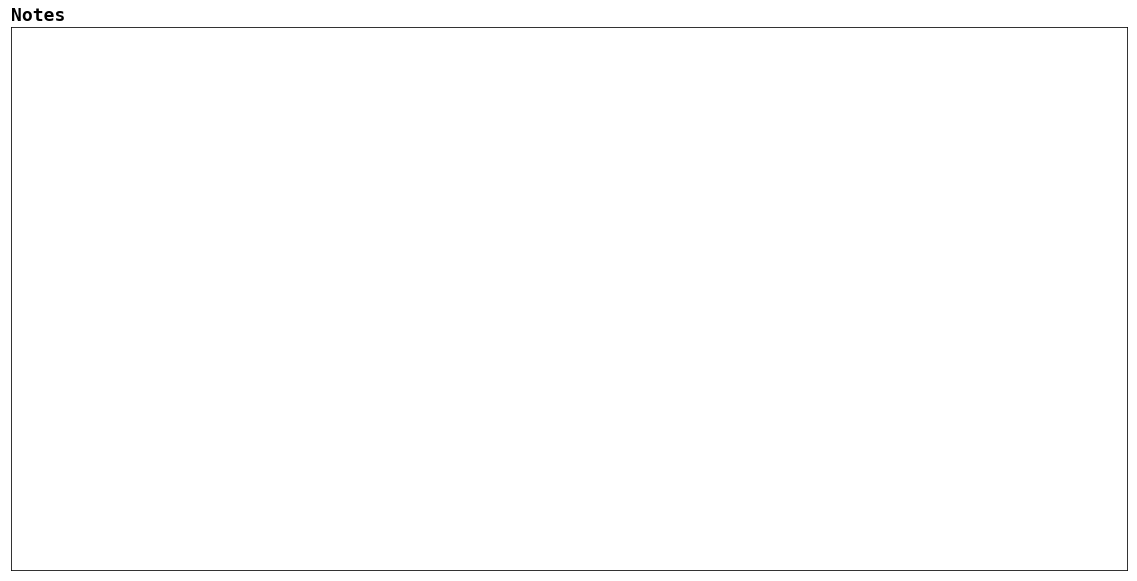

[13:50:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


# Samuel Poulin


    APPLE projects Samuel Poulin to have a 93.0% chance to make the NHL by age 23. 
    Samuel Poulin's simulated development path over the 5 seasons since being drafted 
    has a expected NHL Value of ~131.2 points.

    Samuel Poulin's "Most Likely NHL Development Path" or projected floor is ~161.4 points
    Samuel Poulin's "Maximum NHL Value Development Path" or projected ceiling is ~172.0 points
            

**date_of_birth**: 2001-02-25&ensp;**nation**: Canada&ensp;**height**: 185.0&ensp;**weight**: 98.0&ensp;**shoots**: L

**rights**: Pittsburgh Penguins&ensp;**draft_year**: 2019.0&ensp;**draft_year**: 2019.0&ensp;**draft_round**: 1.0&ensp;**draft_team**: Pittsburgh Penguins

### Player Stats

|    | year      | league   |   season_age |   gp |   g |   a |   tp |   gpg |   apg |   ppg |
|---:|:----------|:---------|-------------:|-----:|----:|----:|-----:|------:|------:|------:|
|  0 | 2017-2018 | QMJHL    |           17 |   55 |  16 |  29 |   45 |  0.29 |  0.53 |  0.82 |
|  1 | 2018-2019 | QMJHL    |           18 |   67 |  29 |  47 |   76 |  0.43 |  0.7  |  1.13 |
|  2 | 2019-2020 | QMJHL    |           19 |   46 |  32 |  45 |   77 |  0.7  |  0.98 |  1.67 |

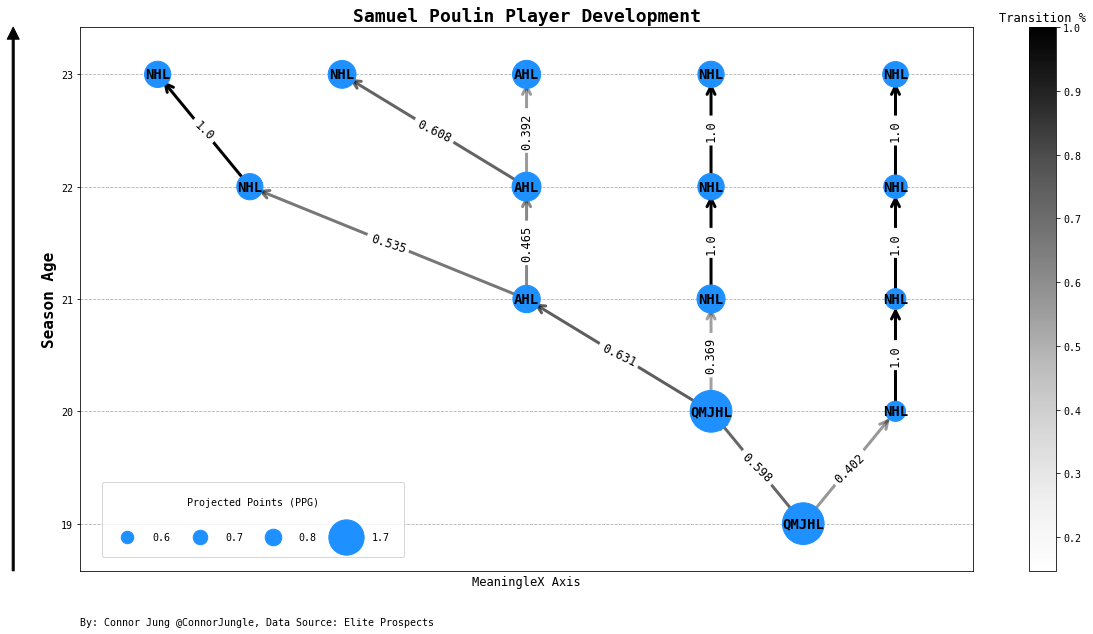

### Most Likely Player Development Path

|    | league   |   season_age |   probability |   gp |   egoals |   eassists |   epoints |   gpg |   apg |   ppg |
|---:|:---------|-------------:|--------------:|-----:|---------:|-----------:|----------:|------:|------:|------:|
|  1 | NHL      |           20 |           0.4 |   82 |       12 |         19 |        32 |  0.15 |  0.24 |  0.39 |
|  0 | NHL      |           21 |           1   |   82 |       13 |         21 |        34 |  0.16 |  0.26 |  0.42 |
|  0 | NHL      |           22 |           1   |   82 |       16 |         26 |        43 |  0.2  |  0.33 |  0.53 |
|  0 | NHL      |           23 |           1   |   82 |       19 |         32 |        51 |  0.24 |  0.39 |  0.63 |

### Maximum NHL Value Development Path

|    | league   |   season_age |   probability |   gp |   egoals |   eassists |   epoints |   gpg |   apg |   ppg |
|---:|:---------|-------------:|--------------:|-----:|---------:|-----------:|----------:|------:|------:|------:|
|  0 | QMJHL    |           20 |          0.6  |   68 |       43 |         70 |       113 |  0.64 |  1.04 |  1.68 |
|  1 | NHL      |           21 |          0.37 |   82 |       23 |         38 |        62 |  0.29 |  0.47 |  0.76 |
|  0 | NHL      |           22 |          1    |   82 |       20 |         34 |        55 |  0.26 |  0.42 |  0.67 |
|  0 | NHL      |           23 |          1    |   82 |       20 |         33 |        54 |  0.25 |  0.41 |  0.66 |

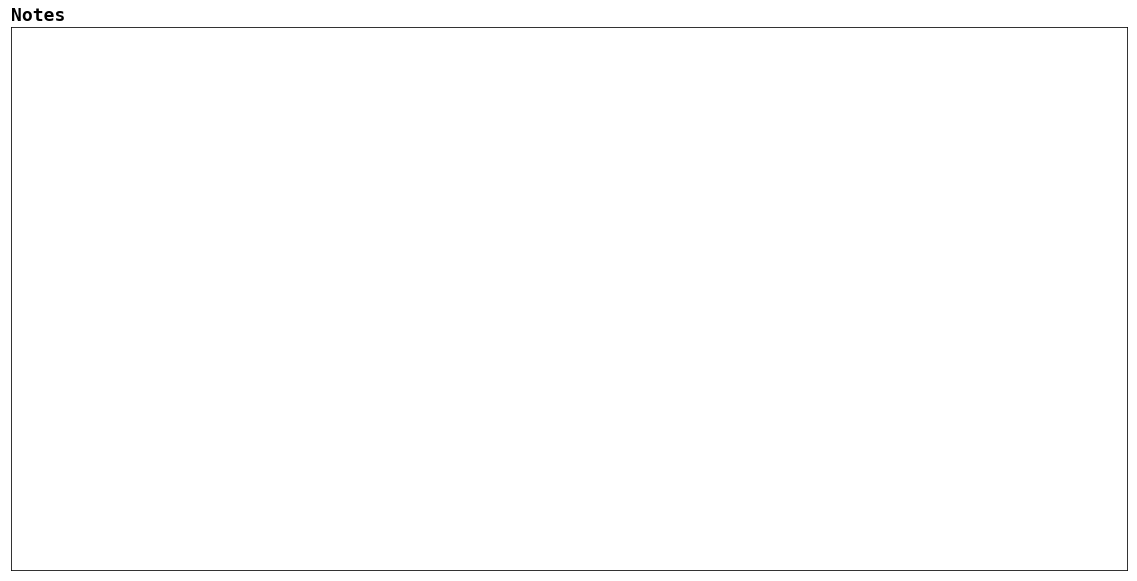

[13:51:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


# Thomas Harley


    APPLE projects Thomas Harley to have a 86.0% chance to make the NHL by age 23. 
    Thomas Harley's simulated development path over the 5 seasons since being drafted 
    has a expected NHL Value of ~117.2 points.

    Thomas Harley's "Most Likely NHL Development Path" or projected floor is ~88.2 points
    Thomas Harley's "Maximum NHL Value Development Path" or projected ceiling is ~246.0 points
            

**date_of_birth**: 2001-08-19&ensp;**nation**: Canada                                                                                             /  USA&ensp;**height**: 190.0&ensp;**weight**: 87.0&ensp;**shoots**: L

**rights**: Dallas Stars&ensp;**draft_year**: 2019.0&ensp;**draft_year**: 2019.0&ensp;**draft_round**: 1.0&ensp;**draft_team**: Dallas Stars

### Player Stats

|    | year      | league   |   season_age |   gp |   g |   a |   tp |   gpg |   apg |   ppg |
|---:|:----------|:---------|-------------:|-----:|----:|----:|-----:|------:|------:|------:|
|  0 | 2017-2018 | OHL      |           17 |   62 |   1 |  14 |   15 |  0.02 |  0.23 |  0.24 |
|  1 | 2018-2019 | OHL      |           18 |   68 |  11 |  47 |   58 |  0.16 |  0.69 |  0.85 |
|  2 | 2019-2020 | OHL      |           19 |   59 |  18 |  39 |   57 |  0.31 |  0.66 |  0.97 |

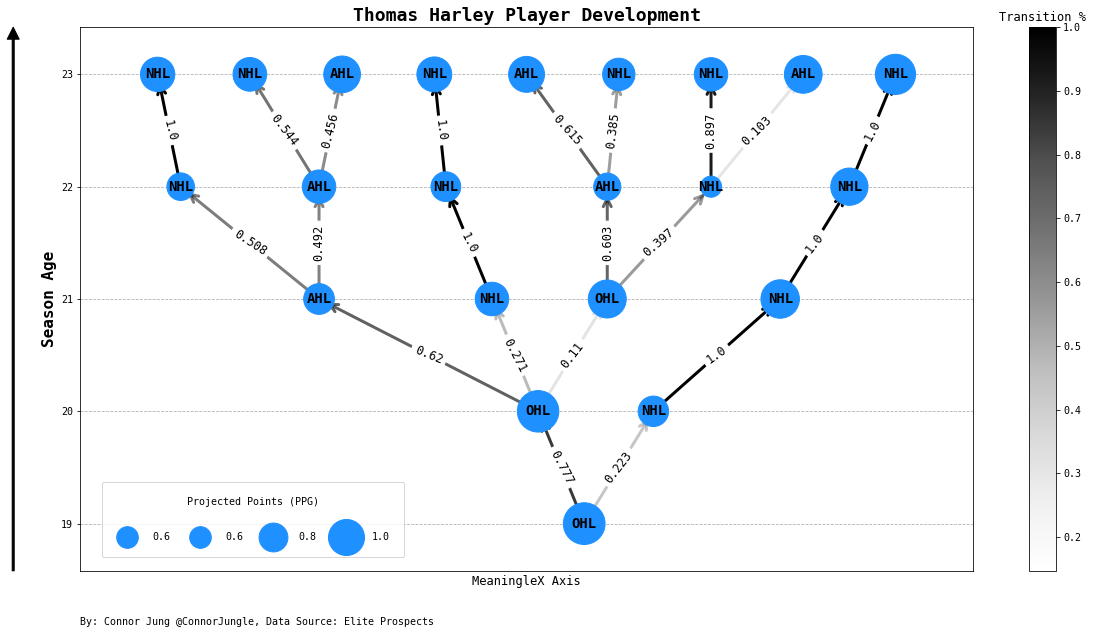

### Most Likely Player Development Path

|    | league   |   season_age |   probability |   gp |   egoals |   eassists |   epoints |   gpg |   apg |   ppg |
|---:|:---------|-------------:|--------------:|-----:|---------:|-----------:|----------:|------:|------:|------:|
|  0 | OHL      |           20 |          0.78 |   68 |       12 |         52 |        64 |  0.18 |  0.77 |  0.95 |
|  0 | AHL      |           21 |          0.62 |   76 |        7 |         32 |        39 |  0.1  |  0.42 |  0.52 |
|  0 | NHL      |           22 |          0.51 |   82 |        6 |         28 |        34 |  0.08 |  0.34 |  0.42 |
|  0 | NHL      |           23 |          1    |   82 |       10 |         43 |        53 |  0.12 |  0.53 |  0.65 |

### Maximum NHL Value Development Path

|    | league   |   season_age |   probability |   gp |   egoals |   eassists |   epoints |   gpg |   apg |   ppg |
|---:|:---------|-------------:|--------------:|-----:|---------:|-----------:|----------:|------:|------:|------:|
|  1 | NHL      |           20 |          0.22 |   82 |        7 |         34 |        42 |  0.1  |  0.42 |  0.51 |
|  0 | NHL      |           21 |          1    |   82 |       12 |         54 |        67 |  0.16 |  0.67 |  0.82 |
|  0 | NHL      |           22 |          1    |   82 |       11 |         51 |        63 |  0.15 |  0.62 |  0.77 |
|  0 | NHL      |           23 |          1    |   82 |       13 |         59 |        73 |  0.17 |  0.73 |  0.9  |

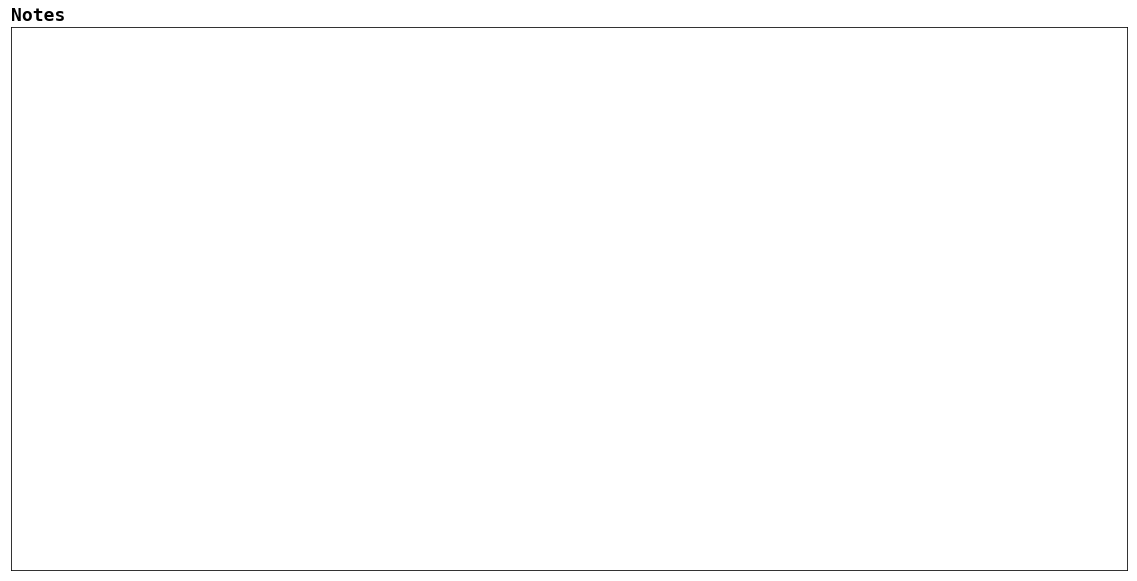

[13:52:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


# Ryan Suzuki


    APPLE projects Ryan Suzuki to have a 86.0% chance to make the NHL by age 23. 
    Ryan Suzuki's simulated development path over the 5 seasons since being drafted 
    has a expected NHL Value of ~151.8 points.

    Ryan Suzuki's "Most Likely NHL Development Path" or projected floor is ~126.4 points
    Ryan Suzuki's "Maximum NHL Value Development Path" or projected ceiling is ~262.0 points
            

**date_of_birth**: 2001-05-28&ensp;**nation**: Canada&ensp;**height**: 184.0&ensp;**weight**: 82.0&ensp;**shoots**: L

**rights**: Carolina Hurricanes&ensp;**draft_year**: 2019.0&ensp;**draft_year**: 2019.0&ensp;**draft_round**: 1.0&ensp;**draft_team**: Carolina Hurricanes

### Player Stats

|    | year      | league   |   season_age |   gp |   g |   a |   tp |   gpg |   apg |   ppg |
|---:|:----------|:---------|-------------:|-----:|----:|----:|-----:|------:|------:|------:|
|  0 | 2017-2018 | OHL      |           17 |   64 |  14 |  30 |   44 |  0.22 |  0.47 |  0.69 |
|  1 | 2018-2019 | OHL      |           18 |   65 |  25 |  50 |   75 |  0.38 |  0.77 |  1.15 |
|  2 | 2019-2020 | OHL      |           19 |   44 |  18 |  40 |   58 |  0.41 |  0.91 |  1.32 |

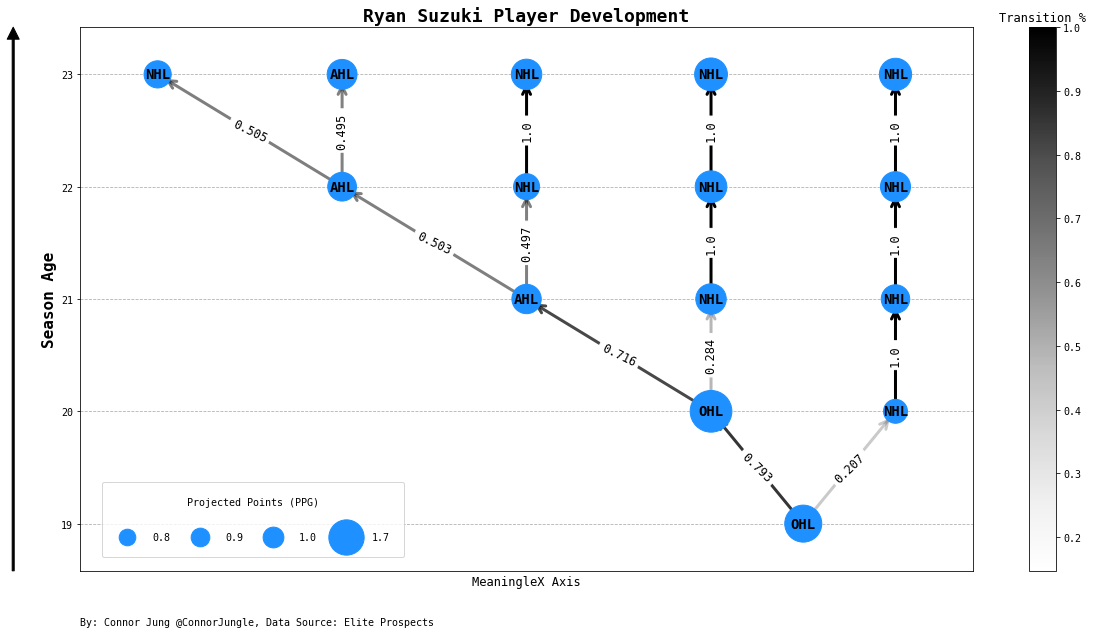

### Most Likely Player Development Path

|    | league   |   season_age |   probability |   gp |   egoals |   eassists |   epoints |   gpg |   apg |   ppg |
|---:|:---------|-------------:|--------------:|-----:|---------:|-----------:|----------:|------:|------:|------:|
|  0 | OHL      |           20 |          0.79 |   68 |       36 |         77 |       113 |  0.53 |  1.14 |  1.67 |
|  0 | AHL      |           21 |          0.72 |   76 |       20 |         43 |        63 |  0.26 |  0.57 |  0.83 |
|  1 | NHL      |           22 |          0.5  |   82 |       16 |         36 |        53 |  0.21 |  0.44 |  0.65 |
|  0 | NHL      |           23 |          1    |   82 |       23 |         49 |        72 |  0.28 |  0.61 |  0.89 |

### Maximum NHL Value Development Path

|    | league   |   season_age |   probability |   gp |   egoals |   eassists |   epoints |   gpg |   apg |   ppg |
|---:|:---------|-------------:|--------------:|-----:|---------:|-----------:|----------:|------:|------:|------:|
|  1 | NHL      |           20 |          0.21 |   82 |       14 |         30 |        45 |  0.18 |  0.38 |  0.55 |
|  0 | NHL      |           21 |          1    |   82 |       20 |         43 |        64 |  0.25 |  0.53 |  0.78 |
|  0 | NHL      |           22 |          1    |   82 |       22 |         48 |        71 |  0.28 |  0.59 |  0.87 |
|  0 | NHL      |           23 |          1    |   82 |       26 |         55 |        81 |  0.32 |  0.68 |  1    |

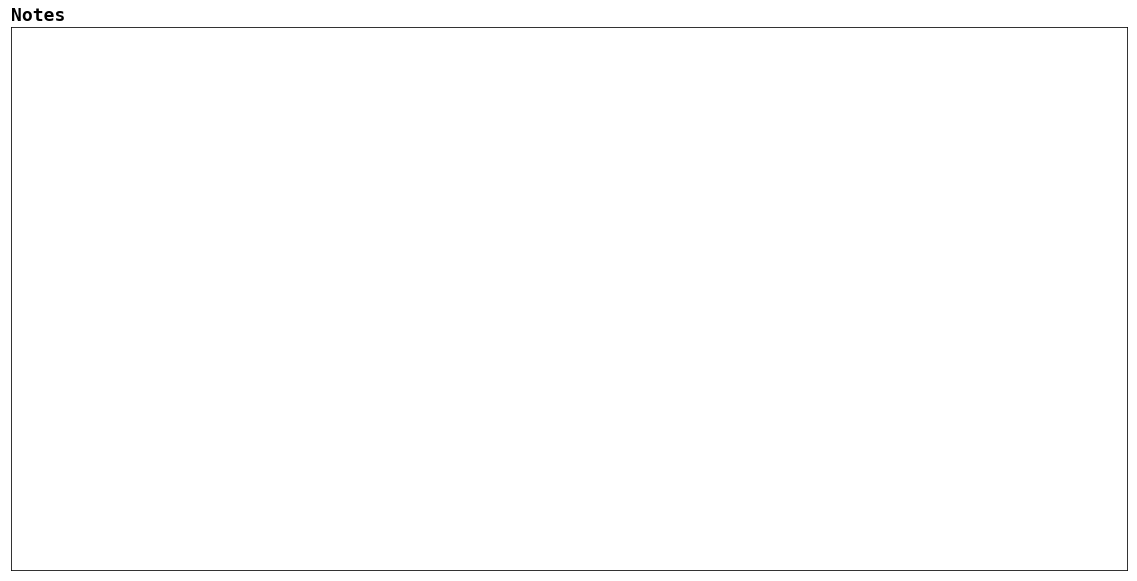

[13:54:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


# Philip Tomasino


    APPLE projects Philip Tomasino to have a 89.0% chance to make the NHL by age 23. 
    Philip Tomasino's simulated development path over the 5 seasons since being drafted 
    has a expected NHL Value of ~134.5 points.

    Philip Tomasino's "Most Likely NHL Development Path" or projected floor is ~105.7 points
    Philip Tomasino's "Maximum NHL Value Development Path" or projected ceiling is ~218.0 points
            

**date_of_birth**: 2001-07-28&ensp;**nation**: Canada&ensp;**height**: 183.0&ensp;**weight**: 82.0&ensp;**shoots**: R

**rights**: Nashville Predators&ensp;**draft_year**: 2019.0&ensp;**draft_year**: 2019.0&ensp;**draft_round**: 1.0&ensp;**draft_team**: Nashville Predators

### Player Stats

|    | year      | league   |   season_age |   gp |   g |   a |   tp |   gpg |   apg |   ppg |
|---:|:----------|:---------|-------------:|-----:|----:|----:|-----:|------:|------:|------:|
|  0 | 2017-2018 | OHL      |           17 |   61 |   5 |  19 |   24 |  0.08 |  0.31 |  0.39 |
|  1 | 2018-2019 | OHL      |           18 |   67 |  34 |  38 |   72 |  0.51 |  0.57 |  1.07 |
|  2 | 2019-2020 | OHL      |           19 |   62 |  40 |  60 |  100 |  0.65 |  0.97 |  1.61 |

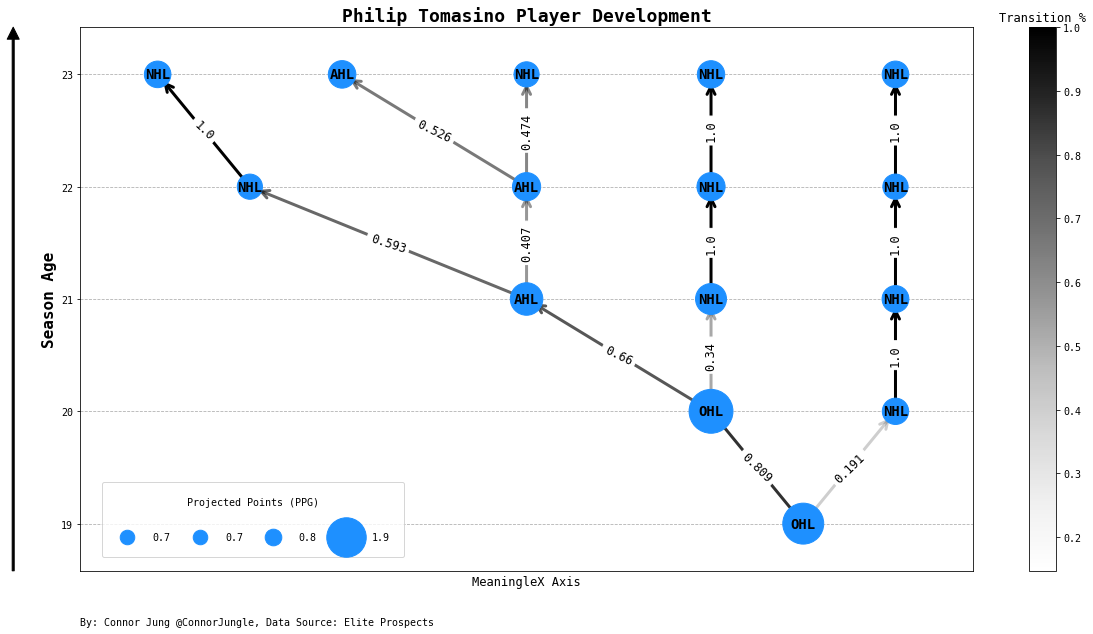

### Most Likely Player Development Path

|    | league   |   season_age |   probability |   gp |   egoals |   eassists |   epoints |   gpg |   apg |   ppg |
|---:|:---------|-------------:|--------------:|-----:|---------:|-----------:|----------:|------:|------:|------:|
|  0 | OHL      |           20 |          0.81 |   68 |       50 |         75 |       125 |  0.74 |  1.11 |  1.85 |
|  0 | AHL      |           21 |          0.66 |   76 |       30 |         46 |        77 |  0.41 |  0.61 |  1.02 |
|  0 | NHL      |           22 |          0.59 |   82 |       20 |         30 |        50 |  0.24 |  0.37 |  0.61 |
|  0 | NHL      |           23 |          1    |   82 |       22 |         33 |        55 |  0.27 |  0.41 |  0.68 |

### Maximum NHL Value Development Path

|    | league   |   season_age |   probability |   gp |   egoals |   eassists |   epoints |   gpg |   apg |   ppg |
|---:|:---------|-------------:|--------------:|-----:|---------:|-----------:|----------:|------:|------:|------:|
|  1 | NHL      |           20 |          0.19 |   82 |       21 |         32 |        54 |  0.27 |  0.4  |  0.67 |
|  0 | NHL      |           21 |          1    |   82 |       22 |         34 |        56 |  0.28 |  0.42 |  0.69 |
|  0 | NHL      |           22 |          1    |   82 |       20 |         30 |        50 |  0.25 |  0.37 |  0.61 |
|  0 | NHL      |           23 |          1    |   82 |       22 |         33 |        55 |  0.27 |  0.41 |  0.68 |

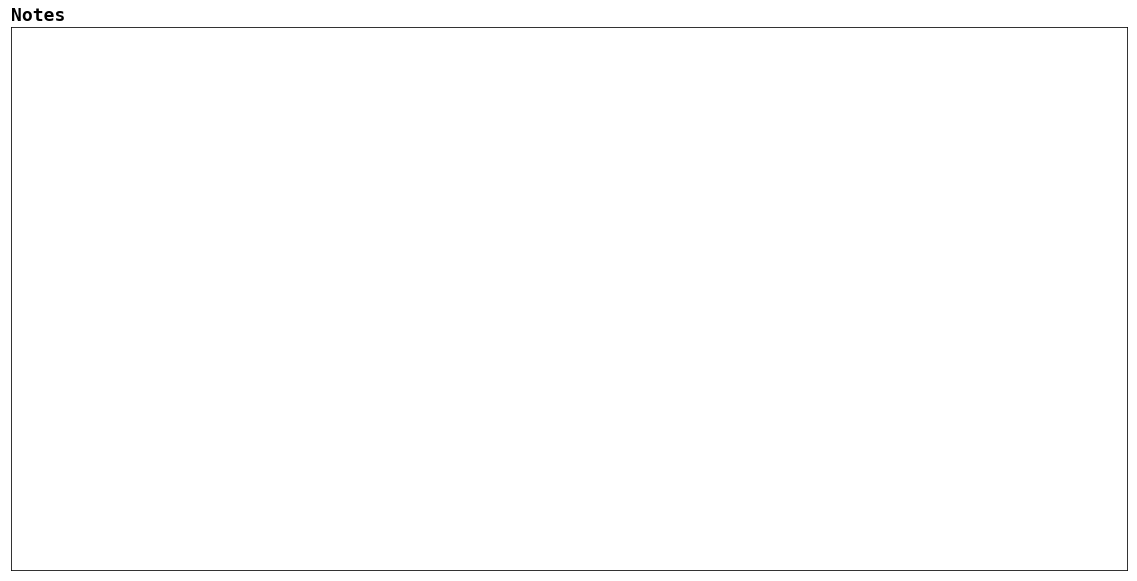

[13:55:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


# Nicholas Robertson


    APPLE projects Nicholas Robertson to have a 70.0% chance to make the NHL by age 23. 
    Nicholas Robertson's simulated development path over the 5 seasons since being drafted 
    has a expected NHL Value of ~151.1 points.

    Nicholas Robertson's "Most Likely NHL Development Path" or projected floor is ~311.8 points
    Nicholas Robertson's "Maximum NHL Value Development Path" or projected ceiling is ~312.0 points
            

**date_of_birth**: 2001-09-11&ensp;**nation**: USA&ensp;**height**: 175.0&ensp;**weight**: 73.0&ensp;**shoots**: L

**rights**: Toronto Maple Leafs&ensp;**draft_year**: 2019.0&ensp;**draft_year**: 2019.0&ensp;**draft_round**: 2.0&ensp;**draft_team**: Toronto Maple Leafs

### Player Stats

|    | year      | league   |   season_age |   gp |   g |   a |   tp |   gpg |   apg |   ppg |
|---:|:----------|:---------|-------------:|-----:|----:|----:|-----:|------:|------:|------:|
|  0 | 2017-2018 | OHL      |           17 |   62 |  15 |  18 |   33 |  0.24 |  0.29 |  0.53 |
|  1 | 2018-2019 | OHL      |           18 |   54 |  27 |  28 |   55 |  0.5  |  0.52 |  1.02 |
|  2 | 2019-2020 | OHL      |           19 |   46 |  55 |  31 |   86 |  1.2  |  0.67 |  1.87 |

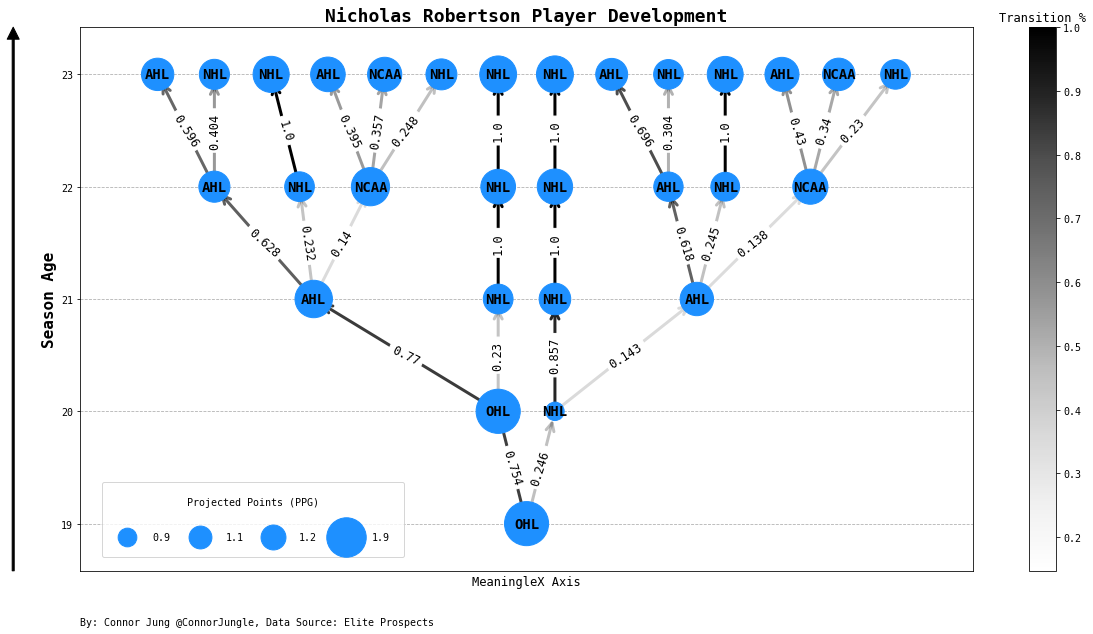

### Most Likely Player Development Path

|    | league   |   season_age |   probability |   gp |   egoals |   eassists |   epoints |   gpg |   apg |   ppg |
|---:|:---------|-------------:|--------------:|-----:|---------:|-----------:|----------:|------:|------:|------:|
|  1 | NHL      |           20 |          0.25 |   82 |       13 |         13 |        26 |  0.16 |  0.17 |  0.33 |
|  0 | NHL      |           21 |          0.86 |   82 |       38 |         40 |        78 |  0.47 |  0.49 |  0.96 |
|  0 | NHL      |           22 |          1    |   82 |       48 |         50 |        98 |  0.59 |  0.61 |  1.2  |
|  0 | NHL      |           23 |          1    |   82 |       52 |         54 |       107 |  0.64 |  0.67 |  1.31 |

### Maximum NHL Value Development Path

|    | league   |   season_age |   probability |   gp |   egoals |   eassists |   epoints |   gpg |   apg |   ppg |
|---:|:---------|-------------:|--------------:|-----:|---------:|-----------:|----------:|------:|------:|------:|
|  1 | NHL      |           20 |          0.25 |   82 |       13 |         13 |        26 |  0.16 |  0.17 |  0.33 |
|  0 | NHL      |           21 |          0.86 |   82 |       38 |         40 |        78 |  0.47 |  0.49 |  0.96 |
|  0 | NHL      |           22 |          1    |   82 |       48 |         50 |        98 |  0.59 |  0.61 |  1.2  |
|  0 | NHL      |           23 |          1    |   82 |       52 |         54 |       107 |  0.64 |  0.67 |  1.31 |

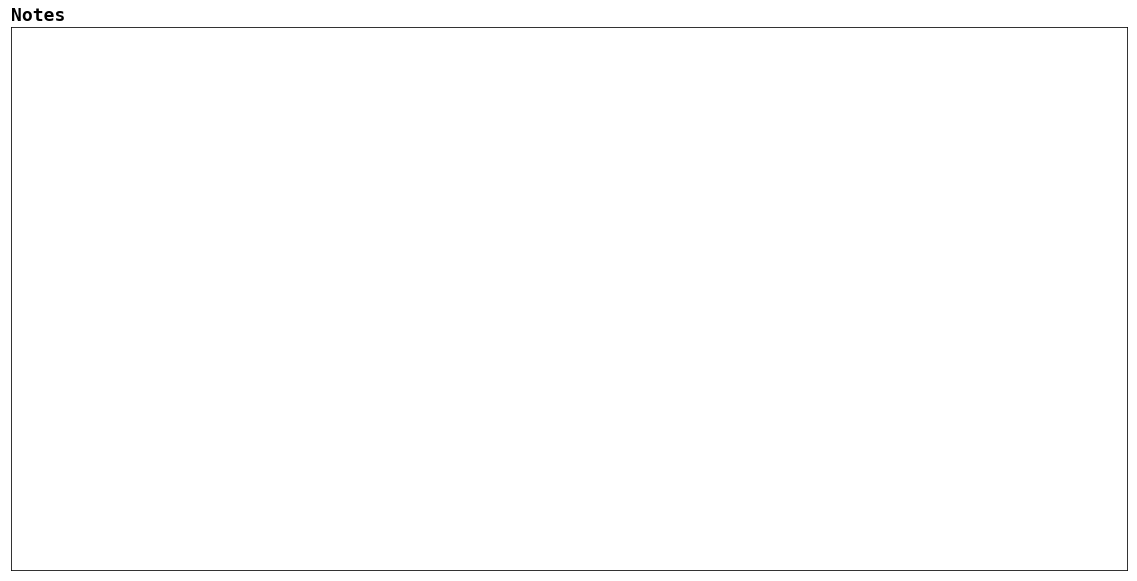

[13:56:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


# Connor McMichael


    APPLE projects Connor McMichael to have a 92.0% chance to make the NHL by age 23. 
    Connor McMichael's simulated development path over the 5 seasons since being drafted 
    has a expected NHL Value of ~153.9 points.

    Connor McMichael's "Most Likely NHL Development Path" or projected floor is ~218.5 points
    Connor McMichael's "Maximum NHL Value Development Path" or projected ceiling is ~218.0 points
            

**date_of_birth**: 2001-01-15&ensp;**nation**: Canada&ensp;**height**: 183.0&ensp;**weight**: 82.0&ensp;**shoots**: L

**rights**: Washington Capitals&ensp;**draft_year**: 2019.0&ensp;**draft_year**: 2019.0&ensp;**draft_round**: 1.0&ensp;**draft_team**: Washington Capitals

### Player Stats

|    | year      | league   |   season_age |   gp |   g |   a |   tp |   gpg |   apg |   ppg |
|---:|:----------|:---------|-------------:|-----:|----:|----:|-----:|------:|------:|------:|
|  0 | 2017-2018 | OHL      |           17 |   60 |   8 |   8 |   16 |  0.13 |  0.13 |  0.27 |
|  1 | 2018-2019 | OHL      |           18 |   67 |  36 |  36 |   72 |  0.54 |  0.54 |  1.07 |
|  2 | 2019-2020 | OHL      |           19 |   52 |  47 |  55 |  102 |  0.9  |  1.06 |  1.96 |

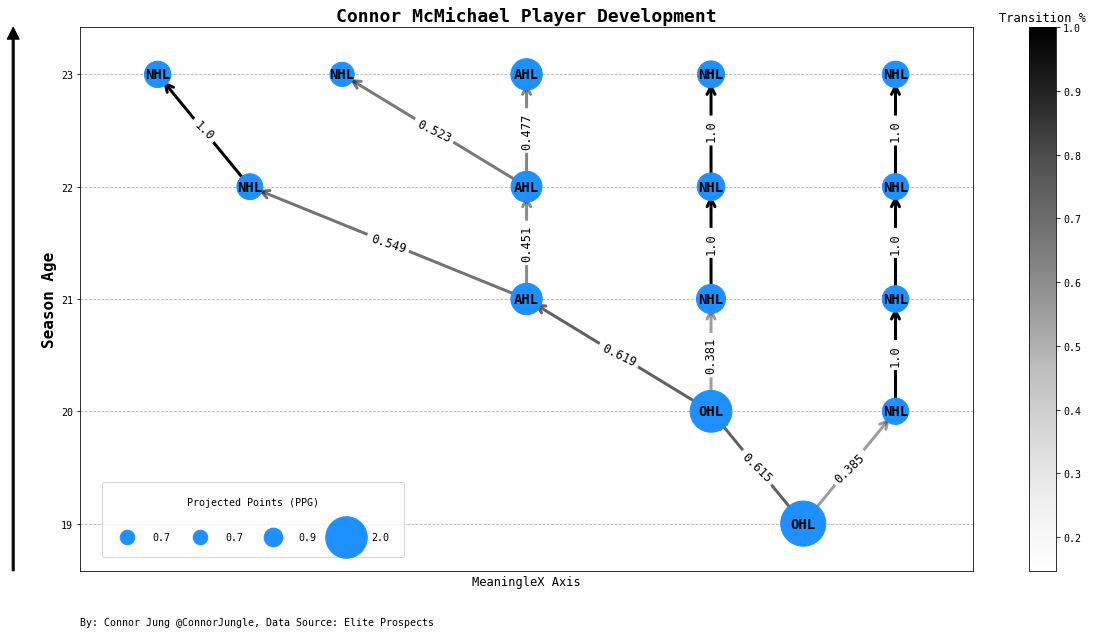

### Most Likely Player Development Path

|    | league   |   season_age |   probability |   gp |   egoals |   eassists |   epoints |   gpg |   apg |   ppg |
|---:|:---------|-------------:|--------------:|-----:|---------:|-----------:|----------:|------:|------:|------:|
|  1 | NHL      |           20 |          0.38 |   82 |       27 |         27 |        54 |  0.33 |  0.33 |  0.66 |
|  0 | NHL      |           21 |          1    |   82 |       27 |         27 |        55 |  0.34 |  0.34 |  0.68 |
|  0 | NHL      |           22 |          1    |   82 |       26 |         26 |        53 |  0.33 |  0.33 |  0.65 |
|  0 | NHL      |           23 |          1    |   82 |       27 |         27 |        55 |  0.34 |  0.34 |  0.67 |

### Maximum NHL Value Development Path

|    | league   |   season_age |   probability |   gp |   egoals |   eassists |   epoints |   gpg |   apg |   ppg |
|---:|:---------|-------------:|--------------:|-----:|---------:|-----------:|----------:|------:|------:|------:|
|  1 | NHL      |           20 |          0.38 |   82 |       27 |         27 |        54 |  0.33 |  0.33 |  0.66 |
|  0 | NHL      |           21 |          1    |   82 |       27 |         27 |        55 |  0.34 |  0.34 |  0.68 |
|  0 | NHL      |           22 |          1    |   82 |       26 |         26 |        53 |  0.33 |  0.33 |  0.65 |
|  0 | NHL      |           23 |          1    |   82 |       27 |         27 |        55 |  0.34 |  0.34 |  0.67 |

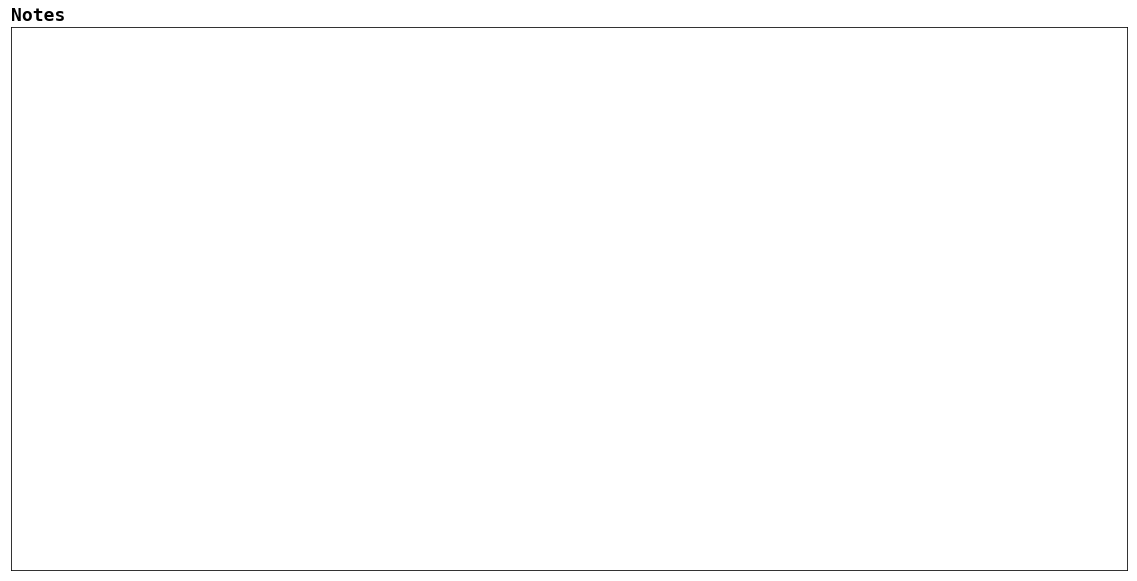

[13:57:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


# Arthur Kaliyev


    APPLE projects Arthur Kaliyev to have a 61.0% chance to make the NHL by age 23. 
    Arthur Kaliyev's simulated development path over the 5 seasons since being drafted 
    has a expected NHL Value of ~111.4 points.

    Arthur Kaliyev's "Most Likely NHL Development Path" or projected floor is ~152.8 points
    Arthur Kaliyev's "Maximum NHL Value Development Path" or projected ceiling is ~314.0 points
            

**date_of_birth**: 2001-06-26&ensp;**nation**: USA&ensp;**height**: 188.0&ensp;**weight**: 86.0&ensp;**shoots**: L

**rights**: Los Angeles Kings&ensp;**draft_year**: 2019.0&ensp;**draft_year**: 2019.0&ensp;**draft_round**: 2.0&ensp;**draft_team**: Los Angeles Kings

### Player Stats

|    | year      | league   |   season_age |   gp |   g |   a |   tp |   gpg |   apg |   ppg |
|---:|:----------|:---------|-------------:|-----:|----:|----:|-----:|------:|------:|------:|
|  0 | 2017-2018 | OHL      |           17 |   68 |  31 |  17 |   48 |  0.46 |  0.25 |  0.71 |
|  1 | 2018-2019 | OHL      |           18 |   67 |  51 |  51 |  102 |  0.76 |  0.76 |  1.52 |
|  2 | 2019-2020 | OHL      |           19 |   57 |  44 |  54 |   98 |  0.77 |  0.95 |  1.72 |

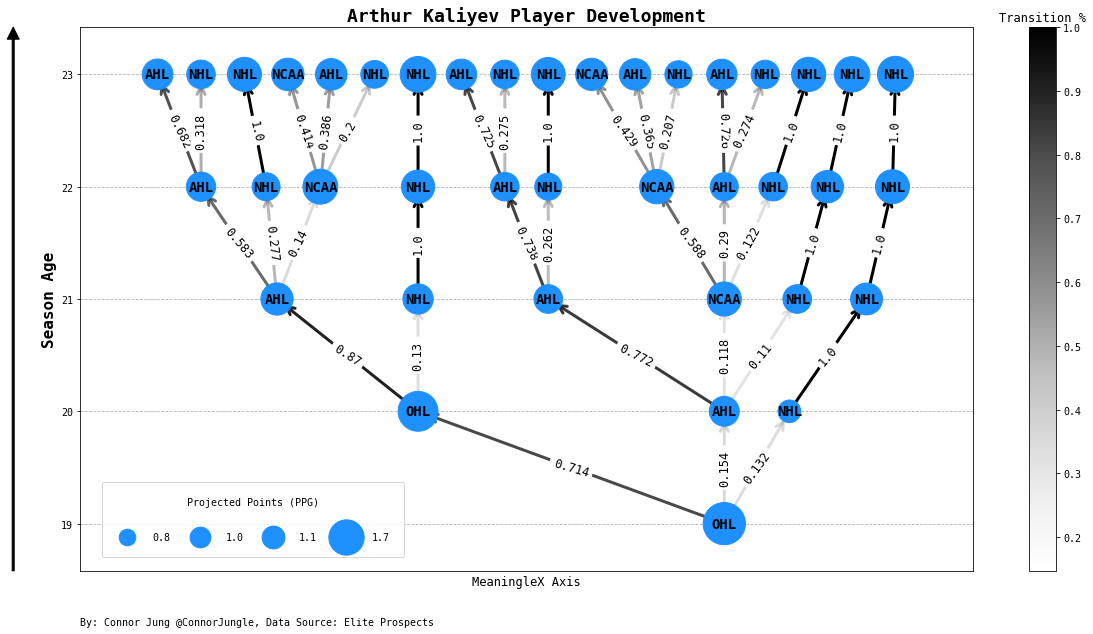

### Most Likely Player Development Path

|    | league   |   season_age |   probability |   gp |   egoals |   eassists |   epoints |   gpg |   apg |   ppg |
|---:|:---------|-------------:|--------------:|-----:|---------:|-----------:|----------:|------:|------:|------:|
|  0 | OHL      |           20 |          0.71 |   68 |       52 |         52 |       104 |  0.77 |  0.77 |  1.53 |
|  0 | AHL      |           21 |          0.87 |   76 |       37 |         37 |        75 |  0.5  |  0.5  |  1    |
|  1 | NHL      |           22 |          0.28 |   82 |       30 |         30 |        61 |  0.37 |  0.37 |  0.75 |
|  0 | NHL      |           23 |          1    |   82 |       45 |         45 |        91 |  0.56 |  0.56 |  1.12 |

### Maximum NHL Value Development Path

|    | league   |   season_age |   probability |   gp |   egoals |   eassists |   epoints |   gpg |   apg |   ppg |
|---:|:---------|-------------:|--------------:|-----:|---------:|-----------:|----------:|------:|------:|------:|
|  2 | NHL      |           20 |          0.13 |   82 |       20 |         20 |        40 |  0.25 |  0.25 |  0.49 |
|  0 | NHL      |           21 |          1    |   82 |       40 |         40 |        80 |  0.49 |  0.49 |  0.98 |
|  0 | NHL      |           22 |          1    |   82 |       45 |         45 |        91 |  0.56 |  0.56 |  1.11 |
|  0 | NHL      |           23 |          1    |   82 |       51 |         51 |       102 |  0.63 |  0.63 |  1.25 |

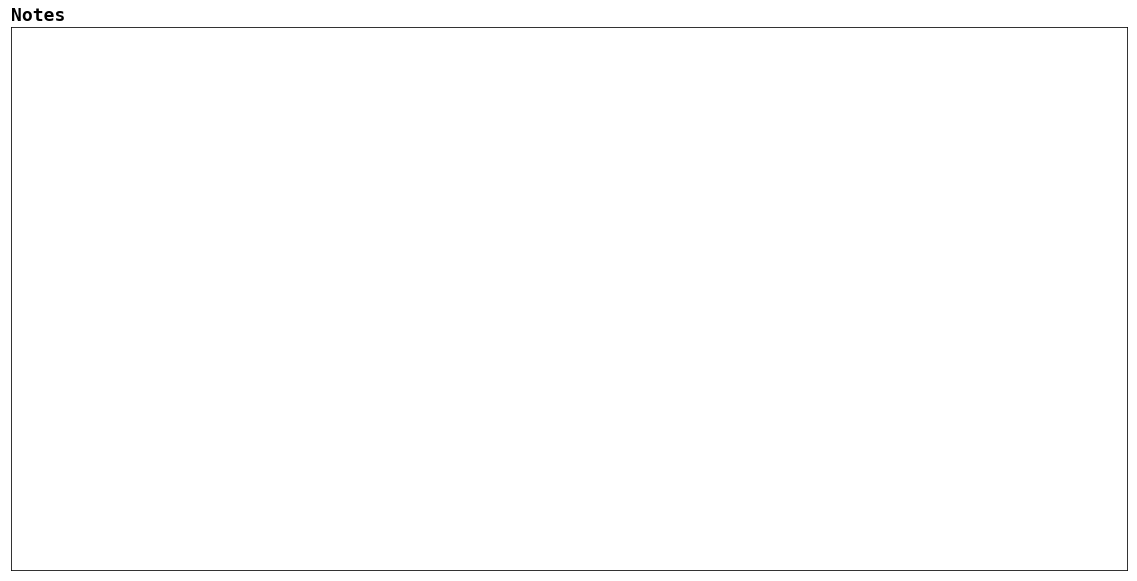

[13:59:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


# Jan Jeník


    APPLE projects Jan Jeník to have a 51.0% chance to make the NHL by age 23. 
    Jan Jeník's simulated development path over the 5 seasons since being drafted 
    has a expected NHL Value of ~119.2 points.

    Jan Jeník's "Most Likely NHL Development Path" or projected floor is ~361.2 points
    Jan Jeník's "Maximum NHL Value Development Path" or projected ceiling is ~361.0 points
            

**date_of_birth**: 2000-09-15&ensp;**nation**: Czech Rep.&ensp;**height**: 185.0&ensp;**weight**: 82.0&ensp;**shoots**: L

**rights**: Arizona Coyotes&ensp;**draft_year**: 2018.0&ensp;**draft_year**: 2018.0&ensp;**draft_round**: 3.0&ensp;**draft_team**: Arizona Coyotes

### Player Stats

|    | year      | league   |   season_age |   gp |   g |   a |   tp |   gpg |   apg |   ppg |
|---:|:----------|:---------|-------------:|-----:|----:|----:|-----:|------:|------:|------:|
|  0 | 2017-2018 | Czech2   |           18 |   30 |   4 |   7 |   11 |  0.13 |  0.23 |  0.37 |
|  1 | 2018-2019 | OHL      |           19 |   27 |  13 |  17 |   30 |  0.48 |  0.63 |  1.11 |
|  2 | 2019-2020 | OHL      |           20 |   27 |  22 |  34 |   56 |  0.81 |  1.26 |  2.07 |

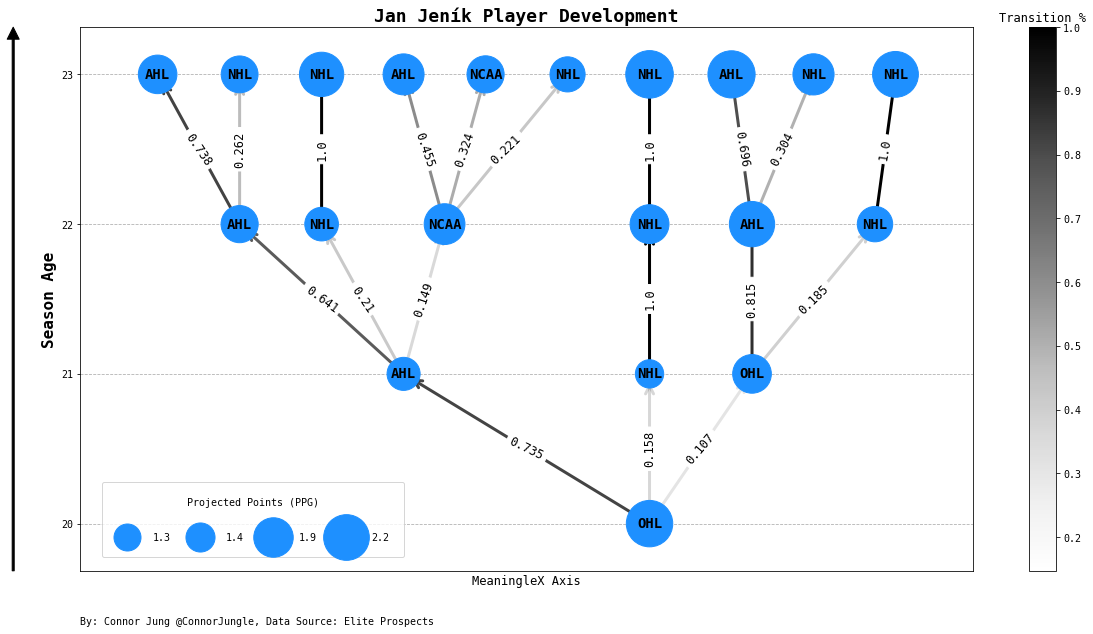

### Most Likely Player Development Path

|    | league   |   season_age |   probability |   gp |   egoals |   eassists |   epoints |   gpg |   apg |   ppg |
|---:|:---------|-------------:|--------------:|-----:|---------:|-----------:|----------:|------:|------:|------:|
|  1 | NHL      |           21 |          0.16 |   82 |       24 |         38 |        63 |  0.3  |  0.47 |  0.77 |
|  0 | NHL      |           22 |          1    |   82 |       46 |         72 |       119 |  0.57 |  0.88 |  1.46 |
|  0 | NHL      |           23 |          1    |   82 |       70 |        108 |       178 |  0.85 |  1.32 |  2.18 |

### Maximum NHL Value Development Path

|    | league   |   season_age |   probability |   gp |   egoals |   eassists |   epoints |   gpg |   apg |   ppg |
|---:|:---------|-------------:|--------------:|-----:|---------:|-----------:|----------:|------:|------:|------:|
|  1 | NHL      |           21 |          0.16 |   82 |       24 |         38 |        63 |  0.3  |  0.47 |  0.77 |
|  0 | NHL      |           22 |          1    |   82 |       46 |         72 |       119 |  0.57 |  0.88 |  1.46 |
|  0 | NHL      |           23 |          1    |   82 |       70 |        108 |       178 |  0.85 |  1.32 |  2.18 |

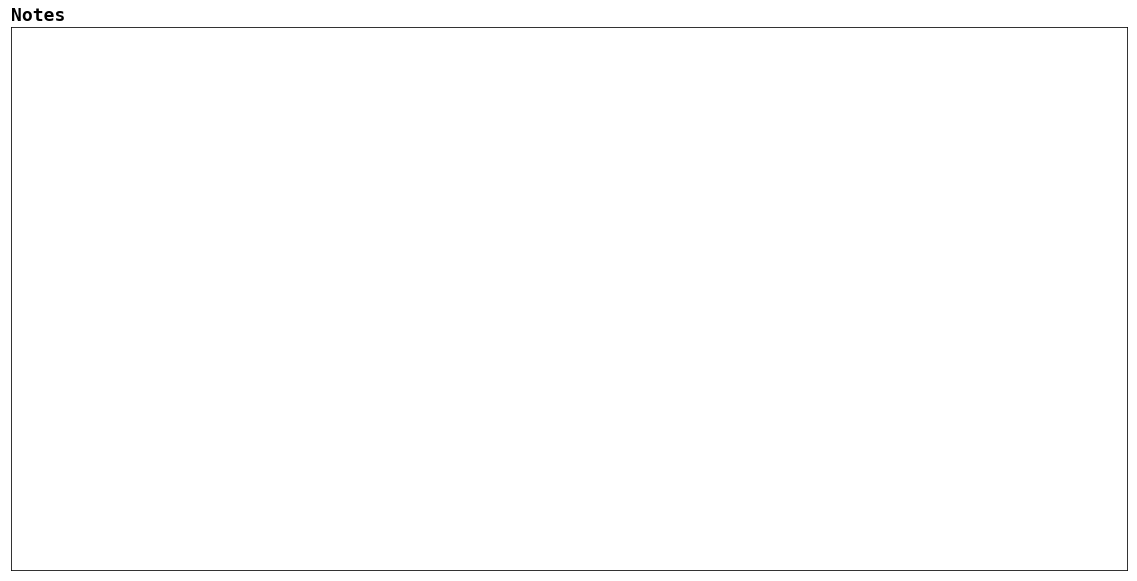

[14:00:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


# Nathan Légaré


    APPLE projects Nathan Légaré to have a 39.0% chance to make the NHL by age 23. 
    Nathan Légaré's simulated development path over the 5 seasons since being drafted 
    has a expected NHL Value of ~54.2 points.

    Nathan Légaré's "Most Likely NHL Development Path" or projected floor is ~126.1 points
    Nathan Légaré's "Maximum NHL Value Development Path" or projected ceiling is ~260.0 points
            

**date_of_birth**: 2001-01-11&ensp;**nation**: Canada&ensp;**height**: 182.0&ensp;**weight**: 93.0&ensp;**shoots**: R

**rights**: Pittsburgh Penguins&ensp;**draft_year**: 2019.0&ensp;**draft_year**: 2019.0&ensp;**draft_round**: 3.0&ensp;**draft_team**: Pittsburgh Penguins

### Player Stats

|    | year      | league   |   season_age |   gp |   g |   a |   tp |   gpg |   apg |   ppg |
|---:|:----------|:---------|-------------:|-----:|----:|----:|-----:|------:|------:|------:|
|  0 | 2017-2018 | QMJHL    |           17 |   62 |  10 |  19 |   29 |  0.16 |  0.31 |  0.47 |
|  1 | 2018-2019 | QMJHL    |           18 |   68 |  45 |  42 |   87 |  0.66 |  0.62 |  1.28 |
|  2 | 2019-2020 | QMJHL    |           19 |   61 |  35 |  36 |   71 |  0.57 |  0.59 |  1.16 |

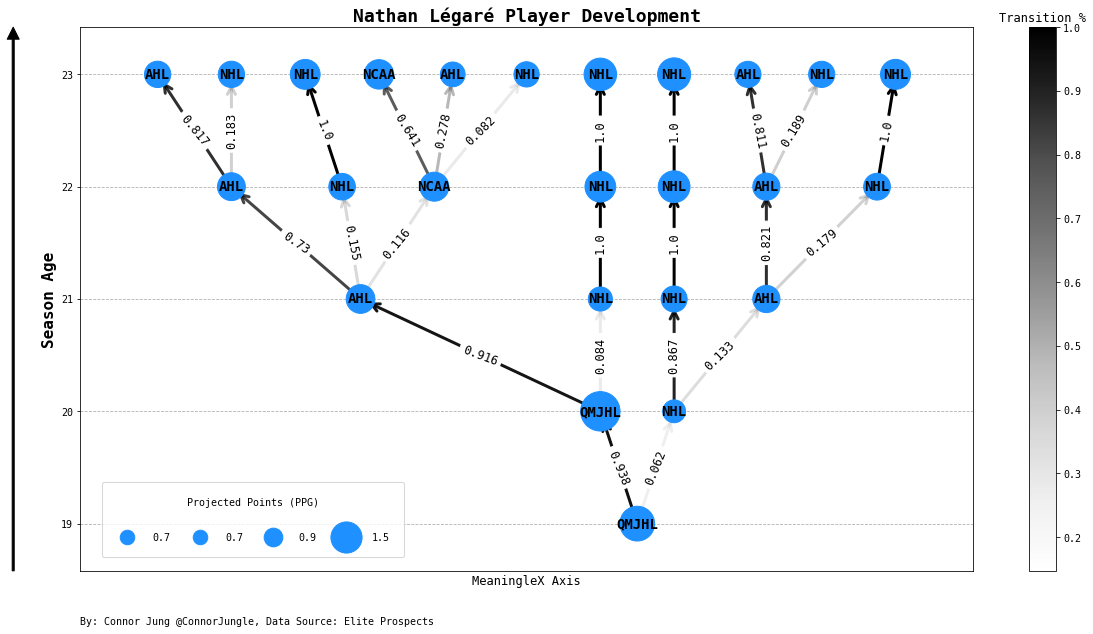

### Most Likely Player Development Path

|    | league   |   season_age |   probability |   gp |   egoals |   eassists |   epoints |   gpg |   apg |   ppg |
|---:|:---------|-------------:|--------------:|-----:|---------:|-----------:|----------:|------:|------:|------:|
|  0 | QMJHL    |           20 |          0.94 |   68 |       50 |         51 |       101 |  0.74 |  0.76 |  1.49 |
|  0 | AHL      |           21 |          0.92 |   76 |       29 |         30 |        60 |  0.39 |  0.4  |  0.8  |
|  1 | NHL      |           22 |          0.15 |   82 |       27 |         28 |        55 |  0.34 |  0.35 |  0.68 |
|  0 | NHL      |           23 |          1    |   82 |       34 |         35 |        70 |  0.42 |  0.43 |  0.86 |

### Maximum NHL Value Development Path

|    | league   |   season_age |   probability |   gp |   egoals |   eassists |   epoints |   gpg |   apg |   ppg |
|---:|:---------|-------------:|--------------:|-----:|---------:|-----------:|----------:|------:|------:|------:|
|  1 | NHL      |           20 |          0.06 |   82 |       20 |         20 |        41 |  0.25 |  0.25 |  0.5  |
|  0 | NHL      |           21 |          0.87 |   82 |       26 |         27 |        53 |  0.32 |  0.33 |  0.65 |
|  0 | NHL      |           22 |          1    |   82 |       39 |         40 |        79 |  0.48 |  0.49 |  0.97 |
|  0 | NHL      |           23 |          1    |   82 |       42 |         43 |        86 |  0.52 |  0.53 |  1.05 |

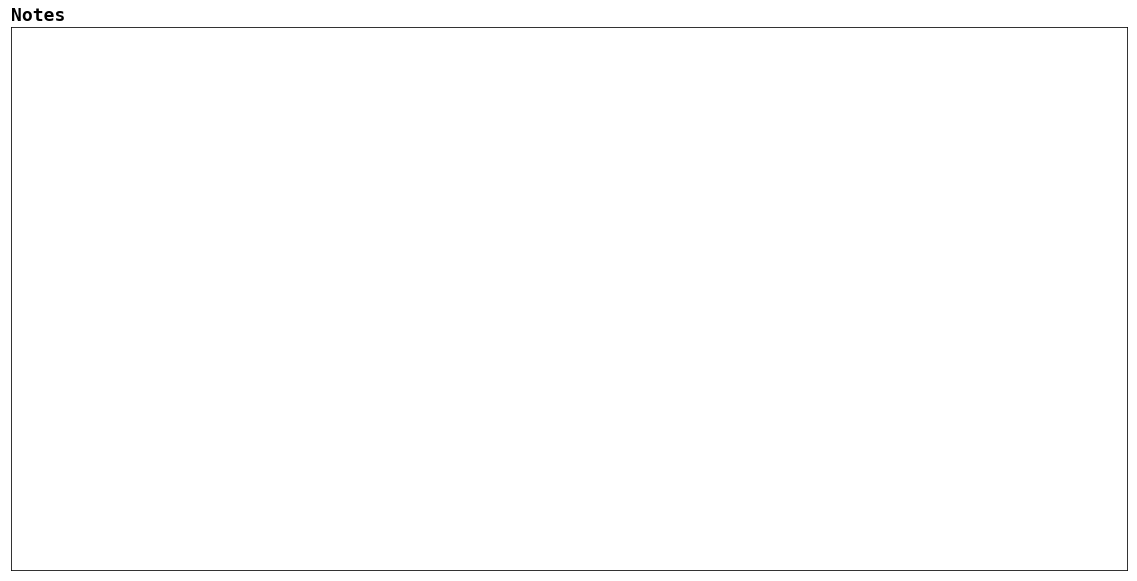

[14:01:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


# Artemi Knyazev


    APPLE projects Artemi Knyazev to have a 53.0% chance to make the NHL by age 23. 
    Artemi Knyazev's simulated development path over the 5 seasons since being drafted 
    has a expected NHL Value of ~40.3 points.

    Artemi Knyazev's "Most Likely NHL Development Path" or projected floor is ~58.7 points
    Artemi Knyazev's "Maximum NHL Value Development Path" or projected ceiling is ~152.0 points
            

**date_of_birth**: 2001-01-04&ensp;**nation**: Russia&ensp;**height**: 180.0&ensp;**weight**: 83.0&ensp;**shoots**: L

**rights**: San Jose Sharks&ensp;**draft_year**: 2019.0&ensp;**draft_year**: 2019.0&ensp;**draft_round**: 2.0&ensp;**draft_team**: San Jose Sharks

### Player Stats

|    | year      | league   |   season_age |   gp |   g |   a |   tp |   gpg |   apg |   ppg |
|---:|:----------|:---------|-------------:|-----:|----:|----:|-----:|------:|------:|------:|
|  0 | 2017-2018 | MHL      |           17 |   39 |   4 |   3 |    7 |  0.1  |  0.08 |  0.18 |
|  1 | 2018-2019 | QMJHL    |           18 |   55 |  13 |  21 |   34 |  0.24 |  0.38 |  0.62 |
|  2 | 2019-2020 | QMJHL    |           19 |   51 |  11 |  32 |   43 |  0.22 |  0.63 |  0.84 |

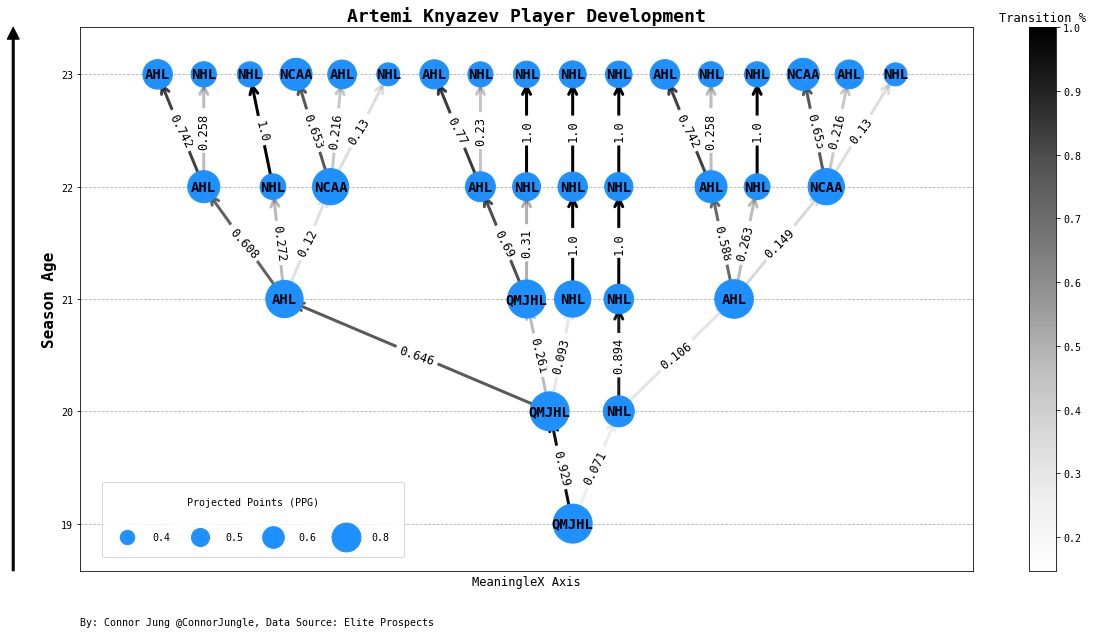

### Most Likely Player Development Path

|    | league   |   season_age |   probability |   gp |   egoals |   eassists |   epoints |   gpg |   apg |   ppg |
|---:|:---------|-------------:|--------------:|-----:|---------:|-----------:|----------:|------:|------:|------:|
|  0 | QMJHL    |           20 |          0.93 |   68 |       21 |         35 |        57 |  0.32 |  0.52 |  0.84 |
|  0 | AHL      |           21 |          0.65 |   76 |       22 |         36 |        58 |  0.29 |  0.48 |  0.77 |
|  1 | NHL      |           22 |          0.27 |   82 |       11 |         18 |        29 |  0.14 |  0.23 |  0.37 |
|  0 | NHL      |           23 |          1    |   82 |       10 |         17 |        28 |  0.13 |  0.22 |  0.35 |

### Maximum NHL Value Development Path

|    | league   |   season_age |   probability |   gp |   egoals |   eassists |   epoints |   gpg |   apg |   ppg |
|---:|:---------|-------------:|--------------:|-----:|---------:|-----------:|----------:|------:|------:|------:|
|  1 | NHL      |           20 |          0.07 |   82 |       16 |         27 |        43 |  0.2  |  0.33 |  0.53 |
|  0 | NHL      |           21 |          0.89 |   82 |       15 |         24 |        39 |  0.19 |  0.3  |  0.49 |
|  0 | NHL      |           22 |          1    |   82 |       13 |         22 |        36 |  0.17 |  0.27 |  0.44 |
|  0 | NHL      |           23 |          1    |   82 |       12 |         19 |        32 |  0.15 |  0.24 |  0.39 |

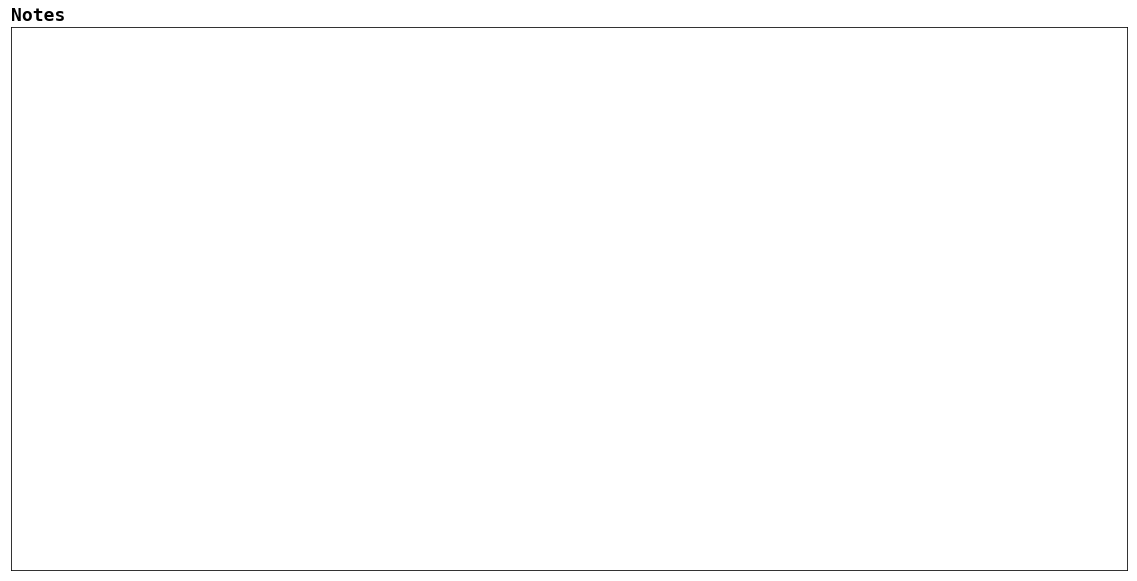

[14:02:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


# Liam Foudy


    APPLE projects Liam Foudy to have a 85.0% chance to make the NHL by age 23. 
    Liam Foudy's simulated development path over the 5 seasons since being drafted 
    has a expected NHL Value of ~117.8 points.

    Liam Foudy's "Most Likely NHL Development Path" or projected floor is ~138.0 points
    Liam Foudy's "Maximum NHL Value Development Path" or projected ceiling is ~200.0 points
            

**date_of_birth**: 2000-02-04&ensp;**nation**: Canada&ensp;**height**: 185.0&ensp;**weight**: 82.0&ensp;**shoots**: L

**rights**: Columbus Blue Jackets&ensp;**draft_year**: 2018.0&ensp;**draft_year**: 2018.0&ensp;**draft_round**: 1.0&ensp;**draft_team**: Columbus Blue Jackets

### Player Stats

|    | year      | league   |   season_age |   gp |   g |   a |   tp |   gpg |   apg |   ppg |
|---:|:----------|:---------|-------------:|-----:|----:|----:|-----:|------:|------:|------:|
|  0 | 2016-2017 | OHL      |           17 |   58 |   9 |   6 |   15 |  0.16 |  0.1  |  0.26 |
|  1 | 2017-2018 | OHL      |           18 |   65 |  24 |  16 |   40 |  0.37 |  0.25 |  0.62 |
|  2 | 2018-2019 | OHL      |           19 |   62 |  36 |  32 |   68 |  0.58 |  0.52 |  1.1  |
|  3 | 2019-2020 | OHL      |           20 |   45 |  28 |  40 |   68 |  0.62 |  0.89 |  1.51 |

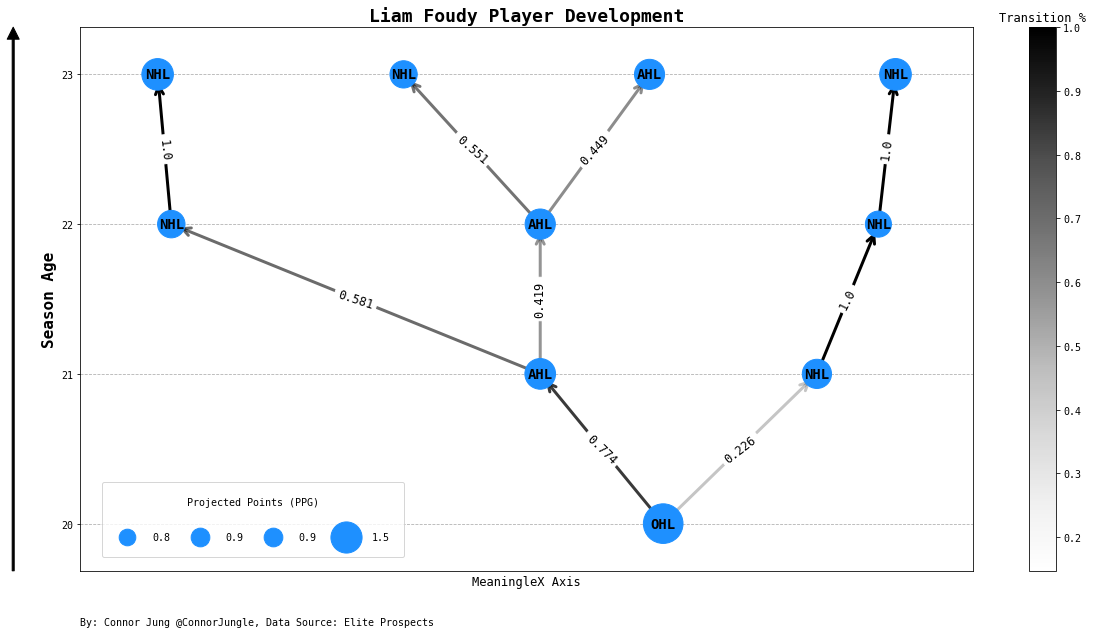

### Most Likely Player Development Path

|    | league   |   season_age |   probability |   gp |   egoals |   eassists |   epoints |   gpg |   apg |   ppg |
|---:|:---------|-------------:|--------------:|-----:|---------:|-----------:|----------:|------:|------:|------:|
|  0 | AHL      |           21 |          0.77 |   76 |       38 |         29 |        68 |  0.51 |  0.39 |  0.91 |
|  0 | NHL      |           22 |          0.58 |   82 |       33 |         25 |        59 |  0.41 |  0.32 |  0.73 |
|  0 | NHL      |           23 |          1    |   82 |       44 |         34 |        78 |  0.54 |  0.42 |  0.96 |

### Maximum NHL Value Development Path

|    | league   |   season_age |   probability |   gp |   egoals |   eassists |   epoints |   gpg |   apg |   ppg |
|---:|:---------|-------------:|--------------:|-----:|---------:|-----------:|----------:|------:|------:|------:|
|  1 | NHL      |           21 |          0.23 |   82 |       37 |         29 |        67 |  0.46 |  0.36 |  0.82 |
|  0 | NHL      |           22 |          1    |   82 |       30 |         23 |        53 |  0.37 |  0.28 |  0.65 |
|  0 | NHL      |           23 |          1    |   82 |       44 |         34 |        79 |  0.54 |  0.42 |  0.96 |

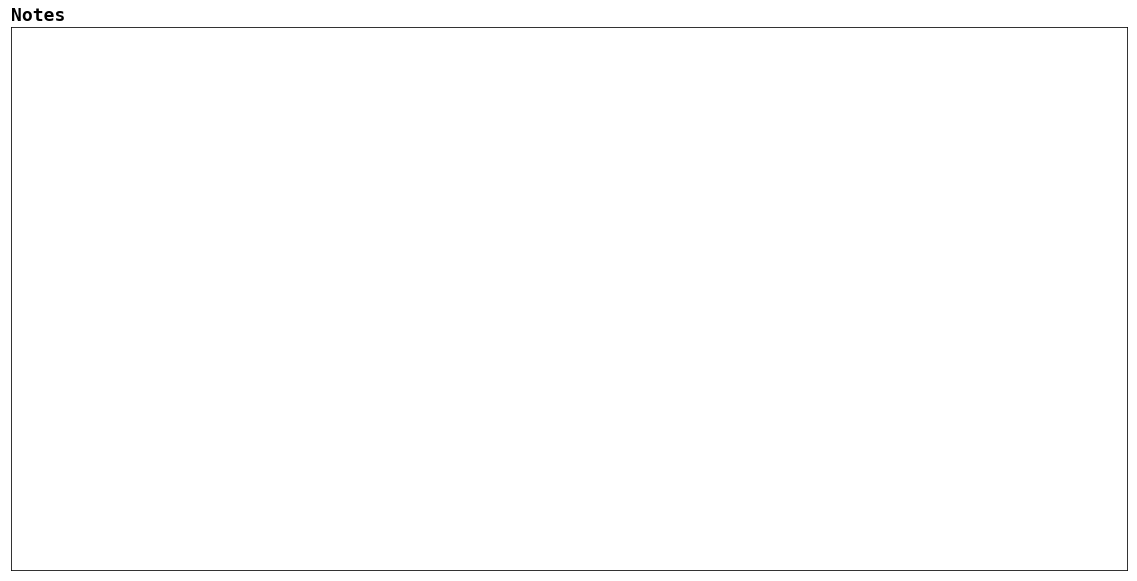

[14:03:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


# Ryan Merkley


    APPLE projects Ryan Merkley to have a 80.0% chance to make the NHL by age 23. 
    Ryan Merkley's simulated development path over the 5 seasons since being drafted 
    has a expected NHL Value of ~72.3 points.

    Ryan Merkley's "Most Likely NHL Development Path" or projected floor is ~93.8 points
    Ryan Merkley's "Maximum NHL Value Development Path" or projected ceiling is ~132.0 points
            

**date_of_birth**: 2000-08-14&ensp;**nation**: Canada&ensp;**height**: 181.0&ensp;**weight**: 80.0&ensp;**shoots**: R

**rights**: San Jose Sharks&ensp;**draft_year**: 2018.0&ensp;**draft_year**: 2018.0&ensp;**draft_round**: 1.0&ensp;**draft_team**: San Jose Sharks

### Player Stats

|    | year      | league   |   season_age |   gp |   g |   a |   tp |   gpg |   apg |   ppg |
|---:|:----------|:---------|-------------:|-----:|----:|----:|-----:|------:|------:|------:|
|  0 | 2016-2017 | OHL      |           17 |   62 |  12 |  43 |   55 |  0.19 |  0.69 |  0.89 |
|  1 | 2017-2018 | OHL      |           18 |   63 |  13 |  54 |   67 |  0.21 |  0.86 |  1.06 |
|  2 | 2018-2019 | OHL      |           19 |   63 |  14 |  57 |   71 |  0.22 |  0.9  |  1.13 |
|  3 | 2019-2020 | OHL      |           20 |   60 |  15 |  61 |   76 |  0.25 |  1.02 |  1.27 |

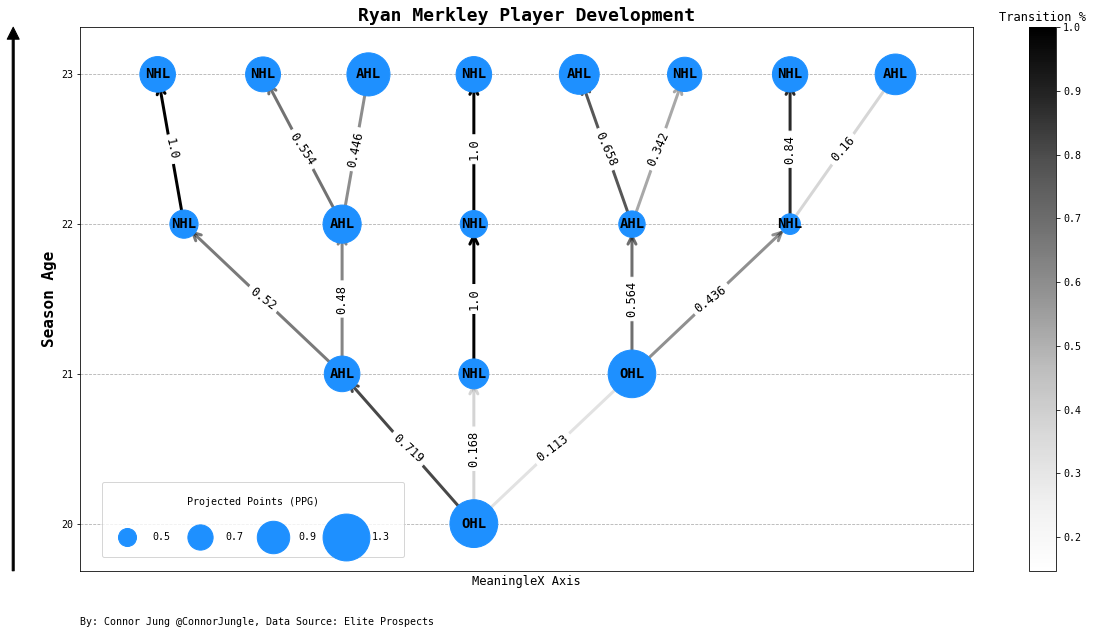

### Most Likely Player Development Path

|    | league   |   season_age |   probability |   gp |   egoals |   eassists |   epoints |   gpg |   apg |   ppg |
|---:|:---------|-------------:|--------------:|-----:|---------:|-----------:|----------:|------:|------:|------:|
|  0 | AHL      |           21 |          0.72 |   76 |       10 |         42 |        53 |  0.14 |  0.57 |  0.7  |
|  0 | NHL      |           22 |          0.52 |   82 |        7 |         29 |        36 |  0.09 |  0.35 |  0.44 |
|  0 | NHL      |           23 |          1    |   82 |       11 |         46 |        57 |  0.14 |  0.56 |  0.7  |

### Maximum NHL Value Development Path

|    | league   |   season_age |   probability |   gp |   egoals |   eassists |   epoints |   gpg |   apg |   ppg |
|---:|:---------|-------------:|--------------:|-----:|---------:|-----------:|----------:|------:|------:|------:|
|  1 | NHL      |           21 |          0.17 |   82 |        8 |         32 |        40 |  0.1  |  0.4  |  0.5  |
|  0 | NHL      |           22 |          1    |   82 |        6 |         27 |        33 |  0.08 |  0.33 |  0.41 |
|  0 | NHL      |           23 |          1    |   82 |       11 |         46 |        57 |  0.14 |  0.56 |  0.7  |

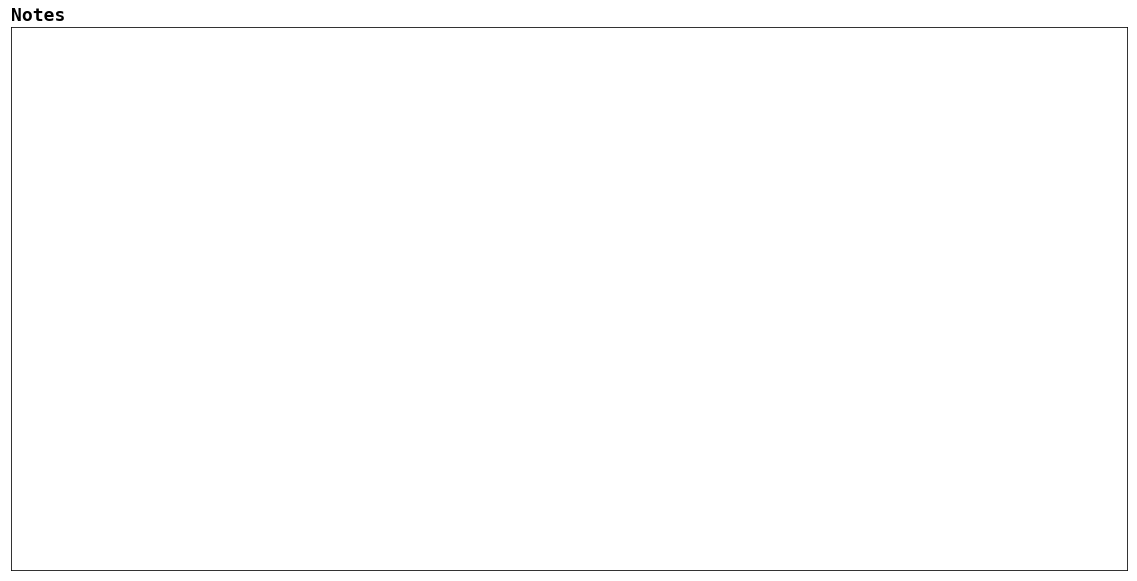

[14:04:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


# Maxim Cajkovic


    APPLE projects Maxim Cajkovic to have a 36.0% chance to make the NHL by age 23. 
    Maxim Cajkovic's simulated development path over the 5 seasons since being drafted 
    has a expected NHL Value of ~33.4 points.

    Maxim Cajkovic's "Most Likely NHL Development Path" or projected floor is ~85.2 points
    Maxim Cajkovic's "Maximum NHL Value Development Path" or projected ceiling is ~166.0 points
            

**date_of_birth**: 2001-01-03&ensp;**nation**: Slovakia&ensp;**height**: 182.0&ensp;**weight**: 86.0&ensp;**shoots**: R

**rights**: Tampa Bay Lightning&ensp;**draft_year**: 2019.0&ensp;**draft_year**: 2019.0&ensp;**draft_round**: 3.0&ensp;**draft_team**: Tampa Bay Lightning

### Player Stats

|    | year      | league    |   season_age |   gp |   g |   a |   tp |   gpg |   apg |   ppg |
|---:|:----------|:----------|-------------:|-----:|----:|----:|-----:|------:|------:|------:|
|  0 | 2017-2018 | SuperElit |           17 |   28 |  10 |  11 |   21 |  0.36 |  0.39 |  0.75 |
|  1 | 2018-2019 | QMJHL     |           18 |   60 |  22 |  24 |   46 |  0.37 |  0.4  |  0.77 |
|  2 | 2019-2020 | QMJHL     |           19 |   36 |  18 |  24 |   42 |  0.5  |  0.67 |  1.17 |

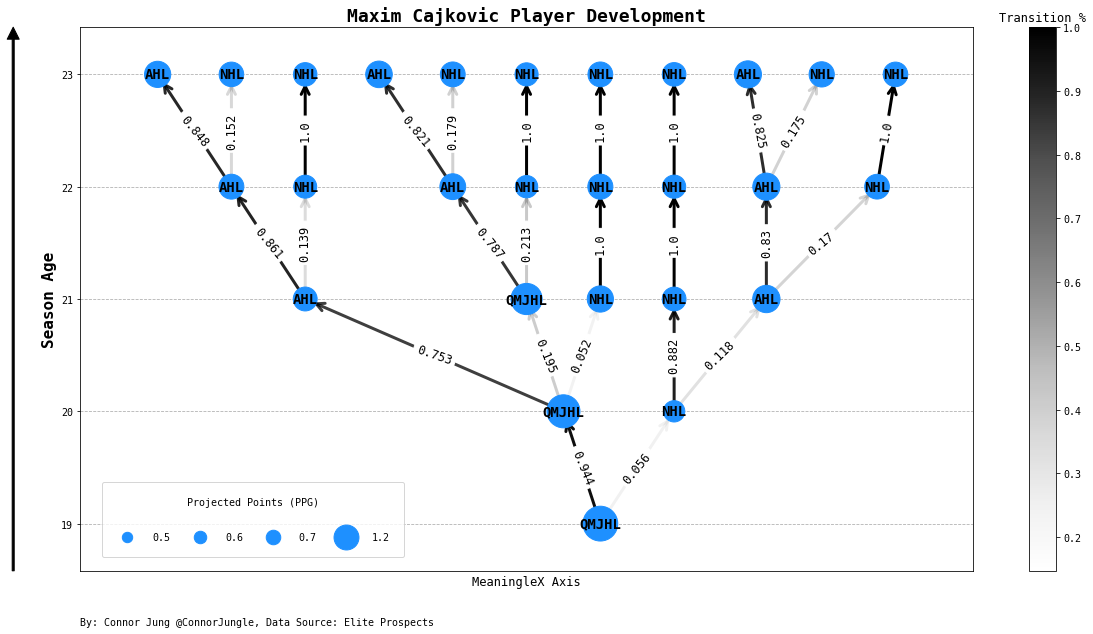

### Most Likely Player Development Path

|    | league   |   season_age |   probability |   gp |   egoals |   eassists |   epoints |   gpg |   apg |   ppg |
|---:|:---------|-------------:|--------------:|-----:|---------:|-----------:|----------:|------:|------:|------:|
|  0 | QMJHL    |           20 |          0.94 |   68 |       33 |         37 |        71 |  0.5  |  0.55 |  1.05 |
|  0 | AHL      |           21 |          0.75 |   76 |       19 |         21 |        41 |  0.26 |  0.29 |  0.55 |
|  1 | NHL      |           22 |          0.14 |   82 |       19 |         21 |        41 |  0.24 |  0.27 |  0.51 |
|  0 | NHL      |           23 |          1    |   82 |       20 |         22 |        43 |  0.25 |  0.28 |  0.53 |

### Maximum NHL Value Development Path

|    | league   |   season_age |   probability |   gp |   egoals |   eassists |   epoints |   gpg |   apg |   ppg |
|---:|:---------|-------------:|--------------:|-----:|---------:|-----------:|----------:|------:|------:|------:|
|  1 | NHL      |           20 |          0.06 |   82 |       17 |         18 |        35 |  0.21 |  0.23 |  0.44 |
|  0 | NHL      |           21 |          0.88 |   82 |       21 |         23 |        44 |  0.26 |  0.28 |  0.54 |
|  0 | NHL      |           22 |          1    |   82 |       20 |         22 |        42 |  0.25 |  0.27 |  0.52 |
|  0 | NHL      |           23 |          1    |   82 |       20 |         22 |        43 |  0.25 |  0.28 |  0.53 |

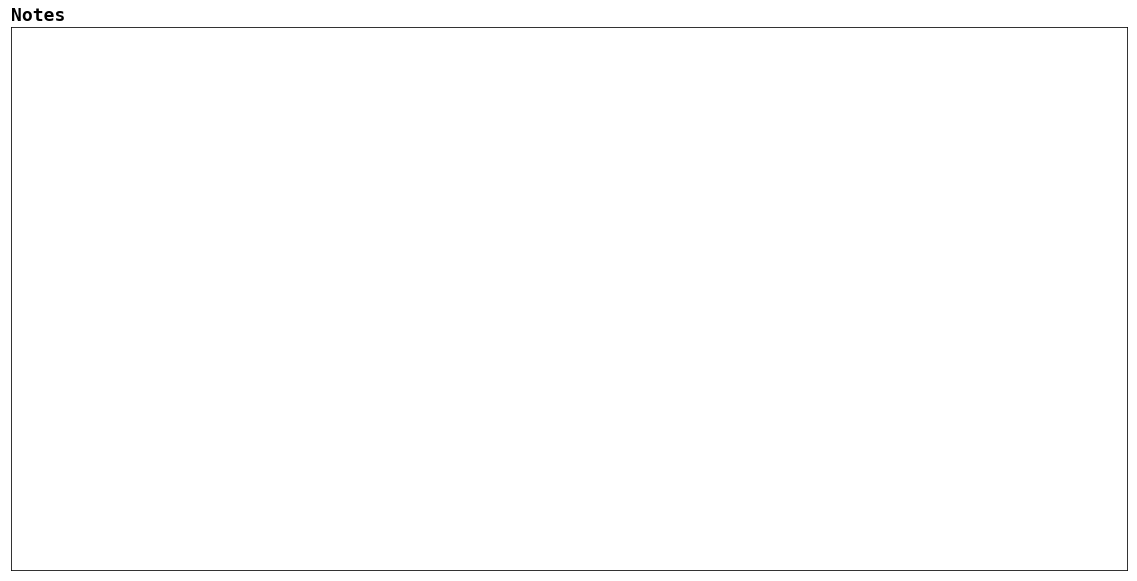

[14:05:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


# Ty Dellandrea


    APPLE projects Ty Dellandrea to have a 74.0% chance to make the NHL by age 23. 
    Ty Dellandrea's simulated development path over the 5 seasons since being drafted 
    has a expected NHL Value of ~52.9 points.

    Ty Dellandrea's "Most Likely NHL Development Path" or projected floor is ~80.5 points
    Ty Dellandrea's "Maximum NHL Value Development Path" or projected ceiling is ~90.0 points
            

**date_of_birth**: 2000-07-21&ensp;**nation**: Canada&ensp;**height**: 185.0&ensp;**weight**: 86.0&ensp;**shoots**: R

**rights**: Dallas Stars&ensp;**draft_year**: 2018.0&ensp;**draft_year**: 2018.0&ensp;**draft_round**: 1.0&ensp;**draft_team**: Dallas Stars

### Player Stats

|    | year      | league   |   season_age |   gp |   g |   a |   tp |   gpg |   apg |   ppg |
|---:|:----------|:---------|-------------:|-----:|----:|----:|-----:|------:|------:|------:|
|  0 | 2016-2017 | OHL      |           17 |   57 |  13 |  11 |   24 |  0.23 |  0.19 |  0.42 |
|  1 | 2017-2018 | OHL      |           18 |   67 |  27 |  32 |   59 |  0.4  |  0.48 |  0.88 |
|  2 | 2018-2019 | OHL      |           19 |   60 |  22 |  41 |   63 |  0.37 |  0.68 |  1.05 |
|  3 | 2019-2020 | OHL      |           20 |   47 |  32 |  38 |   70 |  0.68 |  0.81 |  1.49 |

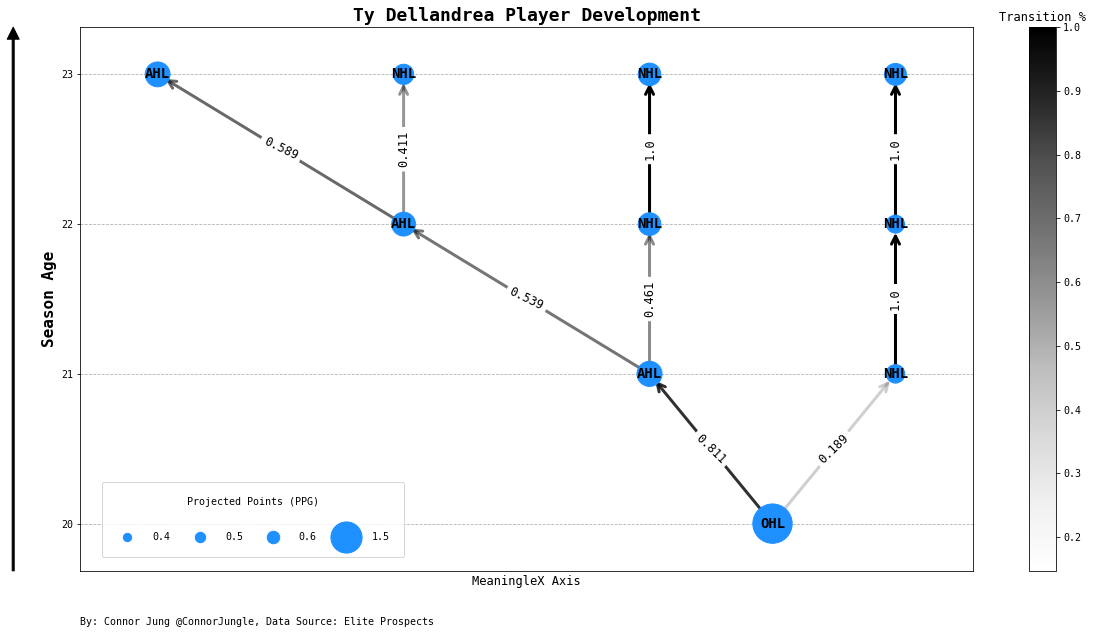

### Most Likely Player Development Path

|    | league   |   season_age |   probability |   gp |   egoals |   eassists |   epoints |   gpg |   apg |   ppg |
|---:|:---------|-------------:|--------------:|-----:|---------:|-----------:|----------:|------:|------:|------:|
|  0 | AHL      |           21 |          0.81 |   76 |       21 |         24 |        45 |  0.28 |  0.33 |  0.6  |
|  1 | NHL      |           22 |          0.46 |   82 |       18 |         21 |        40 |  0.23 |  0.27 |  0.49 |
|  0 | NHL      |           23 |          1    |   82 |       18 |         21 |        40 |  0.22 |  0.27 |  0.49 |

### Maximum NHL Value Development Path

|    | league   |   season_age |   probability |   gp |   egoals |   eassists |   epoints |   gpg |   apg |   ppg |
|---:|:---------|-------------:|--------------:|-----:|---------:|-----------:|----------:|------:|------:|------:|
|  1 | NHL      |           21 |          0.19 |   82 |       12 |         14 |        27 |  0.15 |  0.18 |  0.33 |
|  0 | NHL      |           22 |          1    |   82 |       11 |         13 |        25 |  0.14 |  0.17 |  0.31 |
|  0 | NHL      |           23 |          1    |   82 |       17 |         20 |        37 |  0.21 |  0.25 |  0.46 |

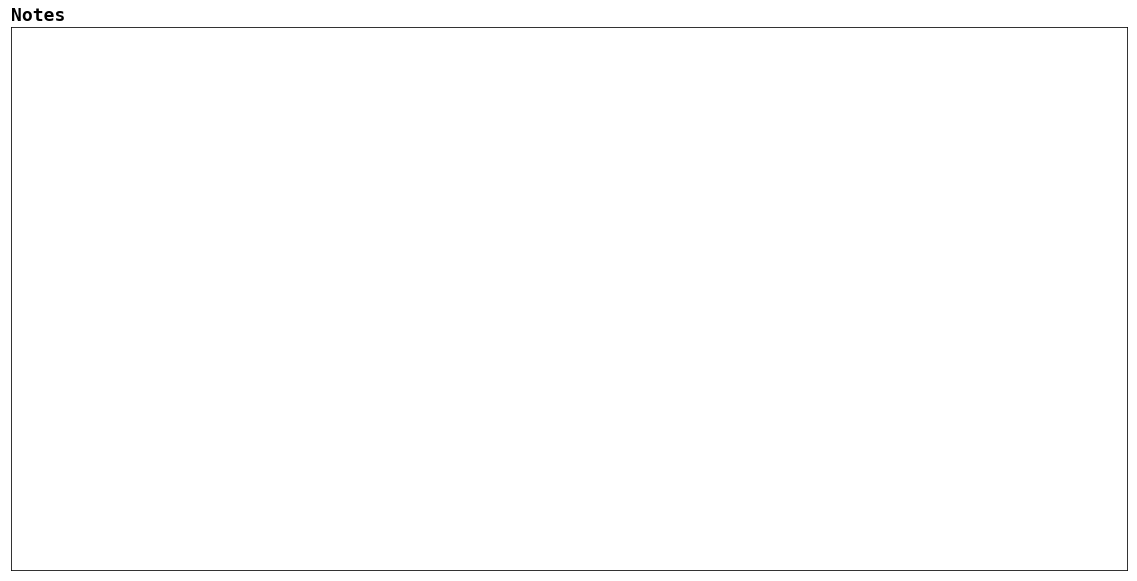

In [2]:
for pid in top_ahl_ceiling.playerid:
    pr.create_player_report(pid)
    
for pid in top_chl_ceiling.playerid:
    pr.create_player_report(pid)